# Notebook LDA

**Este notebook es de apoyo, para mostrar el paso a paso de entrenamiento de un modelo LDA. El modelo entrenado se usa en el notebook principal que se llama ReporteFinal**

Este notebook entrena un modelo de LDA para todos los documentos del corpus, una vez entrenado el modelo se almacena y se usa para otras tareas como resument automático, identificación de palabras clave y otras.

**No ejecute este código porque irá a sobre-escribir el modelo entrenado y entrenarlo de cero toma alrededor de 12 horas**

In [1]:
import pandas as pd
from gensim import corpora, models
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load data from CSV file
df = pd.read_csv('data/DATA.csv')

# Preprocess text
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply preprocessing to each document
preprocessed_texts = df['TEXT'].apply(preprocess_text)

# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary(preprocessed_texts)

In [2]:
dictionary.save('dictionary.gensim')

In [4]:
import pandas as pd
from gensim import corpora, models
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load data from CSV file
df = pd.read_csv('data/DATA.csv')

# Preprocess text
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply preprocessing to each document
preprocessed_texts = df['TEXT'].apply(preprocess_text)

# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary(preprocessed_texts)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=15)

# Print the topics and their top words
print("Topics:")
pprint(lda_model.print_topics())

# Get the most dominant topic for each document
for i, text in enumerate(preprocessed_texts):
    print(f"Document {i+1}: Dominant Topic - {lda_model.get_document_topics(corpus[i])[0]}")


Topics:
[(0,
  '0.018*"tutela" + 0.014*"corte" + 0.014*"sentencia" + 0.011*"sala" + '
  '0.009*"constitucional" + 0.008*"juzgado" + 0.007*"revisión" + '
  '0.007*"magistrado" + 0.007*"josé" + 0.007*"acción"'),
 (1,
  '0.037*"tutela" + 0.025*"acción" + 0.021*"accionante" + 0.018*"folio" + '
  '0.012*"cuaderno" + 0.011*"fundamentales" + 0.009*"derechos" + '
  '0.009*"amparo" + 0.008*"señora" + 0.008*"juzgado"'),
 (2,
  '0.016*"derecho" + 0.012*"educación" + 0.011*"derechos" + 0.010*"persona" + '
  '0.009*"libertad" + 0.008*"información" + 0.006*"ser" + 0.005*"universidad" '
  '+ 0.005*"sentencia" + 0.004*"puede"'),
 (3,
  '0.022*"cargo" + 0.015*"servicio" + 0.014*"nacional" + 0.011*"general" + '
  '0.010*"carrera" + 0.009*"artículo" + 0.008*"militar" + 0.008*"decreto" + '
  '0.007*"administrativo" + 0.007*"ley"'),
 (4,
  '0.016*"artículo" + 0.015*"ley" + 0.014*"constitución" + '
  '0.009*"constitucional" + 0.008*"norma" + 0.006*"corte" + 0.006*"política" + '
  '0.006*"decreto" + 0.006*"n

Document 108: Dominant Topic - (0, 0.045701265)
Document 109: Dominant Topic - (0, 0.045894455)
Document 110: Dominant Topic - (0, 0.15419462)
Document 111: Dominant Topic - (5, 0.016075412)
Document 112: Dominant Topic - (1, 0.02323552)
Document 113: Dominant Topic - (2, 0.025929462)
Document 114: Dominant Topic - (5, 0.021952335)
Document 115: Dominant Topic - (1, 0.012587023)
Document 116: Dominant Topic - (1, 0.088542715)
Document 117: Dominant Topic - (1, 0.098137565)
Document 118: Dominant Topic - (1, 0.0647524)
Document 119: Dominant Topic - (0, 0.058093857)
Document 120: Dominant Topic - (0, 0.06785716)
Document 121: Dominant Topic - (0, 0.17853178)
Document 122: Dominant Topic - (0, 0.49849224)
Document 123: Dominant Topic - (0, 0.36883742)
Document 124: Dominant Topic - (0, 0.36689132)
Document 125: Dominant Topic - (4, 0.14743258)
Document 126: Dominant Topic - (0, 0.3312116)
Document 127: Dominant Topic - (0, 0.3149002)
Document 128: Dominant Topic - (0, 0.5853693)
Document

Document 413: Dominant Topic - (0, 0.17192985)
Document 414: Dominant Topic - (0, 0.20521747)
Document 415: Dominant Topic - (0, 0.070782706)
Document 416: Dominant Topic - (0, 0.106376514)
Document 417: Dominant Topic - (0, 0.20089695)
Document 418: Dominant Topic - (0, 0.034602627)
Document 419: Dominant Topic - (0, 0.1614652)
Document 420: Dominant Topic - (0, 0.024205975)
Document 421: Dominant Topic - (0, 0.13907239)
Document 422: Dominant Topic - (3, 0.010806196)
Document 423: Dominant Topic - (1, 0.057544135)
Document 424: Dominant Topic - (1, 0.012691032)
Document 425: Dominant Topic - (1, 0.041573238)
Document 426: Dominant Topic - (1, 0.07884014)
Document 427: Dominant Topic - (0, 0.039746165)
Document 428: Dominant Topic - (15, 0.2370555)
Document 429: Dominant Topic - (1, 0.027269378)
Document 430: Dominant Topic - (0, 0.06765452)
Document 431: Dominant Topic - (0, 0.17299171)
Document 432: Dominant Topic - (0, 0.056516897)
Document 433: Dominant Topic - (0, 0.04656315)
Doc

Document 696: Dominant Topic - (0, 0.027020806)
Document 697: Dominant Topic - (0, 0.1560917)
Document 698: Dominant Topic - (1, 0.02311251)
Document 699: Dominant Topic - (0, 0.01376111)
Document 700: Dominant Topic - (4, 0.0149558205)
Document 701: Dominant Topic - (0, 0.026882995)
Document 702: Dominant Topic - (0, 0.07041845)
Document 703: Dominant Topic - (0, 0.30607775)
Document 704: Dominant Topic - (0, 0.22595829)
Document 705: Dominant Topic - (0, 0.07917935)
Document 706: Dominant Topic - (0, 0.21507862)
Document 707: Dominant Topic - (0, 0.5518035)
Document 708: Dominant Topic - (0, 0.17350274)
Document 709: Dominant Topic - (0, 0.1561481)
Document 710: Dominant Topic - (0, 0.09060807)
Document 711: Dominant Topic - (0, 0.5111213)
Document 712: Dominant Topic - (0, 0.22374767)
Document 713: Dominant Topic - (0, 0.09442822)
Document 714: Dominant Topic - (0, 0.50290906)
Document 715: Dominant Topic - (0, 0.22473304)
Document 716: Dominant Topic - (0, 0.15062991)
Document 717:

Document 952: Dominant Topic - (0, 0.1780268)
Document 953: Dominant Topic - (0, 0.18314156)
Document 954: Dominant Topic - (0, 0.069061615)
Document 955: Dominant Topic - (0, 0.059690133)
Document 956: Dominant Topic - (0, 0.08418473)
Document 957: Dominant Topic - (0, 0.109590635)
Document 958: Dominant Topic - (0, 0.15728258)
Document 959: Dominant Topic - (0, 0.13086885)
Document 960: Dominant Topic - (0, 0.16654015)
Document 961: Dominant Topic - (2, 0.010618935)
Document 962: Dominant Topic - (0, 0.08695709)
Document 963: Dominant Topic - (0, 0.12244298)
Document 964: Dominant Topic - (1, 0.065267965)
Document 965: Dominant Topic - (4, 0.28188723)
Document 966: Dominant Topic - (0, 0.12338046)
Document 967: Dominant Topic - (1, 0.12712808)
Document 968: Dominant Topic - (0, 0.02126919)
Document 969: Dominant Topic - (1, 0.115293205)
Document 970: Dominant Topic - (4, 0.030064195)
Document 971: Dominant Topic - (0, 0.36951977)
Document 972: Dominant Topic - (0, 0.21664847)
Documen

Document 1274: Dominant Topic - (0, 0.026376694)
Document 1275: Dominant Topic - (1, 0.20959467)
Document 1276: Dominant Topic - (1, 0.055041257)
Document 1277: Dominant Topic - (1, 0.07430961)
Document 1278: Dominant Topic - (1, 0.21430066)
Document 1279: Dominant Topic - (0, 0.4346807)
Document 1280: Dominant Topic - (0, 0.47746497)
Document 1281: Dominant Topic - (0, 0.26037842)
Document 1282: Dominant Topic - (0, 0.4521854)
Document 1283: Dominant Topic - (0, 0.21533173)
Document 1284: Dominant Topic - (0, 0.4163845)
Document 1285: Dominant Topic - (0, 0.014027564)
Document 1286: Dominant Topic - (0, 0.0111036105)
Document 1287: Dominant Topic - (2, 0.02249989)
Document 1288: Dominant Topic - (0, 0.21430206)
Document 1289: Dominant Topic - (0, 0.2440818)
Document 1290: Dominant Topic - (0, 0.29434267)
Document 1291: Dominant Topic - (0, 0.18407756)
Document 1292: Dominant Topic - (0, 0.11420301)
Document 1293: Dominant Topic - (0, 0.100093834)
Document 1294: Dominant Topic - (5, 0.

Document 1574: Dominant Topic - (0, 0.28418317)
Document 1575: Dominant Topic - (0, 0.08971597)
Document 1576: Dominant Topic - (0, 0.16262111)
Document 1577: Dominant Topic - (0, 0.20429656)
Document 1578: Dominant Topic - (0, 0.24947584)
Document 1579: Dominant Topic - (0, 0.28980163)
Document 1580: Dominant Topic - (0, 0.29661828)
Document 1581: Dominant Topic - (4, 0.109965794)
Document 1582: Dominant Topic - (4, 0.027970413)
Document 1583: Dominant Topic - (0, 0.07122411)
Document 1584: Dominant Topic - (0, 0.17891823)
Document 1585: Dominant Topic - (1, 0.090889916)
Document 1586: Dominant Topic - (0, 0.41775817)
Document 1587: Dominant Topic - (4, 0.13032565)
Document 1588: Dominant Topic - (3, 0.05711089)
Document 1589: Dominant Topic - (0, 0.2532667)
Document 1590: Dominant Topic - (10, 0.8866677)
Document 1591: Dominant Topic - (0, 0.039017156)
Document 1592: Dominant Topic - (1, 0.028312977)
Document 1593: Dominant Topic - (3, 0.07345257)
Document 1594: Dominant Topic - (1, 

Document 1888: Dominant Topic - (0, 0.13663003)
Document 1889: Dominant Topic - (0, 0.08269633)
Document 1890: Dominant Topic - (0, 0.23260741)
Document 1891: Dominant Topic - (0, 0.08203425)
Document 1892: Dominant Topic - (0, 0.10905537)
Document 1893: Dominant Topic - (0, 0.014085275)
Document 1894: Dominant Topic - (0, 0.23283345)
Document 1895: Dominant Topic - (0, 0.0138278585)
Document 1896: Dominant Topic - (0, 0.10491785)
Document 1897: Dominant Topic - (0, 0.025937844)
Document 1898: Dominant Topic - (0, 0.30638486)
Document 1899: Dominant Topic - (4, 0.022494085)
Document 1900: Dominant Topic - (0, 0.13508378)
Document 1901: Dominant Topic - (1, 0.030361496)
Document 1902: Dominant Topic - (0, 0.11185877)
Document 1903: Dominant Topic - (0, 0.06959624)
Document 1904: Dominant Topic - (0, 0.13525915)
Document 1905: Dominant Topic - (1, 0.08349122)
Document 1906: Dominant Topic - (0, 0.031221861)
Document 1907: Dominant Topic - (1, 0.111085124)
Document 1908: Dominant Topic - 

Document 2195: Dominant Topic - (1, 0.03090244)
Document 2196: Dominant Topic - (0, 0.014722521)
Document 2197: Dominant Topic - (1, 0.030732762)
Document 2198: Dominant Topic - (0, 0.14314854)
Document 2199: Dominant Topic - (4, 0.019372767)
Document 2200: Dominant Topic - (4, 0.23078662)
Document 2201: Dominant Topic - (12, 0.22863159)
Document 2202: Dominant Topic - (4, 0.012151961)
Document 2203: Dominant Topic - (0, 0.015888834)
Document 2204: Dominant Topic - (1, 0.02018295)
Document 2205: Dominant Topic - (1, 0.10903776)
Document 2206: Dominant Topic - (0, 0.019890256)
Document 2207: Dominant Topic - (1, 0.10240484)
Document 2208: Dominant Topic - (0, 0.32106537)
Document 2209: Dominant Topic - (0, 0.52695394)
Document 2210: Dominant Topic - (0, 0.19644815)
Document 2211: Dominant Topic - (2, 0.012665431)
Document 2212: Dominant Topic - (0, 0.2811354)
Document 2213: Dominant Topic - (0, 0.2267199)
Document 2214: Dominant Topic - (0, 0.47600818)
Document 2215: Dominant Topic - (0

Document 2495: Dominant Topic - (0, 0.017309899)
Document 2496: Dominant Topic - (1, 0.012920082)
Document 2497: Dominant Topic - (0, 0.12654163)
Document 2498: Dominant Topic - (0, 0.18153417)
Document 2499: Dominant Topic - (0, 0.14849217)
Document 2500: Dominant Topic - (0, 0.06421694)
Document 2501: Dominant Topic - (0, 0.073426165)
Document 2502: Dominant Topic - (0, 0.08917501)
Document 2503: Dominant Topic - (0, 0.19405779)
Document 2504: Dominant Topic - (0, 0.20289078)
Document 2505: Dominant Topic - (0, 0.11899462)
Document 2506: Dominant Topic - (0, 0.05528767)
Document 2507: Dominant Topic - (0, 0.08631796)
Document 2508: Dominant Topic - (4, 0.1560674)
Document 2509: Dominant Topic - (0, 0.064110346)
Document 2510: Dominant Topic - (7, 0.011518315)
Document 2511: Dominant Topic - (4, 0.012190903)
Document 2512: Dominant Topic - (0, 0.14664829)
Document 2513: Dominant Topic - (2, 0.03129964)
Document 2514: Dominant Topic - (6, 0.1209159)
Document 2515: Dominant Topic - (0, 

Document 2776: Dominant Topic - (0, 0.20510346)
Document 2777: Dominant Topic - (0, 0.2384599)
Document 2778: Dominant Topic - (0, 0.059877906)
Document 2779: Dominant Topic - (0, 0.08138364)
Document 2780: Dominant Topic - (0, 0.19014859)
Document 2781: Dominant Topic - (0, 0.48944634)
Document 2782: Dominant Topic - (0, 0.19449109)
Document 2783: Dominant Topic - (0, 0.117161736)
Document 2784: Dominant Topic - (0, 0.032211937)
Document 2785: Dominant Topic - (0, 0.04528652)
Document 2786: Dominant Topic - (3, 0.051223926)
Document 2787: Dominant Topic - (0, 0.7011259)
Document 2788: Dominant Topic - (3, 0.054221146)
Document 2789: Dominant Topic - (1, 0.015378572)
Document 2790: Dominant Topic - (0, 0.052002892)
Document 2791: Dominant Topic - (3, 0.04807654)
Document 2792: Dominant Topic - (1, 0.07392967)
Document 2793: Dominant Topic - (0, 0.049327567)
Document 2794: Dominant Topic - (1, 0.09610298)
Document 2795: Dominant Topic - (0, 0.07419414)
Document 2796: Dominant Topic - (1

Document 3064: Dominant Topic - (0, 0.012616102)
Document 3065: Dominant Topic - (3, 0.24030489)
Document 3066: Dominant Topic - (2, 0.020566655)
Document 3067: Dominant Topic - (0, 0.010555683)
Document 3068: Dominant Topic - (4, 0.02693252)
Document 3069: Dominant Topic - (1, 0.260802)
Document 3070: Dominant Topic - (0, 0.016402656)
Document 3071: Dominant Topic - (0, 0.09168516)
Document 3072: Dominant Topic - (1, 0.11805458)
Document 3073: Dominant Topic - (1, 0.031964082)
Document 3074: Dominant Topic - (0, 0.026305085)
Document 3075: Dominant Topic - (0, 0.24599618)
Document 3076: Dominant Topic - (0, 0.29192713)
Document 3077: Dominant Topic - (0, 0.16020711)
Document 3078: Dominant Topic - (0, 0.24955751)
Document 3079: Dominant Topic - (0, 0.07593391)
Document 3080: Dominant Topic - (0, 0.21102013)
Document 3081: Dominant Topic - (0, 0.15873833)
Document 3082: Dominant Topic - (0, 0.18738149)
Document 3083: Dominant Topic - (0, 0.039509457)
Document 3084: Dominant Topic - (0,

Document 3374: Dominant Topic - (0, 0.07359742)
Document 3375: Dominant Topic - (0, 0.36266032)
Document 3376: Dominant Topic - (0, 0.31943756)
Document 3377: Dominant Topic - (0, 0.01580607)
Document 3378: Dominant Topic - (0, 0.039071534)
Document 3379: Dominant Topic - (0, 0.04015075)
Document 3380: Dominant Topic - (1, 0.13512352)
Document 3381: Dominant Topic - (0, 0.021233154)
Document 3382: Dominant Topic - (3, 0.078173205)
Document 3383: Dominant Topic - (0, 0.10920695)
Document 3384: Dominant Topic - (0, 0.07796272)
Document 3385: Dominant Topic - (0, 0.08597538)
Document 3386: Dominant Topic - (0, 0.24558216)
Document 3387: Dominant Topic - (0, 0.11811392)
Document 3388: Dominant Topic - (0, 0.12285337)
Document 3389: Dominant Topic - (0, 0.08907366)
Document 3390: Dominant Topic - (0, 0.1994807)
Document 3391: Dominant Topic - (0, 0.1370271)
Document 3392: Dominant Topic - (5, 0.013666011)
Document 3393: Dominant Topic - (0, 0.053919915)
Document 3394: Dominant Topic - (1, 0

Document 3700: Dominant Topic - (2, 0.13863458)
Document 3701: Dominant Topic - (0, 0.07162555)
Document 3702: Dominant Topic - (0, 0.06496218)
Document 3703: Dominant Topic - (2, 0.028694717)
Document 3704: Dominant Topic - (0, 0.01345604)
Document 3705: Dominant Topic - (0, 0.023872528)
Document 3706: Dominant Topic - (1, 0.09505396)
Document 3707: Dominant Topic - (3, 0.047109164)
Document 3708: Dominant Topic - (1, 0.1304863)
Document 3709: Dominant Topic - (0, 0.024248755)
Document 3710: Dominant Topic - (0, 0.12745267)
Document 3711: Dominant Topic - (0, 0.16216427)
Document 3712: Dominant Topic - (0, 0.13825653)
Document 3713: Dominant Topic - (0, 0.10454116)
Document 3714: Dominant Topic - (0, 0.26563063)
Document 3715: Dominant Topic - (0, 0.09674356)
Document 3716: Dominant Topic - (0, 0.06341795)
Document 3717: Dominant Topic - (0, 0.21991472)
Document 3718: Dominant Topic - (0, 0.060946703)
Document 3719: Dominant Topic - (5, 0.018650744)
Document 3720: Dominant Topic - (1,

Document 3990: Dominant Topic - (0, 0.10373431)
Document 3991: Dominant Topic - (10, 0.7028118)
Document 3992: Dominant Topic - (0, 0.40731183)
Document 3993: Dominant Topic - (0, 0.10495729)
Document 3994: Dominant Topic - (0, 0.08503424)
Document 3995: Dominant Topic - (0, 0.07153367)
Document 3996: Dominant Topic - (0, 0.105369814)
Document 3997: Dominant Topic - (0, 0.101372205)
Document 3998: Dominant Topic - (0, 0.20174661)
Document 3999: Dominant Topic - (0, 0.14328712)
Document 4000: Dominant Topic - (0, 0.17884009)
Document 4001: Dominant Topic - (0, 0.32217875)
Document 4002: Dominant Topic - (0, 0.08118847)
Document 4003: Dominant Topic - (0, 0.013168516)
Document 4004: Dominant Topic - (1, 0.047963224)
Document 4005: Dominant Topic - (0, 0.2441597)
Document 4006: Dominant Topic - (0, 0.048893318)
Document 4007: Dominant Topic - (0, 0.14000647)
Document 4008: Dominant Topic - (0, 0.01509898)
Document 4009: Dominant Topic - (4, 0.02178658)
Document 4010: Dominant Topic - (1, 

Document 4284: Dominant Topic - (0, 0.035192527)
Document 4285: Dominant Topic - (3, 0.011820549)
Document 4286: Dominant Topic - (10, 0.065308765)
Document 4287: Dominant Topic - (0, 0.032447353)
Document 4288: Dominant Topic - (3, 0.0946268)
Document 4289: Dominant Topic - (2, 0.013450639)
Document 4290: Dominant Topic - (1, 0.105712466)
Document 4291: Dominant Topic - (1, 0.041852485)
Document 4292: Dominant Topic - (1, 0.02160343)
Document 4293: Dominant Topic - (1, 0.1660121)
Document 4294: Dominant Topic - (0, 0.20113477)
Document 4295: Dominant Topic - (0, 0.011430663)
Document 4296: Dominant Topic - (0, 0.24949211)
Document 4297: Dominant Topic - (0, 0.18219373)
Document 4298: Dominant Topic - (0, 0.013296843)
Document 4299: Dominant Topic - (0, 0.38700163)
Document 4300: Dominant Topic - (0, 0.23741898)
Document 4301: Dominant Topic - (0, 0.020357532)
Document 4302: Dominant Topic - (0, 0.054802265)
Document 4303: Dominant Topic - (0, 0.026818663)
Document 4304: Dominant Topic

Document 4574: Dominant Topic - (1, 0.06734676)
Document 4575: Dominant Topic - (5, 0.03793622)
Document 4576: Dominant Topic - (0, 0.041998968)
Document 4577: Dominant Topic - (0, 0.1048442)
Document 4578: Dominant Topic - (1, 0.19090524)
Document 4579: Dominant Topic - (0, 0.04325315)
Document 4580: Dominant Topic - (0, 0.02113187)
Document 4581: Dominant Topic - (1, 0.16532797)
Document 4582: Dominant Topic - (0, 0.11090855)
Document 4583: Dominant Topic - (0, 0.095470004)
Document 4584: Dominant Topic - (0, 0.10072045)
Document 4585: Dominant Topic - (0, 0.4003553)
Document 4586: Dominant Topic - (0, 0.16817604)
Document 4587: Dominant Topic - (0, 0.20461324)
Document 4588: Dominant Topic - (1, 0.031730305)
Document 4589: Dominant Topic - (1, 0.01497112)
Document 4590: Dominant Topic - (1, 0.062430646)
Document 4591: Dominant Topic - (1, 0.091502115)
Document 4592: Dominant Topic - (4, 0.44766247)
Document 4593: Dominant Topic - (1, 0.019316817)
Document 4594: Dominant Topic - (4, 

Document 4865: Dominant Topic - (4, 0.21396792)
Document 4866: Dominant Topic - (0, 0.027986245)
Document 4867: Dominant Topic - (1, 0.24780114)
Document 4868: Dominant Topic - (6, 0.07356178)
Document 4869: Dominant Topic - (3, 0.01898495)
Document 4870: Dominant Topic - (0, 0.07343925)
Document 4871: Dominant Topic - (0, 0.05679227)
Document 4872: Dominant Topic - (0, 0.08070047)
Document 4873: Dominant Topic - (0, 0.2699244)
Document 4874: Dominant Topic - (0, 0.334168)
Document 4875: Dominant Topic - (0, 0.062769055)
Document 4876: Dominant Topic - (3, 0.33299053)
Document 4877: Dominant Topic - (1, 0.055964053)
Document 4878: Dominant Topic - (1, 0.018348001)
Document 4879: Dominant Topic - (1, 0.018919148)
Document 4880: Dominant Topic - (0, 0.043846264)
Document 4881: Dominant Topic - (0, 0.19891235)
Document 4882: Dominant Topic - (6, 0.0103336945)
Document 4883: Dominant Topic - (4, 0.03174487)
Document 4884: Dominant Topic - (0, 0.08313674)
Document 4885: Dominant Topic - (0,

Document 5133: Dominant Topic - (1, 0.028843662)
Document 5134: Dominant Topic - (0, 0.27362102)
Document 5135: Dominant Topic - (0, 0.046727408)
Document 5136: Dominant Topic - (4, 0.16789278)
Document 5137: Dominant Topic - (1, 0.056317348)
Document 5138: Dominant Topic - (5, 0.3267926)
Document 5139: Dominant Topic - (2, 0.010346153)
Document 5140: Dominant Topic - (0, 0.115273036)
Document 5141: Dominant Topic - (1, 0.056057107)
Document 5142: Dominant Topic - (0, 0.0476364)
Document 5143: Dominant Topic - (0, 0.205812)
Document 5144: Dominant Topic - (0, 0.20821355)
Document 5145: Dominant Topic - (0, 0.10955896)
Document 5146: Dominant Topic - (4, 0.014812052)
Document 5147: Dominant Topic - (0, 0.13399746)
Document 5148: Dominant Topic - (0, 0.03931891)
Document 5149: Dominant Topic - (0, 0.09345461)
Document 5150: Dominant Topic - (0, 0.3002832)
Document 5151: Dominant Topic - (0, 0.19851358)
Document 5152: Dominant Topic - (0, 0.016477108)
Document 5153: Dominant Topic - (5, 0

Document 5380: Dominant Topic - (0, 0.09529906)
Document 5381: Dominant Topic - (7, 0.024208779)
Document 5382: Dominant Topic - (0, 0.18331927)
Document 5383: Dominant Topic - (0, 0.10286055)
Document 5384: Dominant Topic - (0, 0.035514258)
Document 5385: Dominant Topic - (2, 0.14506315)
Document 5386: Dominant Topic - (4, 0.35916388)
Document 5387: Dominant Topic - (1, 0.05147754)
Document 5388: Dominant Topic - (0, 0.053722803)
Document 5389: Dominant Topic - (0, 0.010655994)
Document 5390: Dominant Topic - (0, 0.194992)
Document 5391: Dominant Topic - (0, 0.074504256)
Document 5392: Dominant Topic - (0, 0.12779503)
Document 5393: Dominant Topic - (0, 0.086165525)
Document 5394: Dominant Topic - (0, 0.11045316)
Document 5395: Dominant Topic - (0, 0.26213086)
Document 5396: Dominant Topic - (1, 0.019715508)
Document 5397: Dominant Topic - (1, 0.011359838)
Document 5398: Dominant Topic - (0, 0.04424528)
Document 5399: Dominant Topic - (1, 0.027269214)
Document 5400: Dominant Topic - (

Document 5688: Dominant Topic - (0, 0.058539696)
Document 5689: Dominant Topic - (0, 0.20252796)
Document 5690: Dominant Topic - (1, 0.012858112)
Document 5691: Dominant Topic - (3, 0.058195204)
Document 5692: Dominant Topic - (5, 0.036476724)
Document 5693: Dominant Topic - (1, 0.12508252)
Document 5694: Dominant Topic - (1, 0.045383472)
Document 5695: Dominant Topic - (2, 0.087519236)
Document 5696: Dominant Topic - (0, 0.029529206)
Document 5697: Dominant Topic - (0, 0.17336369)
Document 5698: Dominant Topic - (0, 0.2965199)
Document 5699: Dominant Topic - (0, 0.08551222)
Document 5700: Dominant Topic - (0, 0.18710813)
Document 5701: Dominant Topic - (0, 0.5759976)
Document 5702: Dominant Topic - (0, 0.16144605)
Document 5703: Dominant Topic - (0, 0.044645846)
Document 5704: Dominant Topic - (0, 0.01777286)
Document 5705: Dominant Topic - (4, 0.24407554)
Document 5706: Dominant Topic - (0, 0.07576709)
Document 5707: Dominant Topic - (0, 0.066384956)
Document 5708: Dominant Topic - (

Document 5972: Dominant Topic - (4, 0.0111692995)
Document 5973: Dominant Topic - (0, 0.17649284)
Document 5974: Dominant Topic - (0, 0.2551247)
Document 5975: Dominant Topic - (10, 0.82285744)
Document 5976: Dominant Topic - (0, 0.018591193)
Document 5977: Dominant Topic - (0, 0.016248189)
Document 5978: Dominant Topic - (1, 0.06629776)
Document 5979: Dominant Topic - (4, 0.05092919)
Document 5980: Dominant Topic - (0, 0.18027838)
Document 5981: Dominant Topic - (0, 0.0808591)
Document 5982: Dominant Topic - (0, 0.22486283)
Document 5983: Dominant Topic - (0, 0.28515106)
Document 5984: Dominant Topic - (0, 0.17518176)
Document 5985: Dominant Topic - (0, 0.04383572)
Document 5986: Dominant Topic - (0, 0.040750492)
Document 5987: Dominant Topic - (0, 0.016803166)
Document 5988: Dominant Topic - (0, 0.1313884)
Document 5989: Dominant Topic - (2, 0.17104611)
Document 5990: Dominant Topic - (0, 0.044381488)
Document 5991: Dominant Topic - (1, 0.04515006)
Document 5992: Dominant Topic - (0,

Document 6224: Dominant Topic - (7, 0.07188839)
Document 6225: Dominant Topic - (0, 0.064170815)
Document 6226: Dominant Topic - (3, 0.017929023)
Document 6227: Dominant Topic - (1, 0.09536979)
Document 6228: Dominant Topic - (0, 0.047887098)
Document 6229: Dominant Topic - (0, 0.016121175)
Document 6230: Dominant Topic - (1, 0.09026184)
Document 6231: Dominant Topic - (0, 0.070779875)
Document 6232: Dominant Topic - (0, 0.023330558)
Document 6233: Dominant Topic - (9, 0.01632965)
Document 6234: Dominant Topic - (0, 0.05340254)
Document 6235: Dominant Topic - (0, 0.13184132)
Document 6236: Dominant Topic - (0, 0.13283469)
Document 6237: Dominant Topic - (0, 0.26557052)
Document 6238: Dominant Topic - (0, 0.119800285)
Document 6239: Dominant Topic - (0, 0.023449264)
Document 6240: Dominant Topic - (0, 0.046626925)
Document 6241: Dominant Topic - (3, 0.027471444)
Document 6242: Dominant Topic - (0, 0.23424032)
Document 6243: Dominant Topic - (5, 0.044366814)
Document 6244: Dominant Topic

Document 6494: Dominant Topic - (0, 0.03504146)
Document 6495: Dominant Topic - (0, 0.0394984)
Document 6496: Dominant Topic - (0, 0.101793006)
Document 6497: Dominant Topic - (0, 0.037367087)
Document 6498: Dominant Topic - (1, 0.16458553)
Document 6499: Dominant Topic - (1, 0.021689676)
Document 6500: Dominant Topic - (0, 0.15813722)
Document 6501: Dominant Topic - (0, 0.2144301)
Document 6502: Dominant Topic - (0, 0.15840833)
Document 6503: Dominant Topic - (0, 0.10963277)
Document 6504: Dominant Topic - (0, 0.021891266)
Document 6505: Dominant Topic - (0, 0.051638428)
Document 6506: Dominant Topic - (0, 0.04906721)
Document 6507: Dominant Topic - (1, 0.033869576)
Document 6508: Dominant Topic - (0, 0.1216962)
Document 6509: Dominant Topic - (7, 0.044134464)
Document 6510: Dominant Topic - (0, 0.08061598)
Document 6511: Dominant Topic - (0, 0.057040397)
Document 6512: Dominant Topic - (0, 0.0926914)
Document 6513: Dominant Topic - (0, 0.055823334)
Document 6514: Dominant Topic - (4,

Document 6790: Dominant Topic - (1, 0.059278958)
Document 6791: Dominant Topic - (0, 0.28642744)
Document 6792: Dominant Topic - (0, 0.0569275)
Document 6793: Dominant Topic - (0, 0.10250511)
Document 6794: Dominant Topic - (0, 0.16555427)
Document 6795: Dominant Topic - (0, 0.044233248)
Document 6796: Dominant Topic - (4, 0.07204759)
Document 6797: Dominant Topic - (0, 0.33086687)
Document 6798: Dominant Topic - (0, 0.044158343)
Document 6799: Dominant Topic - (1, 0.015163426)
Document 6800: Dominant Topic - (1, 0.10078578)
Document 6801: Dominant Topic - (3, 0.03289627)
Document 6802: Dominant Topic - (0, 0.06900291)
Document 6803: Dominant Topic - (14, 0.038166028)
Document 6804: Dominant Topic - (1, 0.054288846)
Document 6805: Dominant Topic - (0, 0.2735533)
Document 6806: Dominant Topic - (0, 0.27668726)
Document 6807: Dominant Topic - (0, 0.06808644)
Document 6808: Dominant Topic - (0, 0.1333737)
Document 6809: Dominant Topic - (0, 0.25065073)
Document 6810: Dominant Topic - (0, 

Document 7063: Dominant Topic - (1, 0.010945309)
Document 7064: Dominant Topic - (0, 0.17992999)
Document 7065: Dominant Topic - (0, 0.08687042)
Document 7066: Dominant Topic - (0, 0.015203871)
Document 7067: Dominant Topic - (0, 0.011718354)
Document 7068: Dominant Topic - (0, 0.045550417)
Document 7069: Dominant Topic - (1, 0.014082091)
Document 7070: Dominant Topic - (1, 0.06333192)
Document 7071: Dominant Topic - (0, 0.052315254)
Document 7072: Dominant Topic - (1, 0.08446689)
Document 7073: Dominant Topic - (14, 0.059675395)
Document 7074: Dominant Topic - (1, 0.04602296)
Document 7075: Dominant Topic - (2, 0.013154403)
Document 7076: Dominant Topic - (0, 0.16494687)
Document 7077: Dominant Topic - (3, 0.06361521)
Document 7078: Dominant Topic - (2, 0.04579134)
Document 7079: Dominant Topic - (0, 0.14638321)
Document 7080: Dominant Topic - (1, 0.0388478)
Document 7081: Dominant Topic - (1, 0.01166533)
Document 7082: Dominant Topic - (1, 0.042164978)
Document 7083: Dominant Topic -

Document 7353: Dominant Topic - (4, 0.036423836)
Document 7354: Dominant Topic - (5, 0.024318064)
Document 7355: Dominant Topic - (0, 0.058249198)
Document 7356: Dominant Topic - (4, 0.51518816)
Document 7357: Dominant Topic - (2, 0.0712943)
Document 7358: Dominant Topic - (0, 0.24172221)
Document 7359: Dominant Topic - (15, 0.81336904)
Document 7360: Dominant Topic - (1, 0.18569817)
Document 7361: Dominant Topic - (0, 0.19048475)
Document 7362: Dominant Topic - (0, 0.17474183)
Document 7363: Dominant Topic - (0, 0.052523006)
Document 7364: Dominant Topic - (1, 0.04102237)
Document 7365: Dominant Topic - (3, 0.059666816)
Document 7366: Dominant Topic - (0, 0.07336616)
Document 7367: Dominant Topic - (0, 0.03140902)
Document 7368: Dominant Topic - (3, 0.07376815)
Document 7369: Dominant Topic - (1, 0.11373138)
Document 7370: Dominant Topic - (1, 0.024635548)
Document 7371: Dominant Topic - (0, 0.058857415)
Document 7372: Dominant Topic - (0, 0.66818506)
Document 7373: Dominant Topic - (

Document 7628: Dominant Topic - (0, 0.31677845)
Document 7629: Dominant Topic - (0, 0.014827258)
Document 7630: Dominant Topic - (0, 0.02758756)
Document 7631: Dominant Topic - (0, 0.19850414)
Document 7632: Dominant Topic - (0, 0.055363778)
Document 7633: Dominant Topic - (0, 0.06073031)
Document 7634: Dominant Topic - (3, 0.04404795)
Document 7635: Dominant Topic - (5, 0.015160396)
Document 7636: Dominant Topic - (1, 0.23796585)
Document 7637: Dominant Topic - (1, 0.0214523)
Document 7638: Dominant Topic - (4, 0.09427277)
Document 7639: Dominant Topic - (0, 0.0808571)
Document 7640: Dominant Topic - (0, 0.13481875)
Document 7641: Dominant Topic - (4, 0.111030035)
Document 7642: Dominant Topic - (1, 0.09646819)
Document 7643: Dominant Topic - (1, 0.16875097)
Document 7644: Dominant Topic - (0, 0.028276183)
Document 7645: Dominant Topic - (4, 0.06647601)
Document 7646: Dominant Topic - (2, 0.028226867)
Document 7647: Dominant Topic - (0, 0.15317312)
Document 7648: Dominant Topic - (1, 

Document 7939: Dominant Topic - (0, 0.014702843)
Document 7940: Dominant Topic - (10, 0.038328074)
Document 7941: Dominant Topic - (0, 0.19533731)
Document 7942: Dominant Topic - (0, 0.11355304)
Document 7943: Dominant Topic - (1, 0.040245026)
Document 7944: Dominant Topic - (0, 0.014029296)
Document 7945: Dominant Topic - (1, 0.079248615)
Document 7946: Dominant Topic - (1, 0.1705406)
Document 7947: Dominant Topic - (0, 0.07757351)
Document 7948: Dominant Topic - (6, 0.095758036)
Document 7949: Dominant Topic - (2, 0.056383006)
Document 7950: Dominant Topic - (1, 0.14494619)
Document 7951: Dominant Topic - (0, 0.17433816)
Document 7952: Dominant Topic - (1, 0.06338597)
Document 7953: Dominant Topic - (0, 0.10840557)
Document 7954: Dominant Topic - (1, 0.011734641)
Document 7955: Dominant Topic - (0, 0.06476431)
Document 7956: Dominant Topic - (1, 0.08948496)
Document 7957: Dominant Topic - (1, 0.06600516)
Document 7958: Dominant Topic - (0, 0.04755252)
Document 7959: Dominant Topic - 

Document 8235: Dominant Topic - (0, 0.06348071)
Document 8236: Dominant Topic - (1, 0.023108838)
Document 8237: Dominant Topic - (0, 0.07028108)
Document 8238: Dominant Topic - (1, 0.06981576)
Document 8239: Dominant Topic - (0, 0.033302084)
Document 8240: Dominant Topic - (1, 0.25322998)
Document 8241: Dominant Topic - (0, 0.058873016)
Document 8242: Dominant Topic - (3, 0.018912425)
Document 8243: Dominant Topic - (1, 0.03871584)
Document 8244: Dominant Topic - (1, 0.0430476)
Document 8245: Dominant Topic - (1, 0.077038445)
Document 8246: Dominant Topic - (13, 0.024162449)
Document 8247: Dominant Topic - (0, 0.15237963)
Document 8248: Dominant Topic - (1, 0.06139836)
Document 8249: Dominant Topic - (0, 0.031839665)
Document 8250: Dominant Topic - (10, 0.78517216)
Document 8251: Dominant Topic - (1, 0.04863151)
Document 8252: Dominant Topic - (0, 0.02983854)
Document 8253: Dominant Topic - (2, 0.03522922)
Document 8254: Dominant Topic - (1, 0.10081304)
Document 8255: Dominant Topic - 

Document 8514: Dominant Topic - (0, 0.11780543)
Document 8515: Dominant Topic - (10, 0.074985094)
Document 8516: Dominant Topic - (1, 0.06540617)
Document 8517: Dominant Topic - (1, 0.052166156)
Document 8518: Dominant Topic - (1, 0.12613612)
Document 8519: Dominant Topic - (0, 0.06733996)
Document 8520: Dominant Topic - (0, 0.09741745)
Document 8521: Dominant Topic - (10, 0.6676598)
Document 8522: Dominant Topic - (1, 0.15704967)
Document 8523: Dominant Topic - (0, 0.10311047)
Document 8524: Dominant Topic - (0, 0.071926065)
Document 8525: Dominant Topic - (0, 0.010907361)
Document 8526: Dominant Topic - (0, 0.017528236)
Document 8527: Dominant Topic - (1, 0.022107465)
Document 8528: Dominant Topic - (1, 0.06804382)
Document 8529: Dominant Topic - (0, 0.064696096)
Document 8530: Dominant Topic - (5, 0.08527345)
Document 8531: Dominant Topic - (0, 0.03641385)
Document 8532: Dominant Topic - (1, 0.14190896)
Document 8533: Dominant Topic - (0, 0.17522147)
Document 8534: Dominant Topic - 

Document 8811: Dominant Topic - (0, 0.07203254)
Document 8812: Dominant Topic - (0, 0.08802466)
Document 8813: Dominant Topic - (0, 0.02201293)
Document 8814: Dominant Topic - (5, 0.017425213)
Document 8815: Dominant Topic - (1, 0.06384828)
Document 8816: Dominant Topic - (0, 0.047563963)
Document 8817: Dominant Topic - (1, 0.014021873)
Document 8818: Dominant Topic - (1, 0.0818767)
Document 8819: Dominant Topic - (9, 0.035118714)
Document 8820: Dominant Topic - (1, 0.057533193)
Document 8821: Dominant Topic - (12, 0.6850147)
Document 8822: Dominant Topic - (1, 0.19994202)
Document 8823: Dominant Topic - (9, 0.37963796)
Document 8824: Dominant Topic - (1, 0.11568087)
Document 8825: Dominant Topic - (0, 0.08088754)
Document 8826: Dominant Topic - (1, 0.13302027)
Document 8827: Dominant Topic - (1, 0.056430414)
Document 8828: Dominant Topic - (1, 0.04397547)
Document 8829: Dominant Topic - (0, 0.09853082)
Document 8830: Dominant Topic - (5, 0.15711595)
Document 8831: Dominant Topic - (1,

Document 9096: Dominant Topic - (6, 0.52113485)
Document 9097: Dominant Topic - (3, 0.1198276)
Document 9098: Dominant Topic - (2, 0.026544541)
Document 9099: Dominant Topic - (0, 0.020129519)
Document 9100: Dominant Topic - (3, 0.19431889)
Document 9101: Dominant Topic - (0, 0.024487559)
Document 9102: Dominant Topic - (0, 0.020704687)
Document 9103: Dominant Topic - (3, 0.055546217)
Document 9104: Dominant Topic - (1, 0.012970323)
Document 9105: Dominant Topic - (4, 0.03187936)
Document 9106: Dominant Topic - (0, 0.040870007)
Document 9107: Dominant Topic - (0, 0.030615803)
Document 9108: Dominant Topic - (3, 0.038500577)
Document 9109: Dominant Topic - (5, 0.18389867)
Document 9110: Dominant Topic - (0, 0.031717118)
Document 9111: Dominant Topic - (4, 0.12747926)
Document 9112: Dominant Topic - (0, 0.0437314)
Document 9113: Dominant Topic - (3, 0.014463878)
Document 9114: Dominant Topic - (3, 0.08356077)
Document 9115: Dominant Topic - (6, 0.23144664)
Document 9116: Dominant Topic -

Document 9327: Dominant Topic - (2, 0.41686615)
Document 9328: Dominant Topic - (0, 0.040501907)
Document 9329: Dominant Topic - (0, 0.030956557)
Document 9330: Dominant Topic - (0, 0.030443983)
Document 9331: Dominant Topic - (2, 0.084171444)
Document 9332: Dominant Topic - (2, 0.018925743)
Document 9333: Dominant Topic - (2, 0.04880321)
Document 9334: Dominant Topic - (2, 0.11090153)
Document 9335: Dominant Topic - (8, 0.17915234)
Document 9336: Dominant Topic - (2, 0.19622976)
Document 9337: Dominant Topic - (3, 0.047421344)
Document 9338: Dominant Topic - (3, 0.047190506)
Document 9339: Dominant Topic - (0, 0.17427613)
Document 9340: Dominant Topic - (0, 0.04656154)
Document 9341: Dominant Topic - (4, 0.014291199)
Document 9342: Dominant Topic - (2, 0.022339072)
Document 9343: Dominant Topic - (2, 0.036647797)
Document 9344: Dominant Topic - (6, 0.18903688)
Document 9345: Dominant Topic - (0, 0.048998225)
Document 9346: Dominant Topic - (5, 0.070462756)
Document 9347: Dominant Topi

Document 9553: Dominant Topic - (2, 0.28371522)
Document 9554: Dominant Topic - (2, 0.13085362)
Document 9555: Dominant Topic - (0, 0.025145749)
Document 9556: Dominant Topic - (0, 0.123077065)
Document 9557: Dominant Topic - (0, 0.044083223)
Document 9558: Dominant Topic - (3, 0.017960388)
Document 9559: Dominant Topic - (3, 0.14281707)
Document 9560: Dominant Topic - (0, 0.012722227)
Document 9561: Dominant Topic - (0, 0.05622187)
Document 9562: Dominant Topic - (5, 0.05653613)
Document 9563: Dominant Topic - (3, 0.04083052)
Document 9564: Dominant Topic - (5, 0.010346492)
Document 9565: Dominant Topic - (4, 0.048493795)
Document 9566: Dominant Topic - (0, 0.022067355)
Document 9567: Dominant Topic - (0, 0.010343268)
Document 9568: Dominant Topic - (0, 0.010958514)
Document 9569: Dominant Topic - (3, 0.1268713)
Document 9570: Dominant Topic - (3, 0.024831338)
Document 9571: Dominant Topic - (0, 0.11586345)
Document 9572: Dominant Topic - (4, 0.04183632)
Document 9573: Dominant Topic 

Document 9790: Dominant Topic - (2, 0.01094464)
Document 9791: Dominant Topic - (3, 0.20829801)
Document 9792: Dominant Topic - (4, 0.059999034)
Document 9793: Dominant Topic - (1, 0.018880222)
Document 9794: Dominant Topic - (4, 0.06463351)
Document 9795: Dominant Topic - (0, 0.032119)
Document 9796: Dominant Topic - (0, 0.012808563)
Document 9797: Dominant Topic - (2, 0.011196837)
Document 9798: Dominant Topic - (0, 0.023005122)
Document 9799: Dominant Topic - (0, 0.017011398)
Document 9800: Dominant Topic - (4, 0.109398164)
Document 9801: Dominant Topic - (2, 0.25988942)
Document 9802: Dominant Topic - (3, 0.012587121)
Document 9803: Dominant Topic - (4, 0.02761497)
Document 9804: Dominant Topic - (0, 0.02001512)
Document 9805: Dominant Topic - (4, 0.2924874)
Document 9806: Dominant Topic - (4, 0.33645603)
Document 9807: Dominant Topic - (0, 0.17495295)
Document 9808: Dominant Topic - (0, 0.023036623)
Document 9809: Dominant Topic - (4, 0.031068115)
Document 9810: Dominant Topic - (

Document 10025: Dominant Topic - (3, 0.019157719)
Document 10026: Dominant Topic - (2, 0.033639804)
Document 10027: Dominant Topic - (0, 0.01024108)
Document 10028: Dominant Topic - (4, 0.032176938)
Document 10029: Dominant Topic - (2, 0.010997036)
Document 10030: Dominant Topic - (8, 0.09343808)
Document 10031: Dominant Topic - (4, 0.12541933)
Document 10032: Dominant Topic - (0, 0.03445349)
Document 10033: Dominant Topic - (0, 0.024842601)
Document 10034: Dominant Topic - (1, 0.014801991)
Document 10035: Dominant Topic - (0, 0.14511804)
Document 10036: Dominant Topic - (5, 0.02024563)
Document 10037: Dominant Topic - (3, 0.34429404)
Document 10038: Dominant Topic - (0, 0.018262006)
Document 10039: Dominant Topic - (0, 0.01932404)
Document 10040: Dominant Topic - (0, 0.028864898)
Document 10041: Dominant Topic - (0, 0.029081102)
Document 10042: Dominant Topic - (4, 0.12103764)
Document 10043: Dominant Topic - (2, 0.05514118)
Document 10044: Dominant Topic - (11, 0.5122692)
Document 10

Document 10242: Dominant Topic - (0, 0.011053438)
Document 10243: Dominant Topic - (1, 0.012228344)
Document 10244: Dominant Topic - (2, 0.32223004)
Document 10245: Dominant Topic - (4, 0.058266554)
Document 10246: Dominant Topic - (2, 0.017037187)
Document 10247: Dominant Topic - (2, 0.13922726)
Document 10248: Dominant Topic - (4, 0.011019855)
Document 10249: Dominant Topic - (3, 0.014185459)
Document 10250: Dominant Topic - (1, 0.065467134)
Document 10251: Dominant Topic - (2, 0.03257939)
Document 10252: Dominant Topic - (0, 0.04218245)
Document 10253: Dominant Topic - (0, 0.32763806)
Document 10254: Dominant Topic - (0, 0.039430656)
Document 10255: Dominant Topic - (2, 0.02619421)
Document 10256: Dominant Topic - (4, 0.06251495)
Document 10257: Dominant Topic - (0, 0.14603528)
Document 10258: Dominant Topic - (0, 0.042601034)
Document 10259: Dominant Topic - (4, 0.083167955)
Document 10260: Dominant Topic - (2, 0.059080485)
Document 10261: Dominant Topic - (4, 0.07398127)
Document 

Document 10477: Dominant Topic - (2, 0.26601663)
Document 10478: Dominant Topic - (2, 0.018948987)
Document 10479: Dominant Topic - (3, 0.036322102)
Document 10480: Dominant Topic - (4, 0.20931111)
Document 10481: Dominant Topic - (0, 0.017339991)
Document 10482: Dominant Topic - (3, 0.051546507)
Document 10483: Dominant Topic - (0, 0.021290312)
Document 10484: Dominant Topic - (4, 0.07208489)
Document 10485: Dominant Topic - (0, 0.010505471)
Document 10486: Dominant Topic - (4, 0.12887599)
Document 10487: Dominant Topic - (0, 0.03441779)
Document 10488: Dominant Topic - (0, 0.018227026)
Document 10489: Dominant Topic - (0, 0.021550901)
Document 10490: Dominant Topic - (0, 0.011408022)
Document 10491: Dominant Topic - (2, 0.04184888)
Document 10492: Dominant Topic - (2, 0.036815103)
Document 10493: Dominant Topic - (2, 0.030272577)
Document 10494: Dominant Topic - (4, 0.058530528)
Document 10495: Dominant Topic - (0, 0.031190597)
Document 10496: Dominant Topic - (2, 0.024541603)
Docume

Document 10720: Dominant Topic - (2, 0.10900377)
Document 10721: Dominant Topic - (0, 0.072876595)
Document 10722: Dominant Topic - (2, 0.043028016)
Document 10723: Dominant Topic - (0, 0.014680132)
Document 10724: Dominant Topic - (5, 0.019388286)
Document 10725: Dominant Topic - (0, 0.02124724)
Document 10726: Dominant Topic - (0, 0.013385305)
Document 10727: Dominant Topic - (0, 0.03291912)
Document 10728: Dominant Topic - (4, 0.70299804)
Document 10729: Dominant Topic - (3, 0.29846308)
Document 10730: Dominant Topic - (0, 0.045367546)
Document 10731: Dominant Topic - (3, 0.010782366)
Document 10732: Dominant Topic - (0, 0.026448417)
Document 10733: Dominant Topic - (4, 0.017398126)
Document 10734: Dominant Topic - (2, 0.08398529)
Document 10735: Dominant Topic - (1, 0.030844942)
Document 10736: Dominant Topic - (2, 0.042073093)
Document 10737: Dominant Topic - (2, 0.011273816)
Document 10738: Dominant Topic - (1, 0.071959175)
Document 10739: Dominant Topic - (0, 0.098589994)
Docume

Document 10958: Dominant Topic - (0, 0.091732234)
Document 10959: Dominant Topic - (2, 0.013214262)
Document 10960: Dominant Topic - (0, 0.10588391)
Document 10961: Dominant Topic - (0, 0.029068697)
Document 10962: Dominant Topic - (2, 0.09995917)
Document 10963: Dominant Topic - (3, 0.116356626)
Document 10964: Dominant Topic - (4, 0.12963049)
Document 10965: Dominant Topic - (3, 0.011923473)
Document 10966: Dominant Topic - (0, 0.02366963)
Document 10967: Dominant Topic - (0, 0.12016626)
Document 10968: Dominant Topic - (0, 0.037348595)
Document 10969: Dominant Topic - (0, 0.04497258)
Document 10970: Dominant Topic - (3, 0.2254681)
Document 10971: Dominant Topic - (2, 0.029130956)
Document 10972: Dominant Topic - (0, 0.026749957)
Document 10973: Dominant Topic - (3, 0.012924581)
Document 10974: Dominant Topic - (2, 0.016312405)
Document 10975: Dominant Topic - (0, 0.021027965)
Document 10976: Dominant Topic - (4, 0.010055161)
Document 10977: Dominant Topic - (0, 0.014645535)
Document

Document 11186: Dominant Topic - (2, 0.012295639)
Document 11187: Dominant Topic - (2, 0.02403489)
Document 11188: Dominant Topic - (0, 0.026759354)
Document 11189: Dominant Topic - (0, 0.012871918)
Document 11190: Dominant Topic - (2, 0.014459013)
Document 11191: Dominant Topic - (2, 0.042787448)
Document 11192: Dominant Topic - (2, 0.02487877)
Document 11193: Dominant Topic - (2, 0.1927335)
Document 11194: Dominant Topic - (4, 0.3192493)
Document 11195: Dominant Topic - (4, 0.10157178)
Document 11196: Dominant Topic - (2, 0.0385843)
Document 11197: Dominant Topic - (2, 0.046457488)
Document 11198: Dominant Topic - (4, 0.07169614)
Document 11199: Dominant Topic - (4, 0.12851399)
Document 11200: Dominant Topic - (0, 0.03588546)
Document 11201: Dominant Topic - (4, 0.027162554)
Document 11202: Dominant Topic - (3, 0.016776357)
Document 11203: Dominant Topic - (4, 0.4995171)
Document 11204: Dominant Topic - (4, 0.012627171)
Document 11205: Dominant Topic - (2, 0.1820577)
Document 11206: 

Document 11422: Dominant Topic - (2, 0.01272698)
Document 11423: Dominant Topic - (4, 0.41538256)
Document 11424: Dominant Topic - (0, 0.14726849)
Document 11425: Dominant Topic - (0, 0.021172106)
Document 11426: Dominant Topic - (3, 0.14890079)
Document 11427: Dominant Topic - (4, 0.014935932)
Document 11428: Dominant Topic - (2, 0.03767682)
Document 11429: Dominant Topic - (2, 0.12514439)
Document 11430: Dominant Topic - (2, 0.020418001)
Document 11431: Dominant Topic - (3, 0.1773582)
Document 11432: Dominant Topic - (4, 0.08572246)
Document 11433: Dominant Topic - (0, 0.020442164)
Document 11434: Dominant Topic - (2, 0.017981708)
Document 11435: Dominant Topic - (9, 0.020262131)
Document 11436: Dominant Topic - (4, 0.27313432)
Document 11437: Dominant Topic - (2, 0.18169288)
Document 11438: Dominant Topic - (2, 0.014366202)
Document 11439: Dominant Topic - (0, 0.0111603)
Document 11440: Dominant Topic - (2, 0.021244707)
Document 11441: Dominant Topic - (2, 0.12526558)
Document 11442

Document 11654: Dominant Topic - (0, 0.010043762)
Document 11655: Dominant Topic - (4, 0.08677396)
Document 11656: Dominant Topic - (9, 0.072961874)
Document 11657: Dominant Topic - (6, 0.36714673)
Document 11658: Dominant Topic - (3, 0.06506025)
Document 11659: Dominant Topic - (4, 0.11655457)
Document 11660: Dominant Topic - (3, 0.051970888)
Document 11661: Dominant Topic - (2, 0.012789606)
Document 11662: Dominant Topic - (4, 0.1189773)
Document 11663: Dominant Topic - (0, 0.0103885485)
Document 11664: Dominant Topic - (0, 0.09514117)
Document 11665: Dominant Topic - (2, 0.05686459)
Document 11666: Dominant Topic - (0, 0.02061826)
Document 11667: Dominant Topic - (4, 0.04906162)
Document 11668: Dominant Topic - (4, 0.25514612)
Document 11669: Dominant Topic - (4, 0.19869064)
Document 11670: Dominant Topic - (2, 0.041143276)
Document 11671: Dominant Topic - (3, 0.15274978)
Document 11672: Dominant Topic - (4, 0.13544652)
Document 11673: Dominant Topic - (0, 0.012002079)
Document 1167

Document 11876: Dominant Topic - (0, 0.024412503)
Document 11877: Dominant Topic - (2, 0.18668164)
Document 11878: Dominant Topic - (2, 0.06018609)
Document 11879: Dominant Topic - (1, 0.060274098)
Document 11880: Dominant Topic - (2, 0.023481494)
Document 11881: Dominant Topic - (2, 0.031929605)
Document 11882: Dominant Topic - (0, 0.03264622)
Document 11883: Dominant Topic - (0, 0.070149995)
Document 11884: Dominant Topic - (2, 0.026722178)
Document 11885: Dominant Topic - (0, 0.010988119)
Document 11886: Dominant Topic - (0, 0.07736641)
Document 11887: Dominant Topic - (0, 0.03576929)
Document 11888: Dominant Topic - (2, 0.08854303)
Document 11889: Dominant Topic - (2, 0.040576637)
Document 11890: Dominant Topic - (0, 0.025634136)
Document 11891: Dominant Topic - (0, 0.051989578)
Document 11892: Dominant Topic - (4, 0.08893101)
Document 11893: Dominant Topic - (0, 0.012342914)
Document 11894: Dominant Topic - (2, 0.13092993)
Document 11895: Dominant Topic - (1, 0.021534348)
Document

Document 12107: Dominant Topic - (7, 0.13696134)
Document 12108: Dominant Topic - (8, 0.036159858)
Document 12109: Dominant Topic - (0, 0.07377515)
Document 12110: Dominant Topic - (0, 0.022683522)
Document 12111: Dominant Topic - (2, 0.10894955)
Document 12112: Dominant Topic - (4, 0.07575345)
Document 12113: Dominant Topic - (0, 0.11654382)
Document 12114: Dominant Topic - (4, 0.36128384)
Document 12115: Dominant Topic - (3, 0.24925216)
Document 12116: Dominant Topic - (0, 0.028985992)
Document 12117: Dominant Topic - (2, 0.0514138)
Document 12118: Dominant Topic - (4, 0.2160338)
Document 12119: Dominant Topic - (2, 0.050524477)
Document 12120: Dominant Topic - (2, 0.025449453)
Document 12121: Dominant Topic - (0, 0.02622134)
Document 12122: Dominant Topic - (0, 0.023150615)
Document 12123: Dominant Topic - (2, 0.41429123)
Document 12124: Dominant Topic - (4, 0.016408207)
Document 12125: Dominant Topic - (2, 0.09977964)
Document 12126: Dominant Topic - (5, 0.039926633)
Document 12127

Document 12311: Dominant Topic - (2, 0.0136749875)
Document 12312: Dominant Topic - (0, 0.027103428)
Document 12313: Dominant Topic - (2, 0.03699585)
Document 12314: Dominant Topic - (3, 0.1381991)
Document 12315: Dominant Topic - (2, 0.016938267)
Document 12316: Dominant Topic - (0, 0.094892904)
Document 12317: Dominant Topic - (0, 0.012213248)
Document 12318: Dominant Topic - (3, 0.038510025)
Document 12319: Dominant Topic - (0, 0.022937512)
Document 12320: Dominant Topic - (4, 0.08793461)
Document 12321: Dominant Topic - (0, 0.14580083)
Document 12322: Dominant Topic - (2, 0.15691577)
Document 12323: Dominant Topic - (0, 0.09079809)
Document 12324: Dominant Topic - (0, 0.021416763)
Document 12325: Dominant Topic - (2, 0.018111505)
Document 12326: Dominant Topic - (2, 0.02197188)
Document 12327: Dominant Topic - (0, 0.012756632)
Document 12328: Dominant Topic - (0, 0.07238426)
Document 12329: Dominant Topic - (2, 0.020264577)
Document 12330: Dominant Topic - (4, 0.1399255)
Document 1

Document 12541: Dominant Topic - (2, 0.090660095)
Document 12542: Dominant Topic - (4, 0.06932857)
Document 12543: Dominant Topic - (3, 0.026136018)
Document 12544: Dominant Topic - (4, 0.0878779)
Document 12545: Dominant Topic - (0, 0.042512033)
Document 12546: Dominant Topic - (0, 0.016674424)
Document 12547: Dominant Topic - (0, 0.20267187)
Document 12548: Dominant Topic - (0, 0.033639356)
Document 12549: Dominant Topic - (3, 0.04558964)
Document 12550: Dominant Topic - (0, 0.01310625)
Document 12551: Dominant Topic - (3, 0.032864224)
Document 12552: Dominant Topic - (2, 0.31906223)
Document 12553: Dominant Topic - (0, 0.03454391)
Document 12554: Dominant Topic - (0, 0.0132953925)
Document 12555: Dominant Topic - (2, 0.026773108)
Document 12556: Dominant Topic - (0, 0.080683105)
Document 12557: Dominant Topic - (0, 0.020848718)
Document 12558: Dominant Topic - (4, 0.042211343)
Document 12559: Dominant Topic - (3, 0.025453452)
Document 12560: Dominant Topic - (0, 0.05485252)
Document

Document 12775: Dominant Topic - (2, 0.011336282)
Document 12776: Dominant Topic - (2, 0.30687326)
Document 12777: Dominant Topic - (3, 0.025335219)
Document 12778: Dominant Topic - (3, 0.011405906)
Document 12779: Dominant Topic - (0, 0.019519797)
Document 12780: Dominant Topic - (2, 0.1527894)
Document 12781: Dominant Topic - (2, 0.026285738)
Document 12782: Dominant Topic - (3, 0.054843977)
Document 12783: Dominant Topic - (2, 0.16120014)
Document 12784: Dominant Topic - (1, 0.022016624)
Document 12785: Dominant Topic - (2, 0.024600165)
Document 12786: Dominant Topic - (4, 0.14481613)
Document 12787: Dominant Topic - (0, 0.11730339)
Document 12788: Dominant Topic - (0, 0.013740343)
Document 12789: Dominant Topic - (2, 0.12411252)
Document 12790: Dominant Topic - (1, 0.037729755)
Document 12791: Dominant Topic - (3, 0.06814792)
Document 12792: Dominant Topic - (4, 0.06637607)
Document 12793: Dominant Topic - (3, 0.5843788)
Document 12794: Dominant Topic - (3, 0.013500205)
Document 12

Document 12993: Dominant Topic - (3, 0.07002545)
Document 12994: Dominant Topic - (0, 0.022319011)
Document 12995: Dominant Topic - (2, 0.1210767)
Document 12996: Dominant Topic - (0, 0.019999465)
Document 12997: Dominant Topic - (0, 0.050106503)
Document 12998: Dominant Topic - (0, 0.065269485)
Document 12999: Dominant Topic - (0, 0.015235806)
Document 13000: Dominant Topic - (4, 0.21349968)
Document 13001: Dominant Topic - (2, 0.015193412)
Document 13002: Dominant Topic - (0, 0.015996132)
Document 13003: Dominant Topic - (4, 0.020309355)
Document 13004: Dominant Topic - (0, 0.14768486)
Document 13005: Dominant Topic - (0, 0.04025715)
Document 13006: Dominant Topic - (0, 0.1129262)
Document 13007: Dominant Topic - (2, 0.013753557)
Document 13008: Dominant Topic - (0, 0.017932585)
Document 13009: Dominant Topic - (4, 0.2135636)
Document 13010: Dominant Topic - (4, 0.2566515)
Document 13011: Dominant Topic - (3, 0.0914636)
Document 13012: Dominant Topic - (2, 0.028650843)
Document 13013

Document 13162: Dominant Topic - (3, 0.2382074)
Document 13163: Dominant Topic - (2, 0.020547587)
Document 13164: Dominant Topic - (2, 0.47875398)
Document 13165: Dominant Topic - (1, 0.024257509)
Document 13166: Dominant Topic - (0, 0.042398147)
Document 13167: Dominant Topic - (2, 0.016301813)
Document 13168: Dominant Topic - (4, 0.020773575)
Document 13169: Dominant Topic - (2, 0.07445401)
Document 13170: Dominant Topic - (4, 0.09870622)
Document 13171: Dominant Topic - (3, 0.0154777905)
Document 13172: Dominant Topic - (1, 0.013897382)
Document 13173: Dominant Topic - (4, 0.010698058)
Document 13174: Dominant Topic - (4, 0.2781795)
Document 13175: Dominant Topic - (2, 0.026736153)
Document 13176: Dominant Topic - (3, 0.028288417)
Document 13177: Dominant Topic - (4, 0.15974815)
Document 13178: Dominant Topic - (2, 0.390564)
Document 13179: Dominant Topic - (4, 0.53875613)
Document 13180: Dominant Topic - (2, 0.12463858)
Document 13181: Dominant Topic - (8, 0.17268397)
Document 1318

Document 13389: Dominant Topic - (4, 0.03460354)
Document 13390: Dominant Topic - (0, 0.03540938)
Document 13391: Dominant Topic - (0, 0.036199532)
Document 13392: Dominant Topic - (2, 0.025073247)
Document 13393: Dominant Topic - (0, 0.023143174)
Document 13394: Dominant Topic - (3, 0.0958889)
Document 13395: Dominant Topic - (2, 0.028753541)
Document 13396: Dominant Topic - (2, 0.018826379)
Document 13397: Dominant Topic - (3, 0.024383277)
Document 13398: Dominant Topic - (2, 0.04902604)
Document 13399: Dominant Topic - (3, 0.06259563)
Document 13400: Dominant Topic - (3, 0.32823846)
Document 13401: Dominant Topic - (0, 0.011972503)
Document 13402: Dominant Topic - (2, 0.053768177)
Document 13403: Dominant Topic - (2, 0.029484848)
Document 13404: Dominant Topic - (3, 0.012069201)
Document 13405: Dominant Topic - (3, 0.016838757)
Document 13406: Dominant Topic - (1, 0.01529074)
Document 13407: Dominant Topic - (3, 0.010838649)
Document 13408: Dominant Topic - (4, 0.14006945)
Document 

Document 13625: Dominant Topic - (0, 0.06468587)
Document 13626: Dominant Topic - (2, 0.19397283)
Document 13627: Dominant Topic - (1, 0.011341583)
Document 13628: Dominant Topic - (0, 0.053886317)
Document 13629: Dominant Topic - (0, 0.048518322)
Document 13630: Dominant Topic - (2, 0.16706799)
Document 13631: Dominant Topic - (4, 0.030917684)
Document 13632: Dominant Topic - (3, 0.02563423)
Document 13633: Dominant Topic - (3, 0.16541241)
Document 13634: Dominant Topic - (0, 0.013470466)
Document 13635: Dominant Topic - (3, 0.3624006)
Document 13636: Dominant Topic - (2, 0.07324604)
Document 13637: Dominant Topic - (0, 0.017148642)
Document 13638: Dominant Topic - (2, 0.07412914)
Document 13639: Dominant Topic - (2, 0.113029644)
Document 13640: Dominant Topic - (0, 0.016601348)
Document 13641: Dominant Topic - (0, 0.012813923)
Document 13642: Dominant Topic - (2, 0.036743123)
Document 13643: Dominant Topic - (2, 0.07296615)
Document 13644: Dominant Topic - (4, 0.045243405)
Document 1

Document 13862: Dominant Topic - (5, 0.15169446)
Document 13863: Dominant Topic - (2, 0.028566157)
Document 13864: Dominant Topic - (2, 0.02868638)
Document 13865: Dominant Topic - (2, 0.015158569)
Document 13866: Dominant Topic - (4, 0.06640919)
Document 13867: Dominant Topic - (3, 0.045362677)
Document 13868: Dominant Topic - (0, 0.017351905)
Document 13869: Dominant Topic - (0, 0.028268106)
Document 13870: Dominant Topic - (0, 0.04314723)
Document 13871: Dominant Topic - (0, 0.07446842)
Document 13872: Dominant Topic - (0, 0.036652602)
Document 13873: Dominant Topic - (0, 0.04498501)
Document 13874: Dominant Topic - (0, 0.058550555)
Document 13875: Dominant Topic - (0, 0.032505587)
Document 13876: Dominant Topic - (2, 0.043639783)
Document 13877: Dominant Topic - (2, 0.030076256)
Document 13878: Dominant Topic - (5, 0.15420415)
Document 13879: Dominant Topic - (4, 0.35576987)
Document 13880: Dominant Topic - (2, 0.11270224)
Document 13881: Dominant Topic - (4, 0.06955551)
Document 1

Document 14093: Dominant Topic - (0, 0.011780442)
Document 14094: Dominant Topic - (2, 0.053567648)
Document 14095: Dominant Topic - (3, 0.013602879)
Document 14096: Dominant Topic - (0, 0.015574058)
Document 14097: Dominant Topic - (0, 0.012997134)
Document 14098: Dominant Topic - (2, 0.056270532)
Document 14099: Dominant Topic - (0, 0.021895891)
Document 14100: Dominant Topic - (4, 0.15526426)
Document 14101: Dominant Topic - (2, 0.38091227)
Document 14102: Dominant Topic - (0, 0.02911057)
Document 14103: Dominant Topic - (2, 0.02844724)
Document 14104: Dominant Topic - (0, 0.021333324)
Document 14105: Dominant Topic - (2, 0.5918814)
Document 14106: Dominant Topic - (2, 0.011909888)
Document 14107: Dominant Topic - (3, 0.0430236)
Document 14108: Dominant Topic - (0, 0.035454273)
Document 14109: Dominant Topic - (0, 0.093151644)
Document 14110: Dominant Topic - (3, 0.11365727)
Document 14111: Dominant Topic - (4, 0.14237604)
Document 14112: Dominant Topic - (0, 0.035090107)
Document 1

Document 14304: Dominant Topic - (4, 0.3871709)
Document 14305: Dominant Topic - (3, 0.197267)
Document 14306: Dominant Topic - (3, 0.010038402)
Document 14307: Dominant Topic - (3, 0.11477544)
Document 14308: Dominant Topic - (0, 0.0689699)
Document 14309: Dominant Topic - (2, 0.016670546)
Document 14310: Dominant Topic - (0, 0.08330746)
Document 14311: Dominant Topic - (2, 0.26627657)
Document 14312: Dominant Topic - (0, 0.019211397)
Document 14313: Dominant Topic - (3, 0.053930793)
Document 14314: Dominant Topic - (2, 0.20353642)
Document 14315: Dominant Topic - (0, 0.08314131)
Document 14316: Dominant Topic - (4, 0.2527716)
Document 14317: Dominant Topic - (0, 0.1124441)
Document 14318: Dominant Topic - (4, 0.2164594)
Document 14319: Dominant Topic - (2, 0.030174503)
Document 14320: Dominant Topic - (4, 0.012817914)
Document 14321: Dominant Topic - (2, 0.037660476)
Document 14322: Dominant Topic - (4, 0.013897373)
Document 14323: Dominant Topic - (0, 0.011592476)
Document 14324: Do

Document 14538: Dominant Topic - (0, 0.027036406)
Document 14539: Dominant Topic - (4, 0.26978812)
Document 14540: Dominant Topic - (4, 0.18821941)
Document 14541: Dominant Topic - (3, 0.048817173)
Document 14542: Dominant Topic - (2, 0.0298092)
Document 14543: Dominant Topic - (2, 0.25453362)
Document 14544: Dominant Topic - (2, 0.025127338)
Document 14545: Dominant Topic - (2, 0.060880512)
Document 14546: Dominant Topic - (2, 0.012850131)
Document 14547: Dominant Topic - (3, 0.3585483)
Document 14548: Dominant Topic - (2, 0.08347033)
Document 14549: Dominant Topic - (0, 0.09169098)
Document 14550: Dominant Topic - (2, 0.012014851)
Document 14551: Dominant Topic - (2, 0.04137872)
Document 14552: Dominant Topic - (0, 0.01906028)
Document 14553: Dominant Topic - (0, 0.01659132)
Document 14554: Dominant Topic - (1, 0.017409112)
Document 14555: Dominant Topic - (2, 0.051530886)
Document 14556: Dominant Topic - (2, 0.020107644)
Document 14557: Dominant Topic - (2, 0.024718715)
Document 145

Document 14753: Dominant Topic - (0, 0.040246278)
Document 14754: Dominant Topic - (1, 0.016119888)
Document 14755: Dominant Topic - (4, 0.17581114)
Document 14756: Dominant Topic - (4, 0.3906141)
Document 14757: Dominant Topic - (4, 0.06842782)
Document 14758: Dominant Topic - (2, 0.0147468755)
Document 14759: Dominant Topic - (2, 0.27085745)
Document 14760: Dominant Topic - (4, 0.09553535)
Document 14761: Dominant Topic - (3, 0.0151739)
Document 14762: Dominant Topic - (12, 0.020489745)
Document 14763: Dominant Topic - (3, 0.05506563)
Document 14764: Dominant Topic - (3, 0.013211741)
Document 14765: Dominant Topic - (4, 0.11805894)
Document 14766: Dominant Topic - (1, 0.020308845)
Document 14767: Dominant Topic - (0, 0.151232)
Document 14768: Dominant Topic - (0, 0.021501305)
Document 14769: Dominant Topic - (4, 0.39684722)
Document 14770: Dominant Topic - (3, 0.02135966)
Document 14771: Dominant Topic - (0, 0.018512946)
Document 14772: Dominant Topic - (0, 0.01818958)
Document 14773

Document 14988: Dominant Topic - (2, 0.046829093)
Document 14989: Dominant Topic - (2, 0.013147683)
Document 14990: Dominant Topic - (2, 0.05750819)
Document 14991: Dominant Topic - (11, 0.61186945)
Document 14992: Dominant Topic - (2, 0.011669919)
Document 14993: Dominant Topic - (0, 0.023925932)
Document 14994: Dominant Topic - (3, 0.029252455)
Document 14995: Dominant Topic - (2, 0.03276902)
Document 14996: Dominant Topic - (4, 0.012807333)
Document 14997: Dominant Topic - (0, 0.04822443)
Document 14998: Dominant Topic - (4, 0.35839385)
Document 14999: Dominant Topic - (2, 0.031308338)
Document 15000: Dominant Topic - (4, 0.070643604)
Document 15001: Dominant Topic - (4, 0.08439771)
Document 15002: Dominant Topic - (0, 0.042364366)
Document 15003: Dominant Topic - (4, 0.019966003)
Document 15004: Dominant Topic - (0, 0.035773247)
Document 15005: Dominant Topic - (4, 0.025544317)
Document 15006: Dominant Topic - (3, 0.20832443)
Document 15007: Dominant Topic - (0, 0.025593767)
Docume

Document 15216: Dominant Topic - (3, 0.011905318)
Document 15217: Dominant Topic - (3, 0.02222871)
Document 15218: Dominant Topic - (0, 0.02619897)
Document 15219: Dominant Topic - (0, 0.059491836)
Document 15220: Dominant Topic - (2, 0.08835712)
Document 15221: Dominant Topic - (4, 0.46694323)
Document 15222: Dominant Topic - (0, 0.01048107)
Document 15223: Dominant Topic - (0, 0.016151505)
Document 15224: Dominant Topic - (2, 0.07154087)
Document 15225: Dominant Topic - (3, 0.031965155)
Document 15226: Dominant Topic - (0, 0.02407856)
Document 15227: Dominant Topic - (3, 0.09793184)
Document 15228: Dominant Topic - (4, 0.48722726)
Document 15229: Dominant Topic - (4, 0.08146403)
Document 15230: Dominant Topic - (3, 0.08609664)
Document 15231: Dominant Topic - (0, 0.039463203)
Document 15232: Dominant Topic - (0, 0.040559124)
Document 15233: Dominant Topic - (4, 0.15620662)
Document 15234: Dominant Topic - (2, 0.102677174)
Document 15235: Dominant Topic - (5, 0.17441873)
Document 1523

Document 15446: Dominant Topic - (2, 0.013623689)
Document 15447: Dominant Topic - (1, 0.010064251)
Document 15448: Dominant Topic - (0, 0.05175323)
Document 15449: Dominant Topic - (2, 0.014590619)
Document 15450: Dominant Topic - (0, 0.010681212)
Document 15451: Dominant Topic - (2, 0.21467525)
Document 15452: Dominant Topic - (2, 0.033644482)
Document 15453: Dominant Topic - (4, 0.06592205)
Document 15454: Dominant Topic - (4, 0.027783113)
Document 15455: Dominant Topic - (4, 0.041310612)
Document 15456: Dominant Topic - (0, 0.029773394)
Document 15457: Dominant Topic - (2, 0.04739858)
Document 15458: Dominant Topic - (0, 0.0110643925)
Document 15459: Dominant Topic - (0, 0.012148889)
Document 15460: Dominant Topic - (0, 0.028928453)
Document 15461: Dominant Topic - (4, 0.27222648)
Document 15462: Dominant Topic - (3, 0.050977137)
Document 15463: Dominant Topic - (4, 0.0824418)
Document 15464: Dominant Topic - (0, 0.08888336)
Document 15465: Dominant Topic - (3, 0.067229286)
Documen

Document 15677: Dominant Topic - (2, 0.01714955)
Document 15678: Dominant Topic - (0, 0.11854873)
Document 15679: Dominant Topic - (2, 0.12435685)
Document 15680: Dominant Topic - (0, 0.013172347)
Document 15681: Dominant Topic - (4, 0.18113099)
Document 15682: Dominant Topic - (1, 0.025087642)
Document 15683: Dominant Topic - (4, 0.044461966)
Document 15684: Dominant Topic - (4, 0.054125458)
Document 15685: Dominant Topic - (0, 0.010454698)
Document 15686: Dominant Topic - (4, 0.34247127)
Document 15687: Dominant Topic - (5, 0.014416977)
Document 15688: Dominant Topic - (4, 0.097256966)
Document 15689: Dominant Topic - (0, 0.04009719)
Document 15690: Dominant Topic - (0, 0.011182519)
Document 15691: Dominant Topic - (4, 0.01708311)
Document 15692: Dominant Topic - (0, 0.021903222)
Document 15693: Dominant Topic - (2, 0.016605727)
Document 15694: Dominant Topic - (2, 0.011818463)
Document 15695: Dominant Topic - (2, 0.047907688)
Document 15696: Dominant Topic - (4, 0.013296729)
Documen

Document 15909: Dominant Topic - (0, 0.064818494)
Document 15910: Dominant Topic - (0, 0.016262984)
Document 15911: Dominant Topic - (4, 0.03721622)
Document 15912: Dominant Topic - (4, 0.010118553)
Document 15913: Dominant Topic - (2, 0.095510185)
Document 15914: Dominant Topic - (0, 0.26988754)
Document 15915: Dominant Topic - (3, 0.19179094)
Document 15916: Dominant Topic - (3, 0.02833473)
Document 15917: Dominant Topic - (2, 0.2683182)
Document 15918: Dominant Topic - (2, 0.10204794)
Document 15919: Dominant Topic - (3, 0.37460196)
Document 15920: Dominant Topic - (0, 0.07308541)
Document 15921: Dominant Topic - (0, 0.10988403)
Document 15922: Dominant Topic - (0, 0.03287756)
Document 15923: Dominant Topic - (0, 0.031166501)
Document 15924: Dominant Topic - (5, 0.04474186)
Document 15925: Dominant Topic - (0, 0.027774824)
Document 15926: Dominant Topic - (0, 0.03892542)
Document 15927: Dominant Topic - (0, 0.020619305)
Document 15928: Dominant Topic - (0, 0.03632699)
Document 15929

Document 16099: Dominant Topic - (0, 0.094319016)
Document 16100: Dominant Topic - (0, 0.10481298)
Document 16101: Dominant Topic - (0, 0.016108166)
Document 16102: Dominant Topic - (0, 0.0540559)
Document 16103: Dominant Topic - (0, 0.031724762)
Document 16104: Dominant Topic - (0, 0.07483653)
Document 16105: Dominant Topic - (4, 0.024001269)
Document 16106: Dominant Topic - (0, 0.05112423)
Document 16107: Dominant Topic - (1, 0.06457634)
Document 16108: Dominant Topic - (1, 0.09945319)
Document 16109: Dominant Topic - (0, 0.06992047)
Document 16110: Dominant Topic - (4, 0.044207405)
Document 16111: Dominant Topic - (0, 0.01414445)
Document 16112: Dominant Topic - (0, 0.06049214)
Document 16113: Dominant Topic - (0, 0.08479017)
Document 16114: Dominant Topic - (0, 0.08475307)
Document 16115: Dominant Topic - (0, 0.08225166)
Document 16116: Dominant Topic - (0, 0.102162376)
Document 16117: Dominant Topic - (0, 0.013327123)
Document 16118: Dominant Topic - (0, 0.34645754)
Document 16119

Document 16284: Dominant Topic - (1, 0.017995868)
Document 16285: Dominant Topic - (0, 0.054133415)
Document 16286: Dominant Topic - (0, 0.02063852)
Document 16287: Dominant Topic - (0, 0.011864578)
Document 16288: Dominant Topic - (0, 0.08139804)
Document 16289: Dominant Topic - (0, 0.073833734)
Document 16290: Dominant Topic - (0, 0.030636938)
Document 16291: Dominant Topic - (1, 0.047319595)
Document 16292: Dominant Topic - (0, 0.01815918)
Document 16293: Dominant Topic - (0, 0.064567976)
Document 16294: Dominant Topic - (0, 0.08204025)
Document 16295: Dominant Topic - (0, 0.10325618)
Document 16296: Dominant Topic - (0, 0.09437602)
Document 16297: Dominant Topic - (0, 0.053977996)
Document 16298: Dominant Topic - (0, 0.034390353)
Document 16299: Dominant Topic - (1, 0.019322926)
Document 16300: Dominant Topic - (0, 0.034735475)
Document 16301: Dominant Topic - (0, 0.037863445)
Document 16302: Dominant Topic - (0, 0.102438144)
Document 16303: Dominant Topic - (0, 0.013481251)
Docume

Document 16536: Dominant Topic - (1, 0.31656206)
Document 16537: Dominant Topic - (1, 0.17457741)
Document 16538: Dominant Topic - (0, 0.11232472)
Document 16539: Dominant Topic - (0, 0.02134191)
Document 16540: Dominant Topic - (0, 0.082861796)
Document 16541: Dominant Topic - (0, 0.021061406)
Document 16542: Dominant Topic - (1, 0.016361903)
Document 16543: Dominant Topic - (0, 0.19073015)
Document 16544: Dominant Topic - (0, 0.054537315)
Document 16545: Dominant Topic - (0, 0.50133413)
Document 16546: Dominant Topic - (0, 0.17681713)
Document 16547: Dominant Topic - (0, 0.12141923)
Document 16548: Dominant Topic - (0, 0.34655383)
Document 16549: Dominant Topic - (0, 0.35304514)
Document 16550: Dominant Topic - (0, 0.057080694)
Document 16551: Dominant Topic - (0, 0.017264249)
Document 16552: Dominant Topic - (0, 0.08367781)
Document 16553: Dominant Topic - (0, 0.01091929)
Document 16554: Dominant Topic - (0, 0.24033594)
Document 16555: Dominant Topic - (0, 0.20029826)
Document 16556

Document 16729: Dominant Topic - (0, 0.020471146)
Document 16730: Dominant Topic - (0, 0.100099616)
Document 16731: Dominant Topic - (0, 0.025338285)
Document 16732: Dominant Topic - (0, 0.14655486)
Document 16733: Dominant Topic - (0, 0.034174718)
Document 16734: Dominant Topic - (0, 0.046503607)
Document 16735: Dominant Topic - (1, 0.0304208)
Document 16736: Dominant Topic - (0, 0.013475396)
Document 16737: Dominant Topic - (0, 0.17421672)
Document 16738: Dominant Topic - (0, 0.15716344)
Document 16739: Dominant Topic - (0, 0.39413282)
Document 16740: Dominant Topic - (0, 0.15157446)
Document 16741: Dominant Topic - (0, 0.25026584)
Document 16742: Dominant Topic - (0, 0.50930685)
Document 16743: Dominant Topic - (0, 0.41732487)
Document 16744: Dominant Topic - (0, 0.037985057)
Document 16745: Dominant Topic - (0, 0.23902303)
Document 16746: Dominant Topic - (0, 0.030799203)
Document 16747: Dominant Topic - (0, 0.22311653)
Document 16748: Dominant Topic - (0, 0.050582882)
Document 167

Document 16921: Dominant Topic - (0, 0.2711906)
Document 16922: Dominant Topic - (0, 0.093478166)
Document 16923: Dominant Topic - (0, 0.21933289)
Document 16924: Dominant Topic - (0, 0.20025387)
Document 16925: Dominant Topic - (0, 0.10773062)
Document 16926: Dominant Topic - (0, 0.32105026)
Document 16927: Dominant Topic - (0, 0.11361858)
Document 16928: Dominant Topic - (0, 0.20149879)
Document 16929: Dominant Topic - (0, 0.22401923)
Document 16930: Dominant Topic - (0, 0.019234622)
Document 16931: Dominant Topic - (0, 0.20831774)
Document 16932: Dominant Topic - (0, 0.13308379)
Document 16933: Dominant Topic - (0, 0.10556112)
Document 16934: Dominant Topic - (0, 0.07142354)
Document 16935: Dominant Topic - (0, 0.030160839)
Document 16936: Dominant Topic - (0, 0.13725752)
Document 16937: Dominant Topic - (0, 0.068462096)
Document 16938: Dominant Topic - (0, 0.105685145)
Document 16939: Dominant Topic - (1, 0.116966784)
Document 16940: Dominant Topic - (0, 0.05901265)
Document 16941:

Document 17112: Dominant Topic - (0, 0.0905391)
Document 17113: Dominant Topic - (0, 0.18764281)
Document 17114: Dominant Topic - (0, 0.0824413)
Document 17115: Dominant Topic - (0, 0.21275736)
Document 17116: Dominant Topic - (0, 0.24450046)
Document 17117: Dominant Topic - (0, 0.49595574)
Document 17118: Dominant Topic - (0, 0.32756045)
Document 17119: Dominant Topic - (0, 0.10079935)
Document 17120: Dominant Topic - (0, 0.22962797)
Document 17121: Dominant Topic - (0, 0.07331563)
Document 17122: Dominant Topic - (0, 0.014722145)
Document 17123: Dominant Topic - (1, 0.075536214)
Document 17124: Dominant Topic - (0, 0.101910345)
Document 17125: Dominant Topic - (0, 0.022478284)
Document 17126: Dominant Topic - (0, 0.059689388)
Document 17127: Dominant Topic - (0, 0.06804054)
Document 17128: Dominant Topic - (0, 0.037207343)
Document 17129: Dominant Topic - (0, 0.024706485)
Document 17130: Dominant Topic - (0, 0.18546692)
Document 17131: Dominant Topic - (0, 0.044115704)
Document 17132

Document 17305: Dominant Topic - (0, 0.10428682)
Document 17306: Dominant Topic - (0, 0.06690523)
Document 17307: Dominant Topic - (0, 0.08539503)
Document 17308: Dominant Topic - (0, 0.020106018)
Document 17309: Dominant Topic - (1, 0.23826422)
Document 17310: Dominant Topic - (0, 0.09312858)
Document 17311: Dominant Topic - (0, 0.058721054)
Document 17312: Dominant Topic - (0, 0.15110601)
Document 17313: Dominant Topic - (0, 0.091424786)
Document 17314: Dominant Topic - (0, 0.31057015)
Document 17315: Dominant Topic - (0, 0.1484374)
Document 17316: Dominant Topic - (0, 0.48702484)
Document 17317: Dominant Topic - (0, 0.06532107)
Document 17318: Dominant Topic - (0, 0.2450182)
Document 17319: Dominant Topic - (0, 0.12337057)
Document 17320: Dominant Topic - (0, 0.073275805)
Document 17321: Dominant Topic - (0, 0.020958738)
Document 17322: Dominant Topic - (0, 0.119380005)
Document 17323: Dominant Topic - (0, 0.31264734)
Document 17324: Dominant Topic - (0, 0.08145848)
Document 17325: 

Document 17491: Dominant Topic - (1, 0.03065046)
Document 17492: Dominant Topic - (0, 0.018576859)
Document 17493: Dominant Topic - (1, 0.14377916)
Document 17494: Dominant Topic - (1, 0.11214442)
Document 17495: Dominant Topic - (0, 0.014924602)
Document 17496: Dominant Topic - (1, 0.13370056)
Document 17497: Dominant Topic - (1, 0.14316198)
Document 17498: Dominant Topic - (0, 0.040721543)
Document 17499: Dominant Topic - (0, 0.15321225)
Document 17500: Dominant Topic - (0, 0.40854186)
Document 17501: Dominant Topic - (0, 0.36371294)
Document 17502: Dominant Topic - (0, 0.16868442)
Document 17503: Dominant Topic - (0, 0.11329398)
Document 17504: Dominant Topic - (0, 0.2196679)
Document 17505: Dominant Topic - (0, 0.3023692)
Document 17506: Dominant Topic - (0, 0.12520577)
Document 17507: Dominant Topic - (0, 0.15832806)
Document 17508: Dominant Topic - (0, 0.05238741)
Document 17509: Dominant Topic - (1, 0.11453341)
Document 17510: Dominant Topic - (0, 0.03022814)
Document 17511: Dom

Document 17674: Dominant Topic - (1, 0.20214011)
Document 17675: Dominant Topic - (0, 0.08545223)
Document 17676: Dominant Topic - (0, 0.09382682)
Document 17677: Dominant Topic - (0, 0.044988632)
Document 17678: Dominant Topic - (1, 0.14028086)
Document 17679: Dominant Topic - (0, 0.061745603)
Document 17680: Dominant Topic - (0, 0.035994332)
Document 17681: Dominant Topic - (1, 0.1393626)
Document 17682: Dominant Topic - (0, 0.019709857)
Document 17683: Dominant Topic - (0, 0.1154892)
Document 17684: Dominant Topic - (0, 0.12658963)
Document 17685: Dominant Topic - (0, 0.19106904)
Document 17686: Dominant Topic - (0, 0.08378907)
Document 17687: Dominant Topic - (0, 0.15639111)
Document 17688: Dominant Topic - (0, 0.17052475)
Document 17689: Dominant Topic - (0, 0.02744959)
Document 17690: Dominant Topic - (1, 0.07463518)
Document 17691: Dominant Topic - (0, 0.13954309)
Document 17692: Dominant Topic - (0, 0.29771867)
Document 17693: Dominant Topic - (0, 0.055239893)
Document 17694: D

Document 17874: Dominant Topic - (0, 0.47320142)
Document 17875: Dominant Topic - (0, 0.24668698)
Document 17876: Dominant Topic - (0, 0.06912236)
Document 17877: Dominant Topic - (0, 0.1992113)
Document 17878: Dominant Topic - (0, 0.019797195)
Document 17879: Dominant Topic - (0, 0.080263816)
Document 17880: Dominant Topic - (0, 0.05442905)
Document 17881: Dominant Topic - (0, 0.037387647)
Document 17882: Dominant Topic - (1, 0.034961097)
Document 17883: Dominant Topic - (0, 0.21489389)
Document 17884: Dominant Topic - (0, 0.025052968)
Document 17885: Dominant Topic - (0, 0.019479923)
Document 17886: Dominant Topic - (0, 0.13036436)
Document 17887: Dominant Topic - (0, 0.30497897)
Document 17888: Dominant Topic - (0, 0.18959099)
Document 17889: Dominant Topic - (0, 0.21369177)
Document 17890: Dominant Topic - (0, 0.14896995)
Document 17891: Dominant Topic - (1, 0.12275617)
Document 17892: Dominant Topic - (0, 0.29032755)
Document 17893: Dominant Topic - (0, 0.12689038)
Document 17894:

Document 18065: Dominant Topic - (0, 0.09653296)
Document 18066: Dominant Topic - (0, 0.17105919)
Document 18067: Dominant Topic - (0, 0.03594389)
Document 18068: Dominant Topic - (0, 0.039685488)
Document 18069: Dominant Topic - (0, 0.089980386)
Document 18070: Dominant Topic - (0, 0.01663784)
Document 18071: Dominant Topic - (0, 0.045185693)
Document 18072: Dominant Topic - (1, 0.20982434)
Document 18073: Dominant Topic - (0, 0.0775768)
Document 18074: Dominant Topic - (0, 0.21307257)
Document 18075: Dominant Topic - (1, 0.01211756)
Document 18076: Dominant Topic - (0, 0.09723092)
Document 18077: Dominant Topic - (0, 0.115236826)
Document 18078: Dominant Topic - (0, 0.47481242)
Document 18079: Dominant Topic - (0, 0.036357246)
Document 18080: Dominant Topic - (0, 0.0984693)
Document 18081: Dominant Topic - (0, 0.058083575)
Document 18082: Dominant Topic - (0, 0.047211934)
Document 18083: Dominant Topic - (0, 0.14959517)
Document 18084: Dominant Topic - (0, 0.025932636)
Document 18085

Document 18251: Dominant Topic - (0, 0.03992214)
Document 18252: Dominant Topic - (0, 0.13286185)
Document 18253: Dominant Topic - (0, 0.18634947)
Document 18254: Dominant Topic - (0, 0.19155136)
Document 18255: Dominant Topic - (0, 0.256438)
Document 18256: Dominant Topic - (0, 0.5935956)
Document 18257: Dominant Topic - (0, 0.36811095)
Document 18258: Dominant Topic - (0, 0.21468963)
Document 18259: Dominant Topic - (0, 0.1011132)
Document 18260: Dominant Topic - (0, 0.085604705)
Document 18261: Dominant Topic - (0, 0.029170685)
Document 18262: Dominant Topic - (0, 0.08175219)
Document 18263: Dominant Topic - (0, 0.14873987)
Document 18264: Dominant Topic - (0, 0.12037797)
Document 18265: Dominant Topic - (1, 0.18904966)
Document 18266: Dominant Topic - (0, 0.021873562)
Document 18267: Dominant Topic - (0, 0.019927092)
Document 18268: Dominant Topic - (0, 0.03753031)
Document 18269: Dominant Topic - (0, 0.09490979)
Document 18270: Dominant Topic - (1, 0.03218588)
Document 18271: Domi

Document 18454: Dominant Topic - (0, 0.077253684)
Document 18455: Dominant Topic - (0, 0.15910506)
Document 18456: Dominant Topic - (0, 0.2438911)
Document 18457: Dominant Topic - (0, 0.1601181)
Document 18458: Dominant Topic - (0, 0.1744556)
Document 18459: Dominant Topic - (0, 0.16904831)
Document 18460: Dominant Topic - (0, 0.07662045)
Document 18461: Dominant Topic - (1, 0.104372546)
Document 18462: Dominant Topic - (0, 0.14418423)
Document 18463: Dominant Topic - (0, 0.031944383)
Document 18464: Dominant Topic - (0, 0.03907518)
Document 18465: Dominant Topic - (0, 0.5991557)
Document 18466: Dominant Topic - (0, 0.19466667)
Document 18467: Dominant Topic - (0, 0.3044021)
Document 18468: Dominant Topic - (0, 0.27676737)
Document 18469: Dominant Topic - (0, 0.18604738)
Document 18470: Dominant Topic - (0, 0.27696306)
Document 18471: Dominant Topic - (0, 0.21892995)
Document 18472: Dominant Topic - (0, 0.28478736)
Document 18473: Dominant Topic - (0, 0.09659907)
Document 18474: Domina

Document 18649: Dominant Topic - (0, 0.08708259)
Document 18650: Dominant Topic - (0, 0.1817025)
Document 18651: Dominant Topic - (0, 0.06441114)
Document 18652: Dominant Topic - (1, 0.09256262)
Document 18653: Dominant Topic - (0, 0.039833795)
Document 18654: Dominant Topic - (0, 0.026295774)
Document 18655: Dominant Topic - (1, 0.047992915)
Document 18656: Dominant Topic - (0, 0.03638163)
Document 18657: Dominant Topic - (0, 0.026429024)
Document 18658: Dominant Topic - (0, 0.125684)
Document 18659: Dominant Topic - (0, 0.2552326)
Document 18660: Dominant Topic - (0, 0.38912207)
Document 18661: Dominant Topic - (0, 0.78096694)
Document 18662: Dominant Topic - (0, 0.33014867)
Document 18663: Dominant Topic - (0, 0.1553203)
Document 18664: Dominant Topic - (0, 0.036293708)
Document 18665: Dominant Topic - (0, 0.04181344)
Document 18666: Dominant Topic - (0, 0.10883224)
Document 18667: Dominant Topic - (0, 0.11012138)
Document 18668: Dominant Topic - (1, 0.05329617)
Document 18669: Domi

Document 18826: Dominant Topic - (0, 0.10623507)
Document 18827: Dominant Topic - (0, 0.11251415)
Document 18828: Dominant Topic - (0, 0.11621016)
Document 18829: Dominant Topic - (0, 0.115136966)
Document 18830: Dominant Topic - (0, 0.12000636)
Document 18831: Dominant Topic - (0, 0.09398126)
Document 18832: Dominant Topic - (0, 0.11608929)
Document 18833: Dominant Topic - (0, 0.16980766)
Document 18834: Dominant Topic - (0, 0.16084705)
Document 18835: Dominant Topic - (0, 0.020958528)
Document 18836: Dominant Topic - (1, 0.050856493)
Document 18837: Dominant Topic - (0, 0.07545363)
Document 18838: Dominant Topic - (0, 0.016974157)
Document 18839: Dominant Topic - (0, 0.21639052)
Document 18840: Dominant Topic - (0, 0.4242864)
Document 18841: Dominant Topic - (0, 0.14651519)
Document 18842: Dominant Topic - (0, 0.1342822)
Document 18843: Dominant Topic - (0, 0.14678036)
Document 18844: Dominant Topic - (0, 0.15681252)
Document 18845: Dominant Topic - (0, 0.114826195)
Document 18846: D

Document 18994: Dominant Topic - (0, 0.02434443)
Document 18995: Dominant Topic - (0, 0.026948826)
Document 18996: Dominant Topic - (3, 0.010617448)
Document 18997: Dominant Topic - (0, 0.2180954)
Document 18998: Dominant Topic - (0, 0.013786914)
Document 18999: Dominant Topic - (0, 0.052922893)
Document 19000: Dominant Topic - (0, 0.032509424)
Document 19001: Dominant Topic - (0, 0.10211876)
Document 19002: Dominant Topic - (0, 0.23280382)
Document 19003: Dominant Topic - (0, 0.06395281)
Document 19004: Dominant Topic - (0, 0.13873842)
Document 19005: Dominant Topic - (0, 0.028055362)
Document 19006: Dominant Topic - (0, 0.031256758)
Document 19007: Dominant Topic - (0, 0.32507235)
Document 19008: Dominant Topic - (0, 0.07658018)
Document 19009: Dominant Topic - (0, 0.12185256)
Document 19010: Dominant Topic - (0, 0.041765552)
Document 19011: Dominant Topic - (0, 0.2840794)
Document 19012: Dominant Topic - (0, 0.011568193)
Document 19013: Dominant Topic - (0, 0.20610826)
Document 1901

Document 19165: Dominant Topic - (0, 0.15808874)
Document 19166: Dominant Topic - (0, 0.108759135)
Document 19167: Dominant Topic - (0, 0.07153575)
Document 19168: Dominant Topic - (0, 0.03433716)
Document 19169: Dominant Topic - (0, 0.061709195)
Document 19170: Dominant Topic - (0, 0.22450432)
Document 19171: Dominant Topic - (0, 0.053647842)
Document 19172: Dominant Topic - (0, 0.11423609)
Document 19173: Dominant Topic - (0, 0.08298575)
Document 19174: Dominant Topic - (0, 0.19687833)
Document 19175: Dominant Topic - (0, 0.021837054)
Document 19176: Dominant Topic - (0, 0.1072582)
Document 19177: Dominant Topic - (0, 0.24055916)
Document 19178: Dominant Topic - (0, 0.38422)
Document 19179: Dominant Topic - (0, 0.24366227)
Document 19180: Dominant Topic - (0, 0.14713994)
Document 19181: Dominant Topic - (0, 0.05588314)
Document 19182: Dominant Topic - (0, 0.06259099)
Document 19183: Dominant Topic - (0, 0.13416857)
Document 19184: Dominant Topic - (0, 0.08123011)
Document 19185: Domi

Document 19347: Dominant Topic - (0, 0.104013614)
Document 19348: Dominant Topic - (0, 0.2109731)
Document 19349: Dominant Topic - (0, 0.3180789)
Document 19350: Dominant Topic - (0, 0.10103182)
Document 19351: Dominant Topic - (0, 0.09730786)
Document 19352: Dominant Topic - (1, 0.061328754)
Document 19353: Dominant Topic - (0, 0.16440557)
Document 19354: Dominant Topic - (0, 0.16482721)
Document 19355: Dominant Topic - (0, 0.148273)
Document 19356: Dominant Topic - (0, 0.026477646)
Document 19357: Dominant Topic - (0, 0.08538938)
Document 19358: Dominant Topic - (0, 0.087113075)
Document 19359: Dominant Topic - (0, 0.07396589)
Document 19360: Dominant Topic - (0, 0.08545366)
Document 19361: Dominant Topic - (0, 0.23761742)
Document 19362: Dominant Topic - (0, 0.11475481)
Document 19363: Dominant Topic - (0, 0.21468058)
Document 19364: Dominant Topic - (0, 0.15997158)
Document 19365: Dominant Topic - (1, 0.15434203)
Document 19366: Dominant Topic - (0, 0.30387303)
Document 19367: Domi

Document 19530: Dominant Topic - (0, 0.04294268)
Document 19531: Dominant Topic - (0, 0.063712984)
Document 19532: Dominant Topic - (1, 0.1791715)
Document 19533: Dominant Topic - (0, 0.12547298)
Document 19534: Dominant Topic - (0, 0.24793811)
Document 19535: Dominant Topic - (0, 0.23804083)
Document 19536: Dominant Topic - (0, 0.19796851)
Document 19537: Dominant Topic - (0, 0.38598847)
Document 19538: Dominant Topic - (0, 0.08716439)
Document 19539: Dominant Topic - (0, 0.20304547)
Document 19540: Dominant Topic - (0, 0.06936756)
Document 19541: Dominant Topic - (0, 0.15307091)
Document 19542: Dominant Topic - (0, 0.17981383)
Document 19543: Dominant Topic - (0, 0.27373543)
Document 19544: Dominant Topic - (0, 0.072404385)
Document 19545: Dominant Topic - (0, 0.121366106)
Document 19546: Dominant Topic - (0, 0.17102794)
Document 19547: Dominant Topic - (0, 0.2647544)
Document 19548: Dominant Topic - (0, 0.29448485)
Document 19549: Dominant Topic - (0, 0.15221128)
Document 19550: Dom

Document 19707: Dominant Topic - (1, 0.16367222)
Document 19708: Dominant Topic - (0, 0.040355165)
Document 19709: Dominant Topic - (1, 0.16231404)
Document 19710: Dominant Topic - (0, 0.10221232)
Document 19711: Dominant Topic - (0, 0.3040772)
Document 19712: Dominant Topic - (0, 0.13464253)
Document 19713: Dominant Topic - (0, 0.11650894)
Document 19714: Dominant Topic - (0, 0.5182684)
Document 19715: Dominant Topic - (0, 0.32193404)
Document 19716: Dominant Topic - (0, 0.12699917)
Document 19717: Dominant Topic - (0, 0.16021614)
Document 19718: Dominant Topic - (0, 0.036955584)
Document 19719: Dominant Topic - (0, 0.13600343)
Document 19720: Dominant Topic - (0, 0.20317248)
Document 19721: Dominant Topic - (0, 0.26656398)
Document 19722: Dominant Topic - (0, 0.12587336)
Document 19723: Dominant Topic - (0, 0.054601848)
Document 19724: Dominant Topic - (0, 0.15561152)
Document 19725: Dominant Topic - (0, 0.17458297)
Document 19726: Dominant Topic - (0, 0.051758725)
Document 19727: Do

Document 19916: Dominant Topic - (0, 0.054254368)
Document 19917: Dominant Topic - (0, 0.2190612)
Document 19918: Dominant Topic - (0, 0.18647218)
Document 19919: Dominant Topic - (0, 0.060204726)
Document 19920: Dominant Topic - (0, 0.041943055)
Document 19921: Dominant Topic - (0, 0.19188316)
Document 19922: Dominant Topic - (0, 0.18370706)
Document 19923: Dominant Topic - (0, 0.0694601)
Document 19924: Dominant Topic - (0, 0.19410858)
Document 19925: Dominant Topic - (0, 0.20405571)
Document 19926: Dominant Topic - (0, 0.17930052)
Document 19927: Dominant Topic - (0, 0.28378347)
Document 19928: Dominant Topic - (0, 0.1421833)
Document 19929: Dominant Topic - (0, 0.123826966)
Document 19930: Dominant Topic - (0, 0.14248858)
Document 19931: Dominant Topic - (0, 0.058457773)
Document 19932: Dominant Topic - (0, 0.12457955)
Document 19933: Dominant Topic - (0, 0.038995724)
Document 19934: Dominant Topic - (0, 0.100726336)
Document 19935: Dominant Topic - (0, 0.09090319)
Document 19936: 

Document 20119: Dominant Topic - (0, 0.118038215)
Document 20120: Dominant Topic - (0, 0.16094624)
Document 20121: Dominant Topic - (0, 0.045863118)
Document 20122: Dominant Topic - (0, 0.19259909)
Document 20123: Dominant Topic - (0, 0.38719663)
Document 20124: Dominant Topic - (0, 0.2419182)
Document 20125: Dominant Topic - (0, 0.06794004)
Document 20126: Dominant Topic - (0, 0.140858)
Document 20127: Dominant Topic - (0, 0.116838105)
Document 20128: Dominant Topic - (0, 0.052742615)
Document 20129: Dominant Topic - (0, 0.16602573)
Document 20130: Dominant Topic - (0, 0.13999763)
Document 20131: Dominant Topic - (0, 0.10099211)
Document 20132: Dominant Topic - (0, 0.046070978)
Document 20133: Dominant Topic - (0, 0.16689973)
Document 20134: Dominant Topic - (0, 0.04031908)
Document 20135: Dominant Topic - (0, 0.29196736)
Document 20136: Dominant Topic - (0, 0.15877405)
Document 20137: Dominant Topic - (0, 0.08095537)
Document 20138: Dominant Topic - (0, 0.063277714)
Document 20139: D

Document 20321: Dominant Topic - (0, 0.29854167)
Document 20322: Dominant Topic - (0, 0.21639505)
Document 20323: Dominant Topic - (0, 0.3410595)
Document 20324: Dominant Topic - (0, 0.4845367)
Document 20325: Dominant Topic - (0, 0.23116352)
Document 20326: Dominant Topic - (0, 0.25463423)
Document 20327: Dominant Topic - (0, 0.6892883)
Document 20328: Dominant Topic - (0, 0.21958482)
Document 20329: Dominant Topic - (0, 0.12063591)
Document 20330: Dominant Topic - (0, 0.1330879)
Document 20331: Dominant Topic - (0, 0.015106081)
Document 20332: Dominant Topic - (0, 0.09106813)
Document 20333: Dominant Topic - (0, 0.08488205)
Document 20334: Dominant Topic - (0, 0.41035357)
Document 20335: Dominant Topic - (0, 0.5807703)
Document 20336: Dominant Topic - (0, 0.2886609)
Document 20337: Dominant Topic - (0, 0.042360976)
Document 20338: Dominant Topic - (0, 0.4222157)
Document 20339: Dominant Topic - (0, 0.21385151)
Document 20340: Dominant Topic - (0, 0.022797452)
Document 20341: Dominant

Document 20513: Dominant Topic - (0, 0.05438482)
Document 20514: Dominant Topic - (0, 0.09389594)
Document 20515: Dominant Topic - (0, 0.06841521)
Document 20516: Dominant Topic - (1, 0.15288393)
Document 20517: Dominant Topic - (0, 0.25571266)
Document 20518: Dominant Topic - (0, 0.20008157)
Document 20519: Dominant Topic - (0, 0.49001074)
Document 20520: Dominant Topic - (0, 0.20137301)
Document 20521: Dominant Topic - (0, 0.20834944)
Document 20522: Dominant Topic - (0, 0.4460107)
Document 20523: Dominant Topic - (0, 0.21121953)
Document 20524: Dominant Topic - (0, 0.14072938)
Document 20525: Dominant Topic - (0, 0.21057531)
Document 20526: Dominant Topic - (0, 0.13720953)
Document 20527: Dominant Topic - (0, 0.27796987)
Document 20528: Dominant Topic - (0, 0.1777444)
Document 20529: Dominant Topic - (0, 0.10961169)
Document 20530: Dominant Topic - (0, 0.32653278)
Document 20531: Dominant Topic - (0, 0.17737004)
Document 20532: Dominant Topic - (0, 0.13464029)
Document 20533: Domina

Document 20699: Dominant Topic - (0, 0.12852208)
Document 20700: Dominant Topic - (0, 0.3297507)
Document 20701: Dominant Topic - (0, 0.30325863)
Document 20702: Dominant Topic - (0, 0.09022921)
Document 20703: Dominant Topic - (0, 0.26559442)
Document 20704: Dominant Topic - (0, 0.08534469)
Document 20705: Dominant Topic - (0, 0.066334866)
Document 20706: Dominant Topic - (0, 0.10570526)
Document 20707: Dominant Topic - (0, 0.013354311)
Document 20708: Dominant Topic - (0, 0.05041436)
Document 20709: Dominant Topic - (0, 0.0507031)
Document 20710: Dominant Topic - (0, 0.033503443)
Document 20711: Dominant Topic - (0, 0.0137828365)
Document 20712: Dominant Topic - (0, 0.20418686)
Document 20713: Dominant Topic - (0, 0.11216139)
Document 20714: Dominant Topic - (0, 0.24954669)
Document 20715: Dominant Topic - (0, 0.23563229)
Document 20716: Dominant Topic - (0, 0.15954377)
Document 20717: Dominant Topic - (0, 0.06458077)
Document 20718: Dominant Topic - (0, 0.4229193)
Document 20719: Do

Document 20882: Dominant Topic - (0, 0.17399287)
Document 20883: Dominant Topic - (0, 0.07136734)
Document 20884: Dominant Topic - (0, 0.11750583)
Document 20885: Dominant Topic - (0, 0.050050482)
Document 20886: Dominant Topic - (0, 0.03382002)
Document 20887: Dominant Topic - (0, 0.06394573)
Document 20888: Dominant Topic - (0, 0.15022197)
Document 20889: Dominant Topic - (0, 0.061347313)
Document 20890: Dominant Topic - (1, 0.096242994)
Document 20891: Dominant Topic - (0, 0.22262308)
Document 20892: Dominant Topic - (0, 0.06278011)
Document 20893: Dominant Topic - (0, 0.038541026)
Document 20894: Dominant Topic - (0, 0.11828592)
Document 20895: Dominant Topic - (0, 0.14854121)
Document 20896: Dominant Topic - (0, 0.33002904)
Document 20897: Dominant Topic - (0, 0.092465274)
Document 20898: Dominant Topic - (0, 0.25181377)
Document 20899: Dominant Topic - (0, 0.5948489)
Document 20900: Dominant Topic - (0, 0.2111117)
Document 20901: Dominant Topic - (0, 0.087586395)
Document 20902: 

Document 21085: Dominant Topic - (1, 0.130329)
Document 21086: Dominant Topic - (0, 0.14618465)
Document 21087: Dominant Topic - (0, 0.224499)
Document 21088: Dominant Topic - (0, 0.19074774)
Document 21089: Dominant Topic - (0, 0.4122844)
Document 21090: Dominant Topic - (0, 0.10362744)
Document 21091: Dominant Topic - (0, 0.12574933)
Document 21092: Dominant Topic - (0, 0.32022816)
Document 21093: Dominant Topic - (0, 0.3356675)
Document 21094: Dominant Topic - (0, 0.2085413)
Document 21095: Dominant Topic - (0, 0.14568418)
Document 21096: Dominant Topic - (0, 0.05455988)
Document 21097: Dominant Topic - (0, 0.20246619)
Document 21098: Dominant Topic - (0, 0.14040595)
Document 21099: Dominant Topic - (0, 0.38395238)
Document 21100: Dominant Topic - (0, 0.21597561)
Document 21101: Dominant Topic - (0, 0.08851553)
Document 21102: Dominant Topic - (1, 0.17014064)
Document 21103: Dominant Topic - (0, 0.06077593)
Document 21104: Dominant Topic - (1, 0.081553526)
Document 21105: Dominant T

Document 21296: Dominant Topic - (0, 0.4967926)
Document 21297: Dominant Topic - (0, 0.35424614)
Document 21298: Dominant Topic - (0, 0.32263204)
Document 21299: Dominant Topic - (0, 0.11649497)
Document 21300: Dominant Topic - (0, 0.5242897)
Document 21301: Dominant Topic - (0, 0.0924557)
Document 21302: Dominant Topic - (0, 0.15765028)
Document 21303: Dominant Topic - (0, 0.21502838)
Document 21304: Dominant Topic - (0, 0.049146444)
Document 21305: Dominant Topic - (0, 0.11150266)
Document 21306: Dominant Topic - (0, 0.19606766)
Document 21307: Dominant Topic - (0, 0.0688928)
Document 21308: Dominant Topic - (0, 0.050702695)
Document 21309: Dominant Topic - (0, 0.08191195)
Document 21310: Dominant Topic - (0, 0.16301027)
Document 21311: Dominant Topic - (0, 0.019711126)
Document 21312: Dominant Topic - (1, 0.11225404)
Document 21313: Dominant Topic - (0, 0.10056674)
Document 21314: Dominant Topic - (1, 0.15986678)
Document 21315: Dominant Topic - (0, 0.07891374)
Document 21316: Domin

Document 21488: Dominant Topic - (0, 0.1152225)
Document 21489: Dominant Topic - (0, 0.08790058)
Document 21490: Dominant Topic - (0, 0.12949714)
Document 21491: Dominant Topic - (0, 0.017336609)
Document 21492: Dominant Topic - (0, 0.1624546)
Document 21493: Dominant Topic - (0, 0.073385835)
Document 21494: Dominant Topic - (0, 0.17138542)
Document 21495: Dominant Topic - (0, 0.040847816)
Document 21496: Dominant Topic - (0, 0.034617983)
Document 21497: Dominant Topic - (0, 0.028743701)
Document 21498: Dominant Topic - (0, 0.025031377)
Document 21499: Dominant Topic - (0, 0.020953398)
Document 21500: Dominant Topic - (0, 0.18425603)
Document 21501: Dominant Topic - (0, 0.116583474)
Document 21502: Dominant Topic - (0, 0.25596175)
Document 21503: Dominant Topic - (0, 0.056951597)
Document 21504: Dominant Topic - (0, 0.44766605)
Document 21505: Dominant Topic - (0, 0.26090318)
Document 21506: Dominant Topic - (0, 0.49248797)
Document 21507: Dominant Topic - (0, 0.49616757)
Document 2150

Document 21681: Dominant Topic - (0, 0.09321747)
Document 21682: Dominant Topic - (0, 0.44055182)
Document 21683: Dominant Topic - (0, 0.37493852)
Document 21684: Dominant Topic - (0, 0.20385538)
Document 21685: Dominant Topic - (0, 0.081249915)
Document 21686: Dominant Topic - (0, 0.14642647)
Document 21687: Dominant Topic - (0, 0.032047495)
Document 21688: Dominant Topic - (0, 0.016706165)
Document 21689: Dominant Topic - (0, 0.09932014)
Document 21690: Dominant Topic - (1, 0.12709594)
Document 21691: Dominant Topic - (0, 0.05391885)
Document 21692: Dominant Topic - (1, 0.045170728)
Document 21693: Dominant Topic - (0, 0.08955524)
Document 21694: Dominant Topic - (0, 0.12584327)
Document 21695: Dominant Topic - (0, 0.19590582)
Document 21696: Dominant Topic - (0, 0.1818464)
Document 21697: Dominant Topic - (0, 0.2111606)
Document 21698: Dominant Topic - (0, 0.16168712)
Document 21699: Dominant Topic - (0, 0.17241758)
Document 21700: Dominant Topic - (0, 0.096560515)
Document 21701: D

Document 21868: Dominant Topic - (0, 0.0885934)
Document 21869: Dominant Topic - (0, 0.09174512)
Document 21870: Dominant Topic - (0, 0.11830055)
Document 21871: Dominant Topic - (0, 0.1409373)
Document 21872: Dominant Topic - (0, 0.34649232)
Document 21873: Dominant Topic - (0, 0.07228684)
Document 21874: Dominant Topic - (0, 0.03526286)
Document 21875: Dominant Topic - (0, 0.2977316)
Document 21876: Dominant Topic - (0, 0.33247945)
Document 21877: Dominant Topic - (0, 0.09056201)
Document 21878: Dominant Topic - (0, 0.20890614)
Document 21879: Dominant Topic - (0, 0.034967188)
Document 21880: Dominant Topic - (0, 0.06278327)
Document 21881: Dominant Topic - (0, 0.103989646)
Document 21882: Dominant Topic - (0, 0.089388445)
Document 21883: Dominant Topic - (1, 0.046053924)
Document 21884: Dominant Topic - (1, 0.116524056)
Document 21885: Dominant Topic - (1, 0.10122514)
Document 21886: Dominant Topic - (0, 0.016399091)
Document 21887: Dominant Topic - (0, 0.08988156)
Document 21888: D

Document 22068: Dominant Topic - (0, 0.038279116)
Document 22069: Dominant Topic - (0, 0.029843627)
Document 22070: Dominant Topic - (0, 0.013212053)
Document 22071: Dominant Topic - (0, 0.028298892)
Document 22072: Dominant Topic - (0, 0.035468094)
Document 22073: Dominant Topic - (0, 0.13275887)
Document 22074: Dominant Topic - (0, 0.22090106)
Document 22075: Dominant Topic - (0, 0.14599867)
Document 22076: Dominant Topic - (0, 0.04254477)
Document 22077: Dominant Topic - (0, 0.12321384)
Document 22078: Dominant Topic - (0, 0.075451545)
Document 22079: Dominant Topic - (0, 0.20527261)
Document 22080: Dominant Topic - (0, 0.1133068)
Document 22081: Dominant Topic - (0, 0.45429602)
Document 22082: Dominant Topic - (0, 0.015508296)
Document 22083: Dominant Topic - (0, 0.21031281)
Document 22084: Dominant Topic - (0, 0.16975215)
Document 22085: Dominant Topic - (1, 0.08476679)
Document 22086: Dominant Topic - (0, 0.09374659)
Document 22087: Dominant Topic - (0, 0.03615059)
Document 22088

Document 22258: Dominant Topic - (0, 0.22591344)
Document 22259: Dominant Topic - (0, 0.018354809)
Document 22260: Dominant Topic - (0, 0.021197764)
Document 22261: Dominant Topic - (0, 0.012542822)
Document 22262: Dominant Topic - (0, 0.029249638)
Document 22263: Dominant Topic - (0, 0.035247553)
Document 22264: Dominant Topic - (1, 0.05145842)
Document 22265: Dominant Topic - (0, 0.013378756)
Document 22266: Dominant Topic - (1, 0.041426465)
Document 22267: Dominant Topic - (0, 0.079184696)
Document 22268: Dominant Topic - (0, 0.17436431)
Document 22269: Dominant Topic - (0, 0.12069965)
Document 22270: Dominant Topic - (0, 0.1661893)
Document 22271: Dominant Topic - (1, 0.20316696)
Document 22272: Dominant Topic - (0, 0.073776565)
Document 22273: Dominant Topic - (0, 0.29007444)
Document 22274: Dominant Topic - (0, 0.1490781)
Document 22275: Dominant Topic - (0, 0.20567372)
Document 22276: Dominant Topic - (0, 0.17071943)
Document 22277: Dominant Topic - (0, 0.3426169)
Document 22278

Document 22447: Dominant Topic - (0, 0.35775158)
Document 22448: Dominant Topic - (0, 0.3623684)
Document 22449: Dominant Topic - (0, 0.14804576)
Document 22450: Dominant Topic - (0, 0.22126155)
Document 22451: Dominant Topic - (0, 0.09939407)
Document 22452: Dominant Topic - (0, 0.118157946)
Document 22453: Dominant Topic - (0, 0.033264756)
Document 22454: Dominant Topic - (0, 0.06263411)
Document 22455: Dominant Topic - (0, 0.10615119)
Document 22456: Dominant Topic - (1, 0.12232956)
Document 22457: Dominant Topic - (0, 0.035829693)
Document 22458: Dominant Topic - (0, 0.055172943)
Document 22459: Dominant Topic - (1, 0.08076352)
Document 22460: Dominant Topic - (0, 0.011511085)
Document 22461: Dominant Topic - (0, 0.084145725)
Document 22462: Dominant Topic - (0, 0.044520315)
Document 22463: Dominant Topic - (0, 0.09425026)
Document 22464: Dominant Topic - (0, 0.40130338)
Document 22465: Dominant Topic - (0, 0.34645548)
Document 22466: Dominant Topic - (0, 0.34039643)
Document 22467

Document 22633: Dominant Topic - (0, 0.05547815)
Document 22634: Dominant Topic - (0, 0.025705505)
Document 22635: Dominant Topic - (0, 0.02028043)
Document 22636: Dominant Topic - (1, 0.22826126)
Document 22637: Dominant Topic - (0, 0.15858588)
Document 22638: Dominant Topic - (0, 0.09766754)
Document 22639: Dominant Topic - (0, 0.20720163)
Document 22640: Dominant Topic - (0, 0.46570286)
Document 22641: Dominant Topic - (0, 0.1334773)
Document 22642: Dominant Topic - (0, 0.03824338)
Document 22643: Dominant Topic - (0, 0.04264173)
Document 22644: Dominant Topic - (0, 0.1080724)
Document 22645: Dominant Topic - (0, 0.18410838)
Document 22646: Dominant Topic - (0, 0.41353217)
Document 22647: Dominant Topic - (0, 0.17685315)
Document 22648: Dominant Topic - (0, 0.17585443)
Document 22649: Dominant Topic - (0, 0.08408068)
Document 22650: Dominant Topic - (0, 0.056199472)
Document 22651: Dominant Topic - (0, 0.028761586)
Document 22652: Dominant Topic - (0, 0.085022144)
Document 22653: Do

Document 22825: Dominant Topic - (0, 0.2626429)
Document 22826: Dominant Topic - (0, 0.33432093)
Document 22827: Dominant Topic - (0, 0.40961772)
Document 22828: Dominant Topic - (0, 0.36314973)
Document 22829: Dominant Topic - (0, 0.28648624)
Document 22830: Dominant Topic - (0, 0.20240778)
Document 22831: Dominant Topic - (0, 0.12516835)
Document 22832: Dominant Topic - (5, 0.056273367)
Document 22833: Dominant Topic - (0, 0.03521453)
Document 22834: Dominant Topic - (0, 0.15599144)
Document 22835: Dominant Topic - (0, 0.018858388)
Document 22836: Dominant Topic - (0, 0.063037984)
Document 22837: Dominant Topic - (1, 0.083739884)
Document 22838: Dominant Topic - (0, 0.082700506)
Document 22839: Dominant Topic - (0, 0.046194885)
Document 22840: Dominant Topic - (0, 0.06074658)
Document 22841: Dominant Topic - (0, 0.08712615)
Document 22842: Dominant Topic - (1, 0.05341471)
Document 22843: Dominant Topic - (0, 0.075100236)
Document 22844: Dominant Topic - (0, 0.04674758)
Document 22845

Document 23015: Dominant Topic - (1, 0.19934386)
Document 23016: Dominant Topic - (0, 0.064057305)
Document 23017: Dominant Topic - (0, 0.12538442)
Document 23018: Dominant Topic - (1, 0.14293207)
Document 23019: Dominant Topic - (0, 0.121701926)
Document 23020: Dominant Topic - (0, 0.03843604)
Document 23021: Dominant Topic - (0, 0.011671445)
Document 23022: Dominant Topic - (0, 0.06942184)
Document 23023: Dominant Topic - (0, 0.19664931)
Document 23024: Dominant Topic - (0, 0.21270487)
Document 23025: Dominant Topic - (0, 0.09774115)
Document 23026: Dominant Topic - (0, 0.40728366)
Document 23027: Dominant Topic - (0, 0.5700702)
Document 23028: Dominant Topic - (0, 0.03215253)
Document 23029: Dominant Topic - (0, 0.10730446)
Document 23030: Dominant Topic - (0, 0.26123464)
Document 23031: Dominant Topic - (0, 0.09717662)
Document 23032: Dominant Topic - (0, 0.3196424)
Document 23033: Dominant Topic - (0, 0.17344026)
Document 23034: Dominant Topic - (0, 0.044677176)
Document 23035: Do

Document 23197: Dominant Topic - (0, 0.10224727)
Document 23198: Dominant Topic - (0, 0.046978805)
Document 23199: Dominant Topic - (0, 0.078778304)
Document 23200: Dominant Topic - (0, 0.28961843)
Document 23201: Dominant Topic - (0, 0.11143535)
Document 23202: Dominant Topic - (0, 0.03513182)
Document 23203: Dominant Topic - (0, 0.051486913)
Document 23204: Dominant Topic - (0, 0.021905573)
Document 23205: Dominant Topic - (0, 0.017430622)
Document 23206: Dominant Topic - (1, 0.19360842)
Document 23207: Dominant Topic - (1, 0.11198097)
Document 23208: Dominant Topic - (1, 0.14603874)
Document 23209: Dominant Topic - (0, 0.042234197)
Document 23210: Dominant Topic - (0, 0.025783392)
Document 23211: Dominant Topic - (0, 0.28307784)
Document 23212: Dominant Topic - (0, 0.19261472)
Document 23213: Dominant Topic - (0, 0.1196677)
Document 23214: Dominant Topic - (0, 0.4417203)
Document 23215: Dominant Topic - (0, 0.3323701)
Document 23216: Dominant Topic - (0, 0.101925686)
Document 23217:

Document 23368: Dominant Topic - (0, 0.08937517)
Document 23369: Dominant Topic - (0, 0.21771803)
Document 23370: Dominant Topic - (0, 0.24341704)
Document 23371: Dominant Topic - (0, 0.080882795)
Document 23372: Dominant Topic - (1, 0.031979386)
Document 23373: Dominant Topic - (0, 0.13609634)
Document 23374: Dominant Topic - (0, 0.07537605)
Document 23375: Dominant Topic - (0, 0.015565613)
Document 23376: Dominant Topic - (0, 0.03249485)
Document 23377: Dominant Topic - (0, 0.053288206)
Document 23378: Dominant Topic - (0, 0.08716459)
Document 23379: Dominant Topic - (0, 0.18080187)
Document 23380: Dominant Topic - (0, 0.13170943)
Document 23381: Dominant Topic - (0, 0.034469027)
Document 23382: Dominant Topic - (0, 0.12635139)
Document 23383: Dominant Topic - (0, 0.29093266)
Document 23384: Dominant Topic - (0, 0.3418849)
Document 23385: Dominant Topic - (0, 0.091968045)
Document 23386: Dominant Topic - (0, 0.056288354)
Document 23387: Dominant Topic - (0, 0.24945769)
Document 23388

Document 23547: Dominant Topic - (0, 0.089241646)
Document 23548: Dominant Topic - (0, 0.1221073)
Document 23549: Dominant Topic - (0, 0.026606852)
Document 23550: Dominant Topic - (0, 0.3315749)
Document 23551: Dominant Topic - (0, 0.13762757)
Document 23552: Dominant Topic - (0, 0.10690975)
Document 23553: Dominant Topic - (0, 0.08931085)
Document 23554: Dominant Topic - (0, 0.26946807)
Document 23555: Dominant Topic - (0, 0.1803413)
Document 23556: Dominant Topic - (0, 0.029878369)
Document 23557: Dominant Topic - (0, 0.08664761)
Document 23558: Dominant Topic - (0, 0.042323686)
Document 23559: Dominant Topic - (1, 0.03324533)
Document 23560: Dominant Topic - (1, 0.050735388)
Document 23561: Dominant Topic - (0, 0.097281195)
Document 23562: Dominant Topic - (0, 0.1165741)
Document 23563: Dominant Topic - (0, 0.05277299)
Document 23564: Dominant Topic - (1, 0.08197292)
Document 23565: Dominant Topic - (1, 0.19152746)
Document 23566: Dominant Topic - (0, 0.050848797)
Document 23567: D

Document 23732: Dominant Topic - (0, 0.09921163)
Document 23733: Dominant Topic - (0, 0.112194315)
Document 23734: Dominant Topic - (0, 0.13259135)
Document 23735: Dominant Topic - (0, 0.21082273)
Document 23736: Dominant Topic - (0, 0.3550361)
Document 23737: Dominant Topic - (0, 0.15792781)
Document 23738: Dominant Topic - (0, 0.08875369)
Document 23739: Dominant Topic - (0, 0.31916994)
Document 23740: Dominant Topic - (0, 0.14927866)
Document 23741: Dominant Topic - (0, 0.17212658)
Document 23742: Dominant Topic - (0, 0.13292997)
Document 23743: Dominant Topic - (0, 0.16054186)
Document 23744: Dominant Topic - (0, 0.16190316)
Document 23745: Dominant Topic - (1, 0.10270749)
Document 23746: Dominant Topic - (0, 0.014202748)
Document 23747: Dominant Topic - (0, 0.1136675)
Document 23748: Dominant Topic - (0, 0.05550064)
Document 23749: Dominant Topic - (0, 0.09314621)
Document 23750: Dominant Topic - (0, 0.03448868)
Document 23751: Dominant Topic - (0, 0.044463683)
Document 23752: Dom

Document 23917: Dominant Topic - (0, 0.02498163)
Document 23918: Dominant Topic - (0, 0.08049965)
Document 23919: Dominant Topic - (0, 0.40848976)
Document 23920: Dominant Topic - (0, 0.72211325)
Document 23921: Dominant Topic - (0, 0.061685015)
Document 23922: Dominant Topic - (0, 0.2780077)
Document 23923: Dominant Topic - (0, 0.3885603)
Document 23924: Dominant Topic - (0, 0.1470144)
Document 23925: Dominant Topic - (0, 0.08708101)
Document 23926: Dominant Topic - (0, 0.33562848)
Document 23927: Dominant Topic - (0, 0.041733872)
Document 23928: Dominant Topic - (0, 0.10961846)
Document 23929: Dominant Topic - (0, 0.23318999)
Document 23930: Dominant Topic - (0, 0.02692662)
Document 23931: Dominant Topic - (0, 0.17780578)
Document 23932: Dominant Topic - (0, 0.045395456)
Document 23933: Dominant Topic - (0, 0.036237296)
Document 23934: Dominant Topic - (1, 0.2861968)
Document 23935: Dominant Topic - (1, 0.370127)
Document 23936: Dominant Topic - (0, 0.11997715)
Document 23937: Domina

Document 24105: Dominant Topic - (0, 0.047016025)
Document 24106: Dominant Topic - (1, 0.10392299)
Document 24107: Dominant Topic - (1, 0.07964592)
Document 24108: Dominant Topic - (0, 0.07988305)
Document 24109: Dominant Topic - (0, 0.17517215)
Document 24110: Dominant Topic - (0, 0.36838773)
Document 24111: Dominant Topic - (0, 0.041668683)
Document 24112: Dominant Topic - (0, 0.42417836)
Document 24113: Dominant Topic - (0, 0.13184561)
Document 24114: Dominant Topic - (0, 0.25185537)
Document 24115: Dominant Topic - (0, 0.2474354)
Document 24116: Dominant Topic - (0, 0.27085668)
Document 24117: Dominant Topic - (0, 0.11351886)
Document 24118: Dominant Topic - (0, 0.033813618)
Document 24119: Dominant Topic - (0, 0.27035117)
Document 24120: Dominant Topic - (0, 0.14188118)
Document 24121: Dominant Topic - (1, 0.12447843)
Document 24122: Dominant Topic - (0, 0.036453307)
Document 24123: Dominant Topic - (1, 0.036507122)
Document 24124: Dominant Topic - (0, 0.0403549)
Document 24125: D

Document 24289: Dominant Topic - (0, 0.16356315)
Document 24290: Dominant Topic - (0, 0.22237742)
Document 24291: Dominant Topic - (0, 0.44950736)
Document 24292: Dominant Topic - (0, 0.096764535)
Document 24293: Dominant Topic - (0, 0.05942287)
Document 24294: Dominant Topic - (0, 0.21005788)
Document 24295: Dominant Topic - (0, 0.12183804)
Document 24296: Dominant Topic - (0, 0.152441)
Document 24297: Dominant Topic - (0, 0.042373765)
Document 24298: Dominant Topic - (0, 0.050982535)
Document 24299: Dominant Topic - (1, 0.12534516)
Document 24300: Dominant Topic - (0, 0.022266466)
Document 24301: Dominant Topic - (0, 0.075411215)
Document 24302: Dominant Topic - (0, 0.03531315)
Document 24303: Dominant Topic - (1, 0.17531985)
Document 24304: Dominant Topic - (0, 0.115372375)
Document 24305: Dominant Topic - (0, 0.07717428)
Document 24306: Dominant Topic - (0, 0.11038298)
Document 24307: Dominant Topic - (0, 0.33586073)
Document 24308: Dominant Topic - (0, 0.16483681)
Document 24309: 

Document 24468: Dominant Topic - (0, 0.24530059)
Document 24469: Dominant Topic - (0, 0.039395593)
Document 24470: Dominant Topic - (0, 0.16276143)
Document 24471: Dominant Topic - (0, 0.1928511)
Document 24472: Dominant Topic - (0, 0.17675158)
Document 24473: Dominant Topic - (0, 0.28506863)
Document 24474: Dominant Topic - (0, 0.13458012)
Document 24475: Dominant Topic - (0, 0.09188292)
Document 24476: Dominant Topic - (0, 0.12808819)
Document 24477: Dominant Topic - (0, 0.10353636)
Document 24478: Dominant Topic - (0, 0.08123634)
Document 24479: Dominant Topic - (0, 0.13990285)
Document 24480: Dominant Topic - (0, 0.0727207)
Document 24481: Dominant Topic - (0, 0.05337374)
Document 24482: Dominant Topic - (0, 0.03410827)
Document 24483: Dominant Topic - (0, 0.04586426)
Document 24484: Dominant Topic - (1, 0.21951358)
Document 24485: Dominant Topic - (1, 0.06501117)
Document 24486: Dominant Topic - (1, 0.20628315)
Document 24487: Dominant Topic - (0, 0.22770697)
Document 24488: Domin

Document 24720: Dominant Topic - (0, 0.025954448)
Document 24721: Dominant Topic - (0, 0.18603332)
Document 24722: Dominant Topic - (0, 0.26090732)
Document 24723: Dominant Topic - (0, 0.082616344)
Document 24724: Dominant Topic - (0, 0.06242102)
Document 24725: Dominant Topic - (0, 0.18287951)
Document 24726: Dominant Topic - (1, 0.040601764)
Document 24727: Dominant Topic - (0, 0.013747788)
Document 24728: Dominant Topic - (0, 0.09980884)
Document 24729: Dominant Topic - (0, 0.07973298)
Document 24730: Dominant Topic - (0, 0.1519062)
Document 24731: Dominant Topic - (3, 0.23099594)
Document 24732: Dominant Topic - (0, 0.090921804)
Document 24733: Dominant Topic - (0, 0.031528186)
Document 24734: Dominant Topic - (1, 0.19129087)
Document 24735: Dominant Topic - (0, 0.012609099)
Document 24736: Dominant Topic - (0, 0.06901709)
Document 24737: Dominant Topic - (0, 0.13888629)
Document 24738: Dominant Topic - (0, 0.06698519)
Document 24739: Dominant Topic - (0, 0.15812954)
Document 24740

Document 24906: Dominant Topic - (0, 0.08444634)
Document 24907: Dominant Topic - (0, 0.032230902)
Document 24908: Dominant Topic - (0, 0.2237445)
Document 24909: Dominant Topic - (1, 0.21060112)
Document 24910: Dominant Topic - (0, 0.115633)
Document 24911: Dominant Topic - (0, 0.17415974)
Document 24912: Dominant Topic - (0, 0.109428436)
Document 24913: Dominant Topic - (0, 0.20294552)
Document 24914: Dominant Topic - (0, 0.19112612)
Document 24915: Dominant Topic - (0, 0.18812655)
Document 24916: Dominant Topic - (0, 0.10266724)
Document 24917: Dominant Topic - (0, 0.17532437)
Document 24918: Dominant Topic - (0, 0.070222914)
Document 24919: Dominant Topic - (0, 0.090425044)
Document 24920: Dominant Topic - (0, 0.07360808)
Document 24921: Dominant Topic - (0, 0.1370542)
Document 24922: Dominant Topic - (0, 0.018322932)
Document 24923: Dominant Topic - (0, 0.0398246)
Document 24924: Dominant Topic - (0, 0.011978786)
Document 24925: Dominant Topic - (0, 0.1339785)
Document 24926: Domi

Document 25104: Dominant Topic - (0, 0.13580236)
Document 25105: Dominant Topic - (0, 0.17399585)
Document 25106: Dominant Topic - (0, 0.09645375)
Document 25107: Dominant Topic - (0, 0.12009506)
Document 25108: Dominant Topic - (0, 0.08176312)
Document 25109: Dominant Topic - (0, 0.057068374)
Document 25110: Dominant Topic - (0, 0.07504714)
Document 25111: Dominant Topic - (0, 0.0432116)
Document 25112: Dominant Topic - (0, 0.050188337)
Document 25113: Dominant Topic - (0, 0.07000556)
Document 25114: Dominant Topic - (0, 0.023715395)
Document 25115: Dominant Topic - (0, 0.048880365)
Document 25116: Dominant Topic - (1, 0.36753255)
Document 25117: Dominant Topic - (1, 0.10042923)
Document 25118: Dominant Topic - (0, 0.18489747)
Document 25119: Dominant Topic - (0, 0.17559186)
Document 25120: Dominant Topic - (0, 0.19044186)
Document 25121: Dominant Topic - (0, 0.45556328)
Document 25122: Dominant Topic - (0, 0.083344355)
Document 25123: Dominant Topic - (0, 0.106388584)
Document 25124:

Document 25296: Dominant Topic - (0, 0.25036308)
Document 25297: Dominant Topic - (0, 0.36470214)
Document 25298: Dominant Topic - (0, 0.52728343)
Document 25299: Dominant Topic - (0, 0.23736215)
Document 25300: Dominant Topic - (0, 0.5181982)
Document 25301: Dominant Topic - (0, 0.13453686)
Document 25302: Dominant Topic - (0, 0.34618223)
Document 25303: Dominant Topic - (0, 0.16273947)
Document 25304: Dominant Topic - (1, 0.14946719)
Document 25305: Dominant Topic - (0, 0.09583306)
Document 25306: Dominant Topic - (0, 0.10877545)
Document 25307: Dominant Topic - (1, 0.12385044)
Document 25308: Dominant Topic - (1, 0.16169739)
Document 25309: Dominant Topic - (0, 0.06491387)
Document 25310: Dominant Topic - (0, 0.012266603)
Document 25311: Dominant Topic - (0, 0.18114966)
Document 25312: Dominant Topic - (0, 0.34493005)
Document 25313: Dominant Topic - (0, 0.11922471)
Document 25314: Dominant Topic - (0, 0.4435828)
Document 25315: Dominant Topic - (0, 0.20238574)
Document 25316: Domin

Document 25492: Dominant Topic - (0, 0.117568016)
Document 25493: Dominant Topic - (0, 0.021751862)
Document 25494: Dominant Topic - (1, 0.17799991)
Document 25495: Dominant Topic - (0, 0.04421914)
Document 25496: Dominant Topic - (0, 0.046353567)
Document 25497: Dominant Topic - (1, 0.099037044)
Document 25498: Dominant Topic - (0, 0.05288066)
Document 25499: Dominant Topic - (1, 0.039022643)
Document 25500: Dominant Topic - (0, 0.22413479)
Document 25501: Dominant Topic - (0, 0.16162683)
Document 25502: Dominant Topic - (0, 0.12677893)
Document 25503: Dominant Topic - (0, 0.09022694)
Document 25504: Dominant Topic - (0, 0.41166034)
Document 25505: Dominant Topic - (0, 0.15682177)
Document 25506: Dominant Topic - (0, 0.10504138)
Document 25507: Dominant Topic - (0, 0.10334065)
Document 25508: Dominant Topic - (0, 0.13593873)
Document 25509: Dominant Topic - (0, 0.17184429)
Document 25510: Dominant Topic - (0, 0.045841873)
Document 25511: Dominant Topic - (0, 0.11151418)
Document 25512

Document 25675: Dominant Topic - (0, 0.0855534)
Document 25676: Dominant Topic - (1, 0.2061668)
Document 25677: Dominant Topic - (0, 0.010774032)
Document 25678: Dominant Topic - (0, 0.06458041)
Document 25679: Dominant Topic - (0, 0.3110034)
Document 25680: Dominant Topic - (0, 0.21987176)
Document 25681: Dominant Topic - (0, 0.08465025)
Document 25682: Dominant Topic - (0, 0.16501316)
Document 25683: Dominant Topic - (0, 0.16601643)
Document 25684: Dominant Topic - (0, 0.7359739)
Document 25685: Dominant Topic - (0, 0.41148138)
Document 25686: Dominant Topic - (0, 0.17022978)
Document 25687: Dominant Topic - (0, 0.07669302)
Document 25688: Dominant Topic - (0, 0.12181075)
Document 25689: Dominant Topic - (0, 0.13325074)
Document 25690: Dominant Topic - (0, 0.04014222)
Document 25691: Dominant Topic - (1, 0.022477841)
Document 25692: Dominant Topic - (0, 0.054615702)
Document 25693: Dominant Topic - (1, 0.09155263)
Document 25694: Dominant Topic - (1, 0.1765249)
Document 25695: Domina

Document 25865: Dominant Topic - (0, 0.04641249)
Document 25866: Dominant Topic - (0, 0.02211842)
Document 25867: Dominant Topic - (0, 0.6738962)
Document 25868: Dominant Topic - (0, 0.070897385)
Document 25869: Dominant Topic - (0, 0.19643945)
Document 25870: Dominant Topic - (0, 0.09987321)
Document 25871: Dominant Topic - (1, 0.025470333)
Document 25872: Dominant Topic - (0, 0.26362702)
Document 25873: Dominant Topic - (0, 0.29517257)
Document 25874: Dominant Topic - (0, 0.15454167)
Document 25875: Dominant Topic - (0, 0.16711041)
Document 25876: Dominant Topic - (0, 0.0249941)
Document 25877: Dominant Topic - (0, 0.011745816)
Document 25878: Dominant Topic - (0, 0.25193155)
Document 25879: Dominant Topic - (0, 0.06502612)
Document 25880: Dominant Topic - (1, 0.15501039)
Document 25881: Dominant Topic - (1, 0.1270689)
Document 25882: Dominant Topic - (0, 0.069280796)
Document 25883: Dominant Topic - (0, 0.13746293)
Document 25884: Dominant Topic - (0, 0.116471134)
Document 25885: Do

Document 26044: Dominant Topic - (0, 0.031337555)
Document 26045: Dominant Topic - (2, 0.6125168)
Document 26046: Dominant Topic - (0, 0.09662023)
Document 26047: Dominant Topic - (0, 0.049794883)
Document 26048: Dominant Topic - (0, 0.1752185)
Document 26049: Dominant Topic - (0, 0.012623028)
Document 26050: Dominant Topic - (0, 0.05114457)
Document 26051: Dominant Topic - (0, 0.013994181)
Document 26052: Dominant Topic - (0, 0.03594867)
Document 26053: Dominant Topic - (0, 0.06120149)
Document 26054: Dominant Topic - (0, 0.07354367)
Document 26055: Dominant Topic - (0, 0.022369253)
Document 26056: Dominant Topic - (0, 0.20353459)
Document 26057: Dominant Topic - (0, 0.22428644)
Document 26058: Dominant Topic - (0, 0.14312121)
Document 26059: Dominant Topic - (0, 0.20942925)
Document 26060: Dominant Topic - (0, 0.27666643)
Document 26061: Dominant Topic - (0, 0.44853818)
Document 26062: Dominant Topic - (0, 0.3257522)
Document 26063: Dominant Topic - (0, 0.26445395)
Document 26064: Do

Document 26217: Dominant Topic - (1, 0.19502535)
Document 26218: Dominant Topic - (0, 0.066528045)
Document 26219: Dominant Topic - (0, 0.2731896)
Document 26220: Dominant Topic - (0, 0.10134876)
Document 26221: Dominant Topic - (0, 0.4285912)
Document 26222: Dominant Topic - (0, 0.13664177)
Document 26223: Dominant Topic - (0, 0.18785983)
Document 26224: Dominant Topic - (0, 0.11952085)
Document 26225: Dominant Topic - (0, 0.5398695)
Document 26226: Dominant Topic - (1, 0.13059703)
Document 26227: Dominant Topic - (0, 0.016376454)
Document 26228: Dominant Topic - (0, 0.016340744)
Document 26229: Dominant Topic - (0, 0.010741193)
Document 26230: Dominant Topic - (1, 0.1370438)
Document 26231: Dominant Topic - (0, 0.044649422)
Document 26232: Dominant Topic - (1, 0.08735382)
Document 26233: Dominant Topic - (1, 0.019811688)
Document 26234: Dominant Topic - (0, 0.22389293)
Document 26235: Dominant Topic - (0, 0.20679916)
Document 26236: Dominant Topic - (0, 0.030750845)
Document 26237: D

Document 26403: Dominant Topic - (0, 0.14719962)
Document 26404: Dominant Topic - (0, 0.10814247)
Document 26405: Dominant Topic - (0, 0.07156222)
Document 26406: Dominant Topic - (0, 0.030974483)
Document 26407: Dominant Topic - (8, 0.07589992)
Document 26408: Dominant Topic - (0, 0.08213294)
Document 26409: Dominant Topic - (0, 0.091933906)
Document 26410: Dominant Topic - (1, 0.173908)
Document 26411: Dominant Topic - (1, 0.44543156)
Document 26412: Dominant Topic - (0, 0.19841021)
Document 26413: Dominant Topic - (0, 0.17866261)
Document 26414: Dominant Topic - (0, 0.15901409)
Document 26415: Dominant Topic - (0, 0.2807982)
Document 26416: Dominant Topic - (0, 0.14307141)
Document 26417: Dominant Topic - (0, 0.08638035)
Document 26418: Dominant Topic - (0, 0.23803817)
Document 26419: Dominant Topic - (0, 0.05724313)
Document 26420: Dominant Topic - (0, 0.10954096)
Document 26421: Dominant Topic - (0, 0.09564521)
Document 26422: Dominant Topic - (0, 0.10997906)
Document 26423: Domin

Document 26575: Dominant Topic - (0, 0.07566031)
Document 26576: Dominant Topic - (0, 0.1672277)
Document 26577: Dominant Topic - (0, 0.09038703)
Document 26578: Dominant Topic - (0, 0.06484066)
Document 26579: Dominant Topic - (0, 0.082594275)
Document 26580: Dominant Topic - (0, 0.17827645)
Document 26581: Dominant Topic - (0, 0.28037915)
Document 26582: Dominant Topic - (0, 0.48083523)
Document 26583: Dominant Topic - (0, 0.056517005)
Document 26584: Dominant Topic - (0, 0.31143677)
Document 26585: Dominant Topic - (0, 0.1357957)
Document 26586: Dominant Topic - (0, 0.100455165)
Document 26587: Dominant Topic - (0, 0.06537957)
Document 26588: Dominant Topic - (0, 0.227306)
Document 26589: Dominant Topic - (0, 0.08447381)
Document 26590: Dominant Topic - (0, 0.05675934)
Document 26591: Dominant Topic - (0, 0.033967495)
Document 26592: Dominant Topic - (0, 0.04362758)
Document 26593: Dominant Topic - (0, 0.014094054)
Document 26594: Dominant Topic - (0, 0.10237017)
Document 26595: Dom

Document 26764: Dominant Topic - (0, 0.0358217)
Document 26765: Dominant Topic - (0, 0.06491849)
Document 26766: Dominant Topic - (0, 0.048595924)
Document 26767: Dominant Topic - (1, 0.16975792)
Document 26768: Dominant Topic - (0, 0.10379578)
Document 26769: Dominant Topic - (0, 0.039011672)
Document 26770: Dominant Topic - (0, 0.16395462)
Document 26771: Dominant Topic - (0, 0.14893156)
Document 26772: Dominant Topic - (0, 0.5535132)
Document 26773: Dominant Topic - (0, 0.35793898)
Document 26774: Dominant Topic - (0, 0.18016464)
Document 26775: Dominant Topic - (0, 0.2859356)
Document 26776: Dominant Topic - (0, 0.16156721)
Document 26777: Dominant Topic - (0, 0.09022389)
Document 26778: Dominant Topic - (0, 0.11860184)
Document 26779: Dominant Topic - (1, 0.10939127)
Document 26780: Dominant Topic - (0, 0.06571388)
Document 26781: Dominant Topic - (0, 0.027504377)
Document 26782: Dominant Topic - (0, 0.11104118)
Document 26783: Dominant Topic - (0, 0.07253144)
Document 26784: Domi

Document 26957: Dominant Topic - (0, 0.19753219)
Document 26958: Dominant Topic - (0, 0.012403179)
Document 26959: Dominant Topic - (0, 0.058802105)
Document 26960: Dominant Topic - (0, 0.01996935)
Document 26961: Dominant Topic - (0, 0.03308318)
Document 26962: Dominant Topic - (1, 0.25042626)
Document 26963: Dominant Topic - (0, 0.01670448)
Document 26964: Dominant Topic - (1, 0.09285311)
Document 26965: Dominant Topic - (0, 0.11274915)
Document 26966: Dominant Topic - (0, 0.17083813)
Document 26967: Dominant Topic - (0, 0.072970815)
Document 26968: Dominant Topic - (0, 0.19595712)
Document 26969: Dominant Topic - (0, 0.41711974)
Document 26970: Dominant Topic - (0, 0.33300644)
Document 26971: Dominant Topic - (0, 0.26536852)
Document 26972: Dominant Topic - (0, 0.44012338)
Document 26973: Dominant Topic - (0, 0.18561892)
Document 26974: Dominant Topic - (0, 0.094365165)
Document 26975: Dominant Topic - (0, 0.25272)
Document 26976: Dominant Topic - (0, 0.09576697)
Document 26977: Dom

Document 27151: Dominant Topic - (0, 0.14125136)
Document 27152: Dominant Topic - (0, 0.12127205)
Document 27153: Dominant Topic - (1, 0.10320879)
Document 27154: Dominant Topic - (0, 0.15643775)
Document 27155: Dominant Topic - (1, 0.11042052)
Document 27156: Dominant Topic - (1, 0.036436457)
Document 27157: Dominant Topic - (1, 0.08926916)
Document 27158: Dominant Topic - (1, 0.18148756)
Document 27159: Dominant Topic - (1, 0.2630003)
Document 27160: Dominant Topic - (0, 0.013234675)
Document 27161: Dominant Topic - (0, 0.011824552)
Document 27162: Dominant Topic - (1, 0.16770886)
Document 27163: Dominant Topic - (0, 0.030211784)
Document 27164: Dominant Topic - (0, 0.1653267)
Document 27165: Dominant Topic - (0, 0.07555912)
Document 27166: Dominant Topic - (0, 0.38200885)
Document 27167: Dominant Topic - (0, 0.4354022)
Document 27168: Dominant Topic - (0, 0.22113347)
Document 27169: Dominant Topic - (0, 0.13926844)
Document 27170: Dominant Topic - (0, 0.38992676)
Document 27171: Dom

Document 27345: Dominant Topic - (0, 0.07644917)
Document 27346: Dominant Topic - (0, 0.018180478)
Document 27347: Dominant Topic - (0, 0.03129611)
Document 27348: Dominant Topic - (0, 0.025251038)
Document 27349: Dominant Topic - (0, 0.057062753)
Document 27350: Dominant Topic - (0, 0.11520674)
Document 27351: Dominant Topic - (0, 0.05539562)
Document 27352: Dominant Topic - (0, 0.12839676)
Document 27353: Dominant Topic - (0, 0.48503244)
Document 27354: Dominant Topic - (0, 0.24495016)
Document 27355: Dominant Topic - (0, 0.097492136)
Document 27356: Dominant Topic - (0, 0.083226845)
Document 27357: Dominant Topic - (0, 0.12416675)
Document 27358: Dominant Topic - (0, 0.1751762)
Document 27359: Dominant Topic - (0, 0.16391923)
Document 27360: Dominant Topic - (0, 0.016975585)
Document 27361: Dominant Topic - (0, 0.08128377)
Document 27362: Dominant Topic - (0, 0.03961715)
Document 27363: Dominant Topic - (0, 0.068994544)
Document 27364: Dominant Topic - (0, 0.047586307)
Document 2736

Document 27542: Dominant Topic - (0, 0.16008438)
Document 27543: Dominant Topic - (0, 0.035927534)
Document 27544: Dominant Topic - (0, 0.062714465)
Document 27545: Dominant Topic - (0, 0.1434724)
Document 27546: Dominant Topic - (0, 0.17896049)
Document 27547: Dominant Topic - (0, 0.14876637)
Document 27548: Dominant Topic - (0, 0.01739432)
Document 27549: Dominant Topic - (0, 0.23711045)
Document 27550: Dominant Topic - (0, 0.2840451)
Document 27551: Dominant Topic - (0, 0.11248949)
Document 27552: Dominant Topic - (0, 0.032108013)
Document 27553: Dominant Topic - (0, 0.12262203)
Document 27554: Dominant Topic - (0, 0.19025224)
Document 27555: Dominant Topic - (0, 0.25708127)
Document 27556: Dominant Topic - (0, 0.062274296)
Document 27557: Dominant Topic - (0, 0.09191194)
Document 27558: Dominant Topic - (0, 0.1985532)
Document 27559: Dominant Topic - (1, 0.09707825)
Document 27560: Dominant Topic - (0, 0.032417078)
Document 27561: Dominant Topic - (0, 0.01931399)
Document 27562: Do

Document 27739: Dominant Topic - (0, 0.033571236)
Document 27740: Dominant Topic - (1, 0.21163073)
Document 27741: Dominant Topic - (0, 0.01976467)
Document 27742: Dominant Topic - (0, 0.057413496)
Document 27743: Dominant Topic - (0, 0.021341654)
Document 27744: Dominant Topic - (0, 0.080357604)
Document 27745: Dominant Topic - (0, 0.1450831)
Document 27746: Dominant Topic - (0, 0.12883501)
Document 27747: Dominant Topic - (0, 0.19886999)
Document 27748: Dominant Topic - (0, 0.10183936)
Document 27749: Dominant Topic - (0, 0.14001976)
Document 27750: Dominant Topic - (0, 0.12347665)
Document 27751: Dominant Topic - (0, 0.31070265)
Document 27752: Dominant Topic - (0, 0.20394614)
Document 27753: Dominant Topic - (0, 0.12509681)
Document 27754: Dominant Topic - (0, 0.051473744)
Document 27755: Dominant Topic - (0, 0.072553694)
Document 27756: Dominant Topic - (0, 0.01269896)
Document 27757: Dominant Topic - (0, 0.075400725)
Document 27758: Dominant Topic - (0, 0.036960855)
Document 2775

Document 27927: Dominant Topic - (0, 0.054201737)
Document 27928: Dominant Topic - (0, 0.15286258)
Document 27929: Dominant Topic - (0, 0.15623708)
Document 27930: Dominant Topic - (0, 0.2413352)
Document 27931: Dominant Topic - (0, 0.16071595)
Document 27932: Dominant Topic - (0, 0.122304454)
Document 27933: Dominant Topic - (0, 0.10627667)
Document 27934: Dominant Topic - (1, 0.18569903)
Document 27935: Dominant Topic - (0, 0.083269835)
Document 27936: Dominant Topic - (0, 0.010405726)
Document 27937: Dominant Topic - (1, 0.24419697)
Document 27938: Dominant Topic - (0, 0.13137472)
Document 27939: Dominant Topic - (1, 0.17483239)
Document 27940: Dominant Topic - (0, 0.013448682)
Document 27941: Dominant Topic - (0, 0.20254722)
Document 27942: Dominant Topic - (0, 0.2303104)
Document 27943: Dominant Topic - (0, 0.28053656)
Document 27944: Dominant Topic - (0, 0.10404283)
Document 27945: Dominant Topic - (0, 0.09659255)
Document 27946: Dominant Topic - (0, 0.122480474)
Document 27947: 

Document 28111: Dominant Topic - (0, 0.034640443)
Document 28112: Dominant Topic - (1, 0.12869595)
Document 28113: Dominant Topic - (1, 0.21797289)
Document 28114: Dominant Topic - (1, 0.21307963)
Document 28115: Dominant Topic - (0, 0.06972753)
Document 28116: Dominant Topic - (0, 0.27917376)
Document 28117: Dominant Topic - (0, 0.08771346)
Document 28118: Dominant Topic - (0, 0.14635552)
Document 28119: Dominant Topic - (0, 0.10695162)
Document 28120: Dominant Topic - (0, 0.3380552)
Document 28121: Dominant Topic - (0, 0.21357197)
Document 28122: Dominant Topic - (0, 0.046601973)
Document 28123: Dominant Topic - (0, 0.16639176)
Document 28124: Dominant Topic - (0, 0.011324845)
Document 28125: Dominant Topic - (0, 0.035576016)
Document 28126: Dominant Topic - (0, 0.23259154)
Document 28127: Dominant Topic - (0, 0.044434845)
Document 28128: Dominant Topic - (0, 0.012953771)
Document 28129: Dominant Topic - (0, 0.037232947)
Document 28130: Dominant Topic - (0, 0.03412872)
Document 28131

Document 28308: Dominant Topic - (1, 0.087153435)
Document 28309: Dominant Topic - (0, 0.19272631)
Document 28310: Dominant Topic - (0, 0.02327831)
Document 28311: Dominant Topic - (0, 0.10456553)
Document 28312: Dominant Topic - (0, 0.13699533)
Document 28313: Dominant Topic - (0, 0.31401852)
Document 28314: Dominant Topic - (0, 0.16434893)
Document 28315: Dominant Topic - (0, 0.09696583)
Document 28316: Dominant Topic - (0, 0.08422557)
Document 28317: Dominant Topic - (1, 0.10887466)
Document 28318: Dominant Topic - (0, 0.018334901)
Document 28319: Dominant Topic - (0, 0.11497716)
Document 28320: Dominant Topic - (0, 0.053547725)
Document 28321: Dominant Topic - (1, 0.13234808)
Document 28322: Dominant Topic - (1, 0.09695498)
Document 28323: Dominant Topic - (0, 0.03144932)
Document 28324: Dominant Topic - (1, 0.24332501)
Document 28325: Dominant Topic - (0, 0.27540687)
Document 28326: Dominant Topic - (0, 0.10916086)
Document 28327: Dominant Topic - (0, 0.0695587)
Document 28328: Do

Document 28502: Dominant Topic - (0, 0.12720758)
Document 28503: Dominant Topic - (1, 0.06086841)
Document 28504: Dominant Topic - (0, 0.015959045)
Document 28505: Dominant Topic - (0, 0.04496948)
Document 28506: Dominant Topic - (1, 0.16890797)
Document 28507: Dominant Topic - (1, 0.17503159)
Document 28508: Dominant Topic - (0, 0.11942396)
Document 28509: Dominant Topic - (0, 0.058993384)
Document 28510: Dominant Topic - (0, 0.323943)
Document 28511: Dominant Topic - (0, 0.36106786)
Document 28512: Dominant Topic - (0, 0.08395628)
Document 28513: Dominant Topic - (0, 0.20369066)
Document 28514: Dominant Topic - (0, 0.049138505)
Document 28515: Dominant Topic - (0, 0.20180228)
Document 28516: Dominant Topic - (0, 0.111058496)
Document 28517: Dominant Topic - (0, 0.25178808)
Document 28518: Dominant Topic - (0, 0.07468234)
Document 28519: Dominant Topic - (0, 0.035220254)
Document 28520: Dominant Topic - (0, 0.03174315)
Document 28521: Dominant Topic - (1, 0.29347363)
Document 28522: D

Document 28694: Dominant Topic - (0, 0.05934891)
Document 28695: Dominant Topic - (0, 0.13839942)
Document 28696: Dominant Topic - (0, 0.10006281)
Document 28697: Dominant Topic - (0, 0.0604651)
Document 28698: Dominant Topic - (0, 0.2926747)
Document 28699: Dominant Topic - (0, 0.23115869)
Document 28700: Dominant Topic - (0, 0.10977017)
Document 28701: Dominant Topic - (0, 0.17601663)
Document 28702: Dominant Topic - (0, 0.6523334)
Document 28703: Dominant Topic - (0, 0.27332354)
Document 28704: Dominant Topic - (0, 0.063741244)
Document 28705: Dominant Topic - (0, 0.31650007)
Document 28706: Dominant Topic - (0, 0.10192857)
Document 28707: Dominant Topic - (0, 0.070552886)
Document 28708: Dominant Topic - (0, 0.19914883)
Document 28709: Dominant Topic - (0, 0.13737522)
Document 28710: Dominant Topic - (0, 0.030336568)
Document 28711: Dominant Topic - (0, 0.25738958)
Document 28712: Dominant Topic - (0, 0.11058208)
Document 28713: Dominant Topic - (1, 0.34033757)
Document 28714: Domi

Document 28888: Dominant Topic - (0, 0.05719671)
Document 28889: Dominant Topic - (0, 0.058075026)
Document 28890: Dominant Topic - (0, 0.1470125)
Document 28891: Dominant Topic - (0, 0.15400475)
Document 28892: Dominant Topic - (0, 0.31109312)
Document 28893: Dominant Topic - (0, 0.46612152)
Document 28894: Dominant Topic - (0, 0.15980752)
Document 28895: Dominant Topic - (0, 0.09832497)
Document 28896: Dominant Topic - (0, 0.37422848)
Document 28897: Dominant Topic - (0, 0.35073128)
Document 28898: Dominant Topic - (0, 0.21794853)
Document 28899: Dominant Topic - (0, 0.05029007)
Document 28900: Dominant Topic - (0, 0.21383983)
Document 28901: Dominant Topic - (0, 0.155422)
Document 28902: Dominant Topic - (0, 0.021807836)
Document 28903: Dominant Topic - (0, 0.067278825)
Document 28904: Dominant Topic - (1, 0.24122754)
Document 28905: Dominant Topic - (1, 0.110093676)
Document 28906: Dominant Topic - (0, 0.09503348)
Document 28907: Dominant Topic - (0, 0.040519997)
Document 28908: Do

Document 29071: Dominant Topic - (0, 0.037899192)
Document 29072: Dominant Topic - (1, 0.08980082)
Document 29073: Dominant Topic - (0, 0.06038547)
Document 29074: Dominant Topic - (1, 0.14836943)
Document 29075: Dominant Topic - (0, 0.12210988)
Document 29076: Dominant Topic - (0, 0.123387724)
Document 29077: Dominant Topic - (0, 0.38962662)
Document 29078: Dominant Topic - (0, 0.49775058)
Document 29079: Dominant Topic - (0, 0.29125074)
Document 29080: Dominant Topic - (0, 0.15769634)
Document 29081: Dominant Topic - (0, 0.28147718)
Document 29082: Dominant Topic - (0, 0.13932982)
Document 29083: Dominant Topic - (0, 0.3089134)
Document 29084: Dominant Topic - (1, 0.07948511)
Document 29085: Dominant Topic - (1, 0.18383862)
Document 29086: Dominant Topic - (0, 0.03819446)
Document 29087: Dominant Topic - (1, 0.065455236)
Document 29088: Dominant Topic - (0, 0.1818949)
Document 29089: Dominant Topic - (0, 0.09632867)
Document 29090: Dominant Topic - (0, 0.017809505)
Document 29091: Do

Document 29258: Dominant Topic - (0, 0.04829113)
Document 29259: Dominant Topic - (0, 0.066242)
Document 29260: Dominant Topic - (0, 0.054109313)
Document 29261: Dominant Topic - (0, 0.12822025)
Document 29262: Dominant Topic - (0, 0.08710302)
Document 29263: Dominant Topic - (0, 0.09327195)
Document 29264: Dominant Topic - (1, 0.039336406)
Document 29265: Dominant Topic - (0, 0.12819351)
Document 29266: Dominant Topic - (0, 0.042344537)
Document 29267: Dominant Topic - (0, 0.2087526)
Document 29268: Dominant Topic - (0, 0.0963084)
Document 29269: Dominant Topic - (0, 0.2559857)
Document 29270: Dominant Topic - (0, 0.2514085)
Document 29271: Dominant Topic - (0, 0.18468985)
Document 29272: Dominant Topic - (0, 0.1807468)
Document 29273: Dominant Topic - (0, 0.15246955)
Document 29274: Dominant Topic - (0, 0.13891526)
Document 29275: Dominant Topic - (0, 0.083489284)
Document 29276: Dominant Topic - (0, 0.1765203)
Document 29277: Dominant Topic - (0, 0.17654102)
Document 29278: Dominant

Document 29450: Dominant Topic - (0, 0.062521465)
Document 29451: Dominant Topic - (1, 0.07579202)
Document 29452: Dominant Topic - (0, 0.24863385)
Document 29453: Dominant Topic - (0, 0.12357431)
Document 29454: Dominant Topic - (0, 0.28091437)
Document 29455: Dominant Topic - (0, 0.11195661)
Document 29456: Dominant Topic - (0, 0.08722506)
Document 29457: Dominant Topic - (0, 0.22398706)
Document 29458: Dominant Topic - (0, 0.0172382)
Document 29459: Dominant Topic - (0, 0.036320083)
Document 29460: Dominant Topic - (0, 0.12089087)
Document 29461: Dominant Topic - (0, 0.045639176)
Document 29462: Dominant Topic - (0, 0.13526866)
Document 29463: Dominant Topic - (0, 0.2074987)
Document 29464: Dominant Topic - (0, 0.070436)
Document 29465: Dominant Topic - (0, 0.05317163)
Document 29466: Dominant Topic - (1, 0.20063224)
Document 29467: Dominant Topic - (0, 0.04917666)
Document 29468: Dominant Topic - (1, 0.24039064)
Document 29469: Dominant Topic - (0, 0.066673405)
Document 29470: Domi

Document 29643: Dominant Topic - (0, 0.19524546)
Document 29644: Dominant Topic - (0, 0.12595013)
Document 29645: Dominant Topic - (0, 0.29924202)
Document 29646: Dominant Topic - (0, 0.11772233)
Document 29647: Dominant Topic - (0, 0.08727144)
Document 29648: Dominant Topic - (0, 0.08596663)
Document 29649: Dominant Topic - (0, 0.029047303)
Document 29650: Dominant Topic - (0, 0.04940915)
Document 29651: Dominant Topic - (0, 0.044906013)
Document 29652: Dominant Topic - (0, 0.020633236)
Document 29653: Dominant Topic - (0, 0.062301863)
Document 29654: Dominant Topic - (1, 0.15345617)
Document 29655: Dominant Topic - (1, 0.07255949)
Document 29656: Dominant Topic - (0, 0.12074305)
Document 29657: Dominant Topic - (0, 0.2503428)
Document 29658: Dominant Topic - (0, 0.21499677)
Document 29659: Dominant Topic - (0, 0.06727123)
Document 29660: Dominant Topic - (2, 0.027858801)
Document 29661: Dominant Topic - (0, 0.02545987)
Document 29662: Dominant Topic - (0, 0.28863263)
Document 29663: 

Document 29838: Dominant Topic - (1, 0.102429695)
Document 29839: Dominant Topic - (0, 0.11706446)
Document 29840: Dominant Topic - (0, 0.08522013)
Document 29841: Dominant Topic - (0, 0.28832975)
Document 29842: Dominant Topic - (0, 0.18915875)
Document 29843: Dominant Topic - (0, 0.31124708)
Document 29844: Dominant Topic - (0, 0.101509415)
Document 29845: Dominant Topic - (0, 0.22659358)
Document 29846: Dominant Topic - (1, 0.16707616)
Document 29847: Dominant Topic - (0, 0.34459004)
Document 29848: Dominant Topic - (0, 0.10523299)
Document 29849: Dominant Topic - (0, 0.28192282)
Document 29850: Dominant Topic - (0, 0.10314251)
Document 29851: Dominant Topic - (0, 0.14383054)
Document 29852: Dominant Topic - (0, 0.2017631)
Document 29853: Dominant Topic - (0, 0.2721647)
Document 29854: Dominant Topic - (0, 0.09759802)
Document 29855: Dominant Topic - (0, 0.08250607)
Document 29856: Dominant Topic - (0, 0.014259236)
Document 29857: Dominant Topic - (0, 0.035736635)
Document 29858: Do

Document 30015: Dominant Topic - (0, 0.3361135)
Document 30016: Dominant Topic - (0, 0.13577482)
Document 30017: Dominant Topic - (0, 0.2413417)
Document 30018: Dominant Topic - (0, 0.08782496)
Document 30019: Dominant Topic - (0, 0.11866717)
Document 30020: Dominant Topic - (0, 0.09876633)
Document 30021: Dominant Topic - (0, 0.089130975)
Document 30022: Dominant Topic - (0, 0.12782522)
Document 30023: Dominant Topic - (0, 0.14533722)
Document 30024: Dominant Topic - (0, 0.059078213)
Document 30025: Dominant Topic - (0, 0.121491484)
Document 30026: Dominant Topic - (0, 0.079678945)
Document 30027: Dominant Topic - (0, 0.027315365)
Document 30028: Dominant Topic - (1, 0.20572053)
Document 30029: Dominant Topic - (0, 0.17557128)
Document 30030: Dominant Topic - (0, 0.3246151)
Document 30031: Dominant Topic - (0, 0.39214218)
Document 30032: Dominant Topic - (0, 0.12340887)
Document 30033: Dominant Topic - (1, 0.15511045)
Document 30034: Dominant Topic - (0, 0.26581684)
Document 30035: Do

Document 30202: Dominant Topic - (1, 0.11089507)
Document 30203: Dominant Topic - (0, 0.31018147)
Document 30204: Dominant Topic - (0, 0.026420098)
Document 30205: Dominant Topic - (1, 0.2882669)
Document 30206: Dominant Topic - (1, 0.19817655)
Document 30207: Dominant Topic - (0, 0.11362097)
Document 30208: Dominant Topic - (0, 0.1806613)
Document 30209: Dominant Topic - (0, 0.09784609)
Document 30210: Dominant Topic - (0, 0.08597658)
Document 30211: Dominant Topic - (0, 0.09260959)
Document 30212: Dominant Topic - (0, 0.18550716)
Document 30213: Dominant Topic - (0, 0.13963136)
Document 30214: Dominant Topic - (0, 0.10743775)
Document 30215: Dominant Topic - (0, 0.07091215)
Document 30216: Dominant Topic - (0, 0.15426745)
Document 30217: Dominant Topic - (0, 0.10877775)
Document 30218: Dominant Topic - (1, 0.11268103)
Document 30219: Dominant Topic - (0, 0.035842977)
Document 30220: Dominant Topic - (0, 0.044147782)
Document 30221: Dominant Topic - (0, 0.036534216)
Document 30222: Do

Document 30385: Dominant Topic - (0, 0.1155403)
Document 30386: Dominant Topic - (0, 0.1069053)
Document 30387: Dominant Topic - (0, 0.027621752)
Document 30388: Dominant Topic - (0, 0.013535485)
Document 30389: Dominant Topic - (0, 0.07753326)
Document 30390: Dominant Topic - (0, 0.075003155)
Document 30391: Dominant Topic - (0, 0.16418593)
Document 30392: Dominant Topic - (0, 0.15706202)
Document 30393: Dominant Topic - (0, 0.14908354)
Document 30394: Dominant Topic - (0, 0.02759816)
Document 30395: Dominant Topic - (0, 0.11847051)
Document 30396: Dominant Topic - (0, 0.07062986)
Document 30397: Dominant Topic - (0, 0.30383438)
Document 30398: Dominant Topic - (0, 0.09994994)
Document 30399: Dominant Topic - (0, 0.066624895)
Document 30400: Dominant Topic - (0, 0.20202935)
Document 30401: Dominant Topic - (0, 0.17862493)
Document 30402: Dominant Topic - (0, 0.28420785)
Document 30403: Dominant Topic - (1, 0.1284892)
Document 30404: Dominant Topic - (0, 0.08108224)
Document 30405: Dom

Document 30581: Dominant Topic - (1, 0.17200817)
Document 30582: Dominant Topic - (1, 0.07023489)
Document 30583: Dominant Topic - (3, 0.030658577)
Document 30584: Dominant Topic - (0, 0.1164792)
Document 30585: Dominant Topic - (0, 0.35195094)
Document 30586: Dominant Topic - (0, 0.25280464)
Document 30587: Dominant Topic - (0, 0.19067062)
Document 30588: Dominant Topic - (0, 0.3429841)
Document 30589: Dominant Topic - (0, 0.20881148)
Document 30590: Dominant Topic - (0, 0.24775915)
Document 30591: Dominant Topic - (0, 0.14017263)
Document 30592: Dominant Topic - (0, 0.3514465)
Document 30593: Dominant Topic - (0, 0.10494286)
Document 30594: Dominant Topic - (0, 0.06713934)
Document 30595: Dominant Topic - (0, 0.13363194)
Document 30596: Dominant Topic - (1, 0.039435063)
Document 30597: Dominant Topic - (0, 0.081052415)
Document 30598: Dominant Topic - (0, 0.015361235)
Document 30599: Dominant Topic - (1, 0.026453935)
Document 30600: Dominant Topic - (4, 0.011731246)
Document 30601: D

Document 30761: Dominant Topic - (0, 0.11133881)
Document 30762: Dominant Topic - (0, 0.12070094)
Document 30763: Dominant Topic - (0, 0.06805302)
Document 30764: Dominant Topic - (0, 0.06740484)
Document 30765: Dominant Topic - (0, 0.050180726)
Document 30766: Dominant Topic - (0, 0.11745826)
Document 30767: Dominant Topic - (0, 0.06698287)
Document 30768: Dominant Topic - (1, 0.20198363)
Document 30769: Dominant Topic - (0, 0.051920775)
Document 30770: Dominant Topic - (0, 0.11852974)
Document 30771: Dominant Topic - (1, 0.17865686)
Document 30772: Dominant Topic - (0, 0.32909757)
Document 30773: Dominant Topic - (0, 0.56175005)
Document 30774: Dominant Topic - (0, 0.22382092)
Document 30775: Dominant Topic - (0, 0.17273626)
Document 30776: Dominant Topic - (0, 0.15463822)
Document 30777: Dominant Topic - (0, 0.14354871)
Document 30778: Dominant Topic - (0, 0.29974896)
Document 30779: Dominant Topic - (0, 0.16518357)
Document 30780: Dominant Topic - (0, 0.16078715)
Document 30781: Do

Document 30934: Dominant Topic - (0, 0.0645993)
Document 30935: Dominant Topic - (0, 0.06654686)
Document 30936: Dominant Topic - (0, 0.15336849)
Document 30937: Dominant Topic - (0, 0.2053627)
Document 30938: Dominant Topic - (0, 0.46175525)
Document 30939: Dominant Topic - (0, 0.032248378)
Document 30940: Dominant Topic - (0, 0.22330917)
Document 30941: Dominant Topic - (0, 0.089809366)
Document 30942: Dominant Topic - (0, 0.060086165)
Document 30943: Dominant Topic - (0, 0.1702629)
Document 30944: Dominant Topic - (0, 0.021448905)
Document 30945: Dominant Topic - (0, 0.24353574)
Document 30946: Dominant Topic - (0, 0.17114583)
Document 30947: Dominant Topic - (0, 0.07765706)
Document 30948: Dominant Topic - (0, 0.08514654)
Document 30949: Dominant Topic - (0, 0.05134431)
Document 30950: Dominant Topic - (0, 0.11937549)
Document 30951: Dominant Topic - (0, 0.014416372)
Document 30952: Dominant Topic - (0, 0.03268806)
Document 30953: Dominant Topic - (0, 0.08442829)
Document 30954: Do

Document 31177: Dominant Topic - (0, 0.042197134)
Document 31178: Dominant Topic - (1, 0.1883118)
Document 31179: Dominant Topic - (0, 0.106070116)
Document 31180: Dominant Topic - (0, 0.45173958)
Document 31181: Dominant Topic - (0, 0.2564004)
Document 31182: Dominant Topic - (0, 0.3452019)
Document 31183: Dominant Topic - (0, 0.20656002)
Document 31184: Dominant Topic - (0, 0.122012)
Document 31185: Dominant Topic - (0, 0.21486738)
Document 31186: Dominant Topic - (0, 0.051947154)
Document 31187: Dominant Topic - (0, 0.208035)
Document 31188: Dominant Topic - (0, 0.046208866)
Document 31189: Dominant Topic - (0, 0.022335527)
Document 31190: Dominant Topic - (1, 0.09227232)
Document 31191: Dominant Topic - (0, 0.01681106)
Document 31192: Dominant Topic - (1, 0.1244448)
Document 31193: Dominant Topic - (1, 0.06887411)
Document 31194: Dominant Topic - (1, 0.11345878)
Document 31195: Dominant Topic - (1, 0.15900649)
Document 31196: Dominant Topic - (0, 0.15803675)
Document 31197: Dominan

Document 31365: Dominant Topic - (0, 0.047047608)
Document 31366: Dominant Topic - (0, 0.01730773)
Document 31367: Dominant Topic - (1, 0.06867314)
Document 31368: Dominant Topic - (0, 0.1581931)
Document 31369: Dominant Topic - (0, 0.11029348)
Document 31370: Dominant Topic - (0, 0.18181567)
Document 31371: Dominant Topic - (0, 0.23304611)
Document 31372: Dominant Topic - (0, 0.1298161)
Document 31373: Dominant Topic - (0, 0.14289558)
Document 31374: Dominant Topic - (0, 0.21718162)
Document 31375: Dominant Topic - (0, 0.15047908)
Document 31376: Dominant Topic - (0, 0.17845835)
Document 31377: Dominant Topic - (0, 0.015988125)
Document 31378: Dominant Topic - (0, 0.05856783)
Document 31379: Dominant Topic - (0, 0.013880107)
Document 31380: Dominant Topic - (1, 0.043368638)
Document 31381: Dominant Topic - (1, 0.11139928)
Document 31382: Dominant Topic - (0, 0.053288255)
Document 31383: Dominant Topic - (0, 0.29036167)
Document 31384: Dominant Topic - (0, 0.18057774)
Document 31385: D

Document 31558: Dominant Topic - (0, 0.045465093)
Document 31559: Dominant Topic - (0, 0.18097253)
Document 31560: Dominant Topic - (0, 0.1982366)
Document 31561: Dominant Topic - (0, 0.0924503)
Document 31562: Dominant Topic - (0, 0.0354971)
Document 31563: Dominant Topic - (0, 0.043593805)
Document 31564: Dominant Topic - (0, 0.0795031)
Document 31565: Dominant Topic - (1, 0.017780257)
Document 31566: Dominant Topic - (0, 0.072279915)
Document 31567: Dominant Topic - (0, 0.123978004)
Document 31568: Dominant Topic - (1, 0.14161794)
Document 31569: Dominant Topic - (0, 0.27577928)
Document 31570: Dominant Topic - (0, 0.222608)
Document 31571: Dominant Topic - (0, 0.4322806)
Document 31572: Dominant Topic - (0, 0.12821482)
Document 31573: Dominant Topic - (0, 0.038943365)
Document 31574: Dominant Topic - (0, 0.074187115)
Document 31575: Dominant Topic - (0, 0.013202245)
Document 31576: Dominant Topic - (0, 0.20637159)
Document 31577: Dominant Topic - (0, 0.06496057)
Document 31578: Dom

Document 31742: Dominant Topic - (0, 0.06313685)
Document 31743: Dominant Topic - (0, 0.07793075)
Document 31744: Dominant Topic - (1, 0.021519491)
Document 31745: Dominant Topic - (0, 0.04848207)
Document 31746: Dominant Topic - (0, 0.21995676)
Document 31747: Dominant Topic - (0, 0.029943513)
Document 31748: Dominant Topic - (0, 0.09183257)
Document 31749: Dominant Topic - (0, 0.09967798)
Document 31750: Dominant Topic - (0, 0.03381635)
Document 31751: Dominant Topic - (0, 0.069558024)
Document 31752: Dominant Topic - (1, 0.0918096)
Document 31753: Dominant Topic - (0, 0.25313783)
Document 31754: Dominant Topic - (0, 0.21574987)
Document 31755: Dominant Topic - (0, 0.16663197)
Document 31756: Dominant Topic - (0, 0.3048199)
Document 31757: Dominant Topic - (0, 0.088622905)
Document 31758: Dominant Topic - (0, 0.1545042)
Document 31759: Dominant Topic - (0, 0.11830547)
Document 31760: Dominant Topic - (0, 0.054739986)
Document 31761: Dominant Topic - (0, 0.06940525)
Document 31762: Do

Document 31986: Dominant Topic - (0, 0.1094813)
Document 31987: Dominant Topic - (0, 0.11348247)
Document 31988: Dominant Topic - (0, 0.03498205)
Document 31989: Dominant Topic - (0, 0.07249037)
Document 31990: Dominant Topic - (0, 0.08769657)
Document 31991: Dominant Topic - (0, 0.15600596)
Document 31992: Dominant Topic - (0, 0.039508287)
Document 31993: Dominant Topic - (0, 0.24775453)
Document 31994: Dominant Topic - (0, 0.39803267)
Document 31995: Dominant Topic - (0, 0.093107454)
Document 31996: Dominant Topic - (0, 0.035087172)
Document 31997: Dominant Topic - (0, 0.43290898)
Document 31998: Dominant Topic - (0, 0.1955291)
Document 31999: Dominant Topic - (0, 0.17830566)
Document 32000: Dominant Topic - (1, 0.020187931)
Document 32001: Dominant Topic - (0, 0.06724969)
Document 32002: Dominant Topic - (0, 0.118797466)
Document 32003: Dominant Topic - (0, 0.10035922)
Document 32004: Dominant Topic - (0, 0.05393314)
Document 32005: Dominant Topic - (0, 0.06384608)
Document 32006: D

Document 32243: Dominant Topic - (0, 0.16803023)
Document 32244: Dominant Topic - (0, 0.1193998)
Document 32245: Dominant Topic - (0, 0.15499866)
Document 32246: Dominant Topic - (1, 0.026826067)
Document 32247: Dominant Topic - (0, 0.032848526)
Document 32248: Dominant Topic - (0, 0.06635157)
Document 32249: Dominant Topic - (0, 0.1009987)
Document 32250: Dominant Topic - (0, 0.023300562)
Document 32251: Dominant Topic - (1, 0.112977855)
Document 32252: Dominant Topic - (0, 0.01579995)
Document 32253: Dominant Topic - (5, 0.15561041)
Document 32254: Dominant Topic - (0, 0.2864846)
Document 32255: Dominant Topic - (0, 0.23734522)
Document 32256: Dominant Topic - (0, 0.3332358)
Document 32257: Dominant Topic - (0, 0.06710435)
Document 32258: Dominant Topic - (0, 0.12788287)
Document 32259: Dominant Topic - (0, 0.059922084)
Document 32260: Dominant Topic - (0, 0.27917168)
Document 32261: Dominant Topic - (0, 0.11181116)
Document 32262: Dominant Topic - (0, 0.1361889)
Document 32263: Domi

Document 32473: Dominant Topic - (1, 0.10133645)
Document 32474: Dominant Topic - (1, 0.082312845)
Document 32475: Dominant Topic - (0, 0.45616314)
Document 32476: Dominant Topic - (0, 0.12404897)
Document 32477: Dominant Topic - (3, 0.063454434)
Document 32478: Dominant Topic - (0, 0.31747216)
Document 32479: Dominant Topic - (0, 0.31289783)
Document 32480: Dominant Topic - (0, 0.15607953)
Document 32481: Dominant Topic - (0, 0.15703538)
Document 32482: Dominant Topic - (0, 0.075609215)
Document 32483: Dominant Topic - (1, 0.04594062)
Document 32484: Dominant Topic - (0, 0.08463168)
Document 32485: Dominant Topic - (0, 0.12629999)
Document 32486: Dominant Topic - (0, 0.033059537)
Document 32487: Dominant Topic - (0, 0.01805763)
Document 32488: Dominant Topic - (0, 0.114730336)
Document 32489: Dominant Topic - (0, 0.03702174)
Document 32490: Dominant Topic - (0, 0.010065903)
Document 32491: Dominant Topic - (0, 0.014332504)
Document 32492: Dominant Topic - (0, 0.48780712)
Document 3249

Document 32645: Dominant Topic - (0, 0.44224602)
Document 32646: Dominant Topic - (0, 0.089242294)
Document 32647: Dominant Topic - (0, 0.15313387)
Document 32648: Dominant Topic - (0, 0.34129652)
Document 32649: Dominant Topic - (0, 0.15914169)
Document 32650: Dominant Topic - (0, 0.22596085)
Document 32651: Dominant Topic - (0, 0.14402227)
Document 32652: Dominant Topic - (0, 0.058765016)
Document 32653: Dominant Topic - (0, 0.18534124)
Document 32654: Dominant Topic - (0, 0.09182477)
Document 32655: Dominant Topic - (0, 0.017406007)
Document 32656: Dominant Topic - (0, 0.052698042)
Document 32657: Dominant Topic - (0, 0.012788857)
Document 32658: Dominant Topic - (0, 0.29637384)
Document 32659: Dominant Topic - (0, 0.44991872)
Document 32660: Dominant Topic - (0, 0.1472621)
Document 32661: Dominant Topic - (0, 0.18018176)
Document 32662: Dominant Topic - (0, 0.24643466)
Document 32663: Dominant Topic - (0, 0.18569468)
Document 32664: Dominant Topic - (0, 0.13649766)
Document 32665: 

Document 32843: Dominant Topic - (0, 0.23216408)
Document 32844: Dominant Topic - (0, 0.4943731)
Document 32845: Dominant Topic - (0, 0.1359455)
Document 32846: Dominant Topic - (0, 0.040005673)
Document 32847: Dominant Topic - (0, 0.09800747)
Document 32848: Dominant Topic - (0, 0.17226775)
Document 32849: Dominant Topic - (0, 0.010572367)
Document 32850: Dominant Topic - (0, 0.034277856)
Document 32851: Dominant Topic - (0, 0.023506165)
Document 32852: Dominant Topic - (0, 0.038719237)
Document 32853: Dominant Topic - (0, 0.1066807)
Document 32854: Dominant Topic - (0, 0.10714703)
Document 32855: Dominant Topic - (0, 0.17551723)
Document 32856: Dominant Topic - (0, 0.6577976)
Document 32857: Dominant Topic - (0, 0.17755176)
Document 32858: Dominant Topic - (0, 0.38271007)
Document 32859: Dominant Topic - (0, 0.09934846)
Document 32860: Dominant Topic - (0, 0.3903469)
Document 32861: Dominant Topic - (0, 0.16359417)
Document 32862: Dominant Topic - (0, 0.050458264)
Document 32863: Dom

Document 33034: Dominant Topic - (0, 0.07179526)
Document 33035: Dominant Topic - (0, 0.08232548)
Document 33036: Dominant Topic - (0, 0.046210006)
Document 33037: Dominant Topic - (0, 0.21976924)
Document 33038: Dominant Topic - (0, 0.076782115)
Document 33039: Dominant Topic - (0, 0.02830565)
Document 33040: Dominant Topic - (1, 0.047420636)
Document 33041: Dominant Topic - (0, 0.036772057)
Document 33042: Dominant Topic - (0, 0.25827476)
Document 33043: Dominant Topic - (0, 0.0527718)
Document 33044: Dominant Topic - (0, 0.19376978)
Document 33045: Dominant Topic - (0, 0.13677357)
Document 33046: Dominant Topic - (0, 0.043574926)
Document 33047: Dominant Topic - (0, 0.1691693)
Document 33048: Dominant Topic - (0, 0.07900721)
Document 33049: Dominant Topic - (0, 0.065612435)
Document 33050: Dominant Topic - (1, 0.10281477)
Document 33051: Dominant Topic - (0, 0.06600522)
Document 33052: Dominant Topic - (0, 0.09888887)
Document 33053: Dominant Topic - (0, 0.066298135)
Document 33054:

Document 33228: Dominant Topic - (0, 0.19141902)
Document 33229: Dominant Topic - (1, 0.12601459)
Document 33230: Dominant Topic - (0, 0.46952736)
Document 33231: Dominant Topic - (0, 0.17981297)
Document 33232: Dominant Topic - (0, 0.3013941)
Document 33233: Dominant Topic - (0, 0.27778262)
Document 33234: Dominant Topic - (0, 0.10446671)
Document 33235: Dominant Topic - (0, 0.21489683)
Document 33236: Dominant Topic - (0, 0.16578487)
Document 33237: Dominant Topic - (0, 0.19055937)
Document 33238: Dominant Topic - (0, 0.122719266)
Document 33239: Dominant Topic - (0, 0.051835917)
Document 33240: Dominant Topic - (0, 0.018950334)
Document 33241: Dominant Topic - (0, 0.049800582)
Document 33242: Dominant Topic - (0, 0.32054207)
Document 33243: Dominant Topic - (0, 0.50350267)
Document 33244: Dominant Topic - (0, 0.18859942)
Document 33245: Dominant Topic - (0, 0.09467369)
Document 33246: Dominant Topic - (0, 0.28956535)
Document 33247: Dominant Topic - (0, 0.08561816)
Document 33248: D

Document 33436: Dominant Topic - (0, 0.029832736)
Document 33437: Dominant Topic - (0, 0.3852612)
Document 33438: Dominant Topic - (0, 0.14638337)
Document 33439: Dominant Topic - (0, 0.016930789)
Document 33440: Dominant Topic - (0, 0.07348247)
Document 33441: Dominant Topic - (0, 0.015150428)
Document 33442: Dominant Topic - (0, 0.046553988)
Document 33443: Dominant Topic - (0, 0.027199244)
Document 33444: Dominant Topic - (0, 0.037388105)
Document 33445: Dominant Topic - (0, 0.03443458)
Document 33446: Dominant Topic - (0, 0.17154428)
Document 33447: Dominant Topic - (0, 0.6161699)
Document 33448: Dominant Topic - (0, 0.3504755)
Document 33449: Dominant Topic - (0, 0.2842039)
Document 33450: Dominant Topic - (0, 0.11572628)
Document 33451: Dominant Topic - (0, 0.13648419)
Document 33452: Dominant Topic - (0, 0.15036348)
Document 33453: Dominant Topic - (0, 0.10455731)
Document 33454: Dominant Topic - (0, 0.018929435)
Document 33455: Dominant Topic - (0, 0.112892576)
Document 33456: 

Document 33630: Dominant Topic - (0, 0.011193365)
Document 33631: Dominant Topic - (0, 0.18003476)
Document 33632: Dominant Topic - (0, 0.053303733)
Document 33633: Dominant Topic - (1, 0.13320535)
Document 33634: Dominant Topic - (0, 0.17694958)
Document 33635: Dominant Topic - (0, 0.5686798)
Document 33636: Dominant Topic - (0, 0.41522002)
Document 33637: Dominant Topic - (0, 0.19529772)
Document 33638: Dominant Topic - (0, 0.022614732)
Document 33639: Dominant Topic - (0, 0.14433679)
Document 33640: Dominant Topic - (0, 0.06299126)
Document 33641: Dominant Topic - (0, 0.08986505)
Document 33642: Dominant Topic - (0, 0.0775237)
Document 33643: Dominant Topic - (0, 0.04999145)
Document 33644: Dominant Topic - (0, 0.010869823)
Document 33645: Dominant Topic - (0, 0.5295297)
Document 33646: Dominant Topic - (0, 0.35157645)
Document 33647: Dominant Topic - (0, 0.13172989)
Document 33648: Dominant Topic - (0, 0.08795113)
Document 33649: Dominant Topic - (0, 0.11772702)
Document 33650: Dom

Document 33828: Dominant Topic - (0, 0.039501123)
Document 33829: Dominant Topic - (0, 0.10295325)
Document 33830: Dominant Topic - (1, 0.060216945)
Document 33831: Dominant Topic - (0, 0.37237737)
Document 33832: Dominant Topic - (0, 0.22343856)
Document 33833: Dominant Topic - (4, 0.04685645)
Document 33834: Dominant Topic - (0, 0.13938352)
Document 33835: Dominant Topic - (0, 0.09777528)
Document 33836: Dominant Topic - (0, 0.06786375)
Document 33837: Dominant Topic - (0, 0.08615514)
Document 33838: Dominant Topic - (0, 0.2212775)
Document 33839: Dominant Topic - (0, 0.07857813)
Document 33840: Dominant Topic - (0, 0.10812854)
Document 33841: Dominant Topic - (0, 0.08278441)
Document 33842: Dominant Topic - (0, 0.30815583)
Document 33843: Dominant Topic - (0, 0.17004797)
Document 33844: Dominant Topic - (0, 0.11629778)
Document 33845: Dominant Topic - (0, 0.105803184)
Document 33846: Dominant Topic - (0, 0.078503124)
Document 33847: Dominant Topic - (0, 0.19544241)
Document 33848: D

Document 34022: Dominant Topic - (0, 0.14087917)
Document 34023: Dominant Topic - (0, 0.28802174)
Document 34024: Dominant Topic - (0, 0.2359777)
Document 34025: Dominant Topic - (0, 0.13907938)
Document 34026: Dominant Topic - (0, 0.038074028)
Document 34027: Dominant Topic - (0, 0.07778898)
Document 34028: Dominant Topic - (0, 0.21419564)
Document 34029: Dominant Topic - (0, 0.06962421)
Document 34030: Dominant Topic - (1, 0.1215571)
Document 34031: Dominant Topic - (0, 0.13652909)
Document 34032: Dominant Topic - (1, 0.2528982)
Document 34033: Dominant Topic - (0, 0.27500933)
Document 34034: Dominant Topic - (0, 0.03691617)
Document 34035: Dominant Topic - (0, 0.046890225)
Document 34036: Dominant Topic - (0, 0.4187414)
Document 34037: Dominant Topic - (2, 0.02261602)
Document 34038: Dominant Topic - (0, 0.3085552)
Document 34039: Dominant Topic - (0, 0.18945462)
Document 34040: Dominant Topic - (0, 0.22420019)
Document 34041: Dominant Topic - (0, 0.18987668)
Document 34042: Dominan

Document 34213: Dominant Topic - (0, 0.19838826)
Document 34214: Dominant Topic - (0, 0.110946015)
Document 34215: Dominant Topic - (0, 0.01418449)
Document 34216: Dominant Topic - (0, 0.029748213)
Document 34217: Dominant Topic - (0, 0.017323516)
Document 34218: Dominant Topic - (0, 0.034684334)
Document 34219: Dominant Topic - (0, 0.20318875)
Document 34220: Dominant Topic - (0, 0.22959998)
Document 34221: Dominant Topic - (0, 0.1571884)
Document 34222: Dominant Topic - (0, 0.07829456)
Document 34223: Dominant Topic - (0, 0.08345538)
Document 34224: Dominant Topic - (0, 0.15519243)
Document 34225: Dominant Topic - (0, 0.117921494)
Document 34226: Dominant Topic - (0, 0.16007575)
Document 34227: Dominant Topic - (0, 0.078443184)
Document 34228: Dominant Topic - (1, 0.099772274)
Document 34229: Dominant Topic - (0, 0.010321529)
Document 34230: Dominant Topic - (0, 0.21302035)
Document 34231: Dominant Topic - (0, 0.03705028)
Document 34232: Dominant Topic - (0, 0.4295231)
Document 34233

Document 34402: Dominant Topic - (0, 0.06404771)
Document 34403: Dominant Topic - (1, 0.18422572)
Document 34404: Dominant Topic - (1, 0.060606193)
Document 34405: Dominant Topic - (0, 0.06434079)
Document 34406: Dominant Topic - (0, 0.32478702)
Document 34407: Dominant Topic - (0, 0.027172806)
Document 34408: Dominant Topic - (0, 0.14799775)
Document 34409: Dominant Topic - (0, 0.11874507)
Document 34410: Dominant Topic - (0, 0.10039823)
Document 34411: Dominant Topic - (0, 0.1052643)
Document 34412: Dominant Topic - (1, 0.04969279)
Document 34413: Dominant Topic - (0, 0.050637655)
Document 34414: Dominant Topic - (0, 0.086770505)
Document 34415: Dominant Topic - (0, 0.12301686)
Document 34416: Dominant Topic - (0, 0.059309013)
Document 34417: Dominant Topic - (0, 0.11607158)
Document 34418: Dominant Topic - (1, 0.10312344)
Document 34419: Dominant Topic - (0, 0.04872053)
Document 34420: Dominant Topic - (0, 0.3597134)
Document 34421: Dominant Topic - (0, 0.24559233)
Document 34422: D

Document 34571: Dominant Topic - (0, 0.09736963)
Document 34572: Dominant Topic - (0, 0.09026165)
Document 34573: Dominant Topic - (0, 0.08894088)
Document 34574: Dominant Topic - (0, 0.012832771)
Document 34575: Dominant Topic - (0, 0.061337493)
Document 34576: Dominant Topic - (0, 0.030032784)
Document 34577: Dominant Topic - (0, 0.5478222)
Document 34578: Dominant Topic - (0, 0.1568677)
Document 34579: Dominant Topic - (0, 0.2563197)
Document 34580: Dominant Topic - (0, 0.22282486)
Document 34581: Dominant Topic - (0, 0.11239605)
Document 34582: Dominant Topic - (0, 0.14185496)
Document 34583: Dominant Topic - (0, 0.015439138)
Document 34584: Dominant Topic - (0, 0.18719588)
Document 34585: Dominant Topic - (0, 0.11533774)
Document 34586: Dominant Topic - (0, 0.46233323)
Document 34587: Dominant Topic - (0, 0.2350168)
Document 34588: Dominant Topic - (0, 0.118494675)
Document 34589: Dominant Topic - (0, 0.41326442)
Document 34590: Dominant Topic - (0, 0.060783695)
Document 34591: Do

Document 34743: Dominant Topic - (1, 0.094600126)
Document 34744: Dominant Topic - (0, 0.10438997)
Document 34745: Dominant Topic - (0, 0.32607964)
Document 34746: Dominant Topic - (0, 0.16219543)
Document 34747: Dominant Topic - (0, 0.19479212)
Document 34748: Dominant Topic - (0, 0.35825104)
Document 34749: Dominant Topic - (0, 0.15151766)
Document 34750: Dominant Topic - (0, 0.03433837)
Document 34751: Dominant Topic - (0, 0.09458046)
Document 34752: Dominant Topic - (1, 0.10770982)
Document 34753: Dominant Topic - (0, 0.09093629)
Document 34754: Dominant Topic - (0, 0.029788569)
Document 34755: Dominant Topic - (0, 0.024820728)
Document 34756: Dominant Topic - (0, 0.56091833)
Document 34757: Dominant Topic - (0, 0.48254994)
Document 34758: Dominant Topic - (0, 0.18705058)
Document 34759: Dominant Topic - (0, 0.33127517)
Document 34760: Dominant Topic - (0, 0.2231842)
Document 34761: Dominant Topic - (0, 0.07052715)
Document 34762: Dominant Topic - (0, 0.26107877)
Document 34763: Do

Document 34935: Dominant Topic - (0, 0.0914146)
Document 34936: Dominant Topic - (0, 0.18970159)
Document 34937: Dominant Topic - (0, 0.021218231)
Document 34938: Dominant Topic - (0, 0.031453364)
Document 34939: Dominant Topic - (0, 0.107903816)
Document 34940: Dominant Topic - (0, 0.15937907)
Document 34941: Dominant Topic - (0, 0.3493934)
Document 34942: Dominant Topic - (0, 0.19423334)
Document 34943: Dominant Topic - (0, 0.16648386)
Document 34944: Dominant Topic - (0, 0.1399321)
Document 34945: Dominant Topic - (0, 0.23017244)
Document 34946: Dominant Topic - (0, 0.10150235)
Document 34947: Dominant Topic - (0, 0.025993338)
Document 34948: Dominant Topic - (0, 0.064444534)
Document 34949: Dominant Topic - (0, 0.07409345)
Document 34950: Dominant Topic - (1, 0.27601296)
Document 34951: Dominant Topic - (0, 0.010904403)
Document 34952: Dominant Topic - (0, 0.19317575)
Document 34953: Dominant Topic - (0, 0.5459685)
Document 34954: Dominant Topic - (0, 0.3724304)
Document 34955: Dom

Document 35151: Dominant Topic - (0, 0.022507163)
Document 35152: Dominant Topic - (0, 0.0600086)
Document 35153: Dominant Topic - (0, 0.101720825)
Document 35154: Dominant Topic - (0, 0.06308931)
Document 35155: Dominant Topic - (0, 0.26223215)
Document 35156: Dominant Topic - (0, 0.10931213)
Document 35157: Dominant Topic - (0, 0.14519471)
Document 35158: Dominant Topic - (0, 0.10363732)
Document 35159: Dominant Topic - (0, 0.12582925)
Document 35160: Dominant Topic - (0, 0.03374223)
Document 35161: Dominant Topic - (0, 0.21549009)
Document 35162: Dominant Topic - (0, 0.23142305)
Document 35163: Dominant Topic - (0, 0.11591116)
Document 35164: Dominant Topic - (0, 0.050783087)
Document 35165: Dominant Topic - (0, 0.05917059)
Document 35166: Dominant Topic - (0, 0.15702966)
Document 35167: Dominant Topic - (0, 0.07953375)
Document 35168: Dominant Topic - (0, 0.2422397)
Document 35169: Dominant Topic - (0, 0.10440855)
Document 35170: Dominant Topic - (0, 0.14317064)
Document 35171: Dom

Document 35339: Dominant Topic - (0, 0.08727253)
Document 35340: Dominant Topic - (0, 0.03842761)
Document 35341: Dominant Topic - (0, 0.12128421)
Document 35342: Dominant Topic - (0, 0.1471602)
Document 35343: Dominant Topic - (0, 0.041080378)
Document 35344: Dominant Topic - (0, 0.057142764)
Document 35345: Dominant Topic - (0, 0.1965507)
Document 35346: Dominant Topic - (0, 0.13350515)
Document 35347: Dominant Topic - (0, 0.1580709)
Document 35348: Dominant Topic - (1, 0.15085651)
Document 35349: Dominant Topic - (0, 0.03711319)
Document 35350: Dominant Topic - (0, 0.015474514)
Document 35351: Dominant Topic - (0, 0.0463883)
Document 35352: Dominant Topic - (0, 0.15570773)
Document 35353: Dominant Topic - (0, 0.021788238)
Document 35354: Dominant Topic - (0, 0.047352474)
Document 35355: Dominant Topic - (0, 0.14877954)
Document 35356: Dominant Topic - (0, 0.267516)
Document 35357: Dominant Topic - (0, 0.062257297)
Document 35358: Dominant Topic - (0, 0.037843794)
Document 35359: Dom

Document 35511: Dominant Topic - (0, 0.039143216)
Document 35512: Dominant Topic - (0, 0.010900725)
Document 35513: Dominant Topic - (0, 0.016880222)
Document 35514: Dominant Topic - (0, 0.0961382)
Document 35515: Dominant Topic - (0, 0.3143773)
Document 35516: Dominant Topic - (0, 0.077388376)
Document 35517: Dominant Topic - (0, 0.19116142)
Document 35518: Dominant Topic - (0, 0.09881651)
Document 35519: Dominant Topic - (0, 0.17308357)
Document 35520: Dominant Topic - (0, 0.19194683)
Document 35521: Dominant Topic - (0, 0.05461115)
Document 35522: Dominant Topic - (0, 0.024424635)
Document 35523: Dominant Topic - (0, 0.07730492)
Document 35524: Dominant Topic - (0, 0.071000315)
Document 35525: Dominant Topic - (0, 0.16477875)
Document 35526: Dominant Topic - (0, 0.18928741)
Document 35527: Dominant Topic - (1, 0.121172555)
Document 35528: Dominant Topic - (0, 0.097762726)
Document 35529: Dominant Topic - (0, 0.24358486)
Document 35530: Dominant Topic - (0, 0.09823782)
Document 35531

Document 35711: Dominant Topic - (0, 0.14718683)
Document 35712: Dominant Topic - (0, 0.10480183)
Document 35713: Dominant Topic - (0, 0.068981186)
Document 35714: Dominant Topic - (0, 0.045962453)
Document 35715: Dominant Topic - (0, 0.18080373)
Document 35716: Dominant Topic - (0, 0.26881573)
Document 35717: Dominant Topic - (0, 0.08770089)
Document 35718: Dominant Topic - (0, 0.21682848)
Document 35719: Dominant Topic - (0, 0.3925304)
Document 35720: Dominant Topic - (0, 0.09579638)
Document 35721: Dominant Topic - (0, 0.10976295)
Document 35722: Dominant Topic - (0, 0.0770699)
Document 35723: Dominant Topic - (0, 0.04439308)
Document 35724: Dominant Topic - (0, 0.033191264)
Document 35725: Dominant Topic - (0, 0.13291219)
Document 35726: Dominant Topic - (0, 0.13471328)
Document 35727: Dominant Topic - (0, 0.33239502)
Document 35728: Dominant Topic - (0, 0.19856435)
Document 35729: Dominant Topic - (0, 0.14452185)
Document 35730: Dominant Topic - (0, 0.021577384)
Document 35731: Do

Para crear un informe gráfico de los resultados de LDA, puedes visualizar los temas y sus palabras asociadas usando nubes de palabras o gráficos de barras. Aquí te muestro cómo puedes visualizar los temas del modelo LDA usando nubes de palabras y gráficos de barras:

La función display_wordclouds() genera nubes de palabras para cada tema basándose en las palabras más asociadas con ese tema.
La función display_barplots() crea gráficos de barras horizontales para cada tema, donde la longitud de cada barra representa la probabilidad de la palabra en el tema.

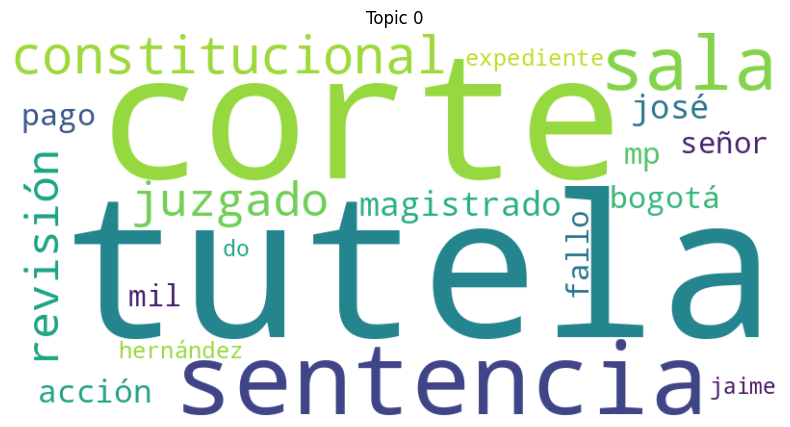

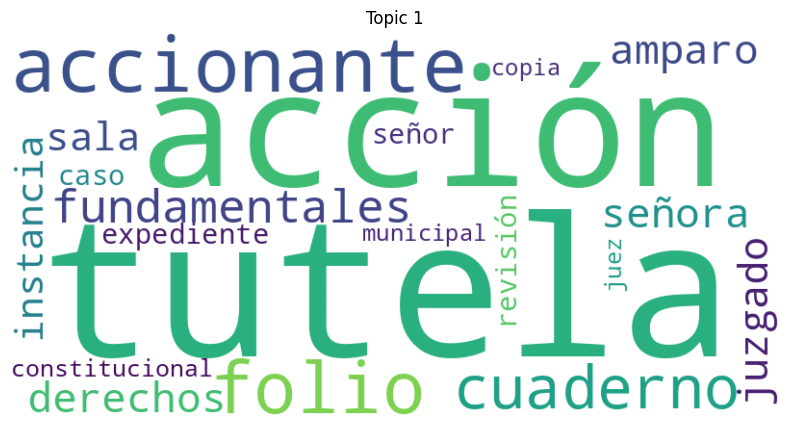

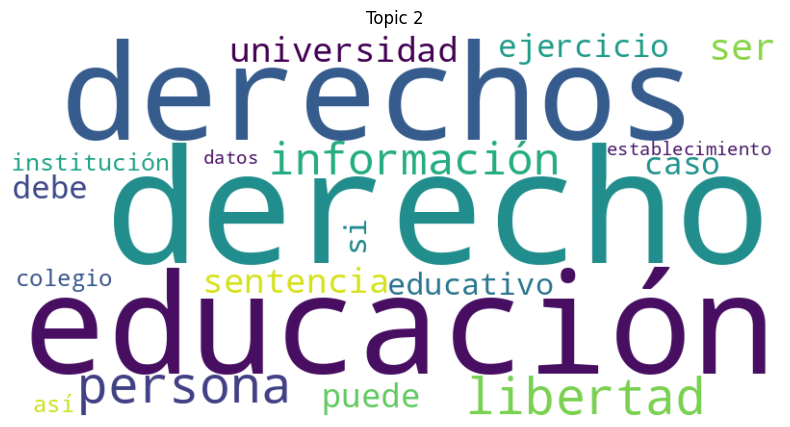

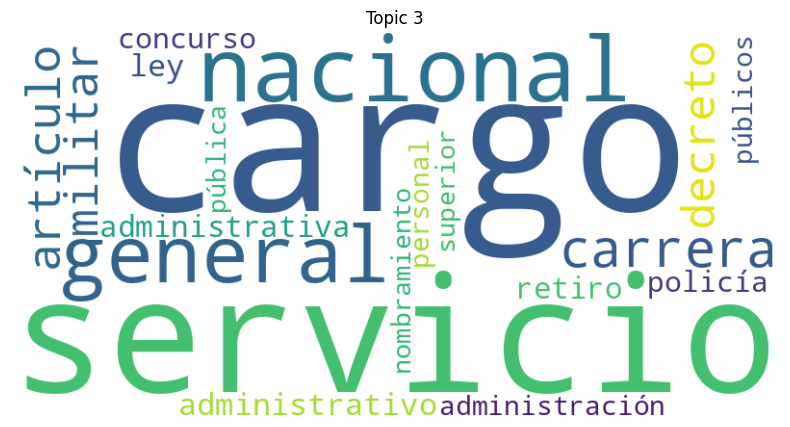

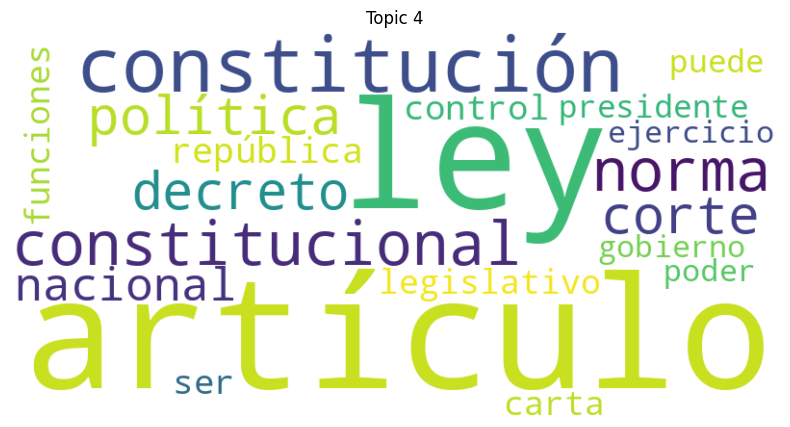

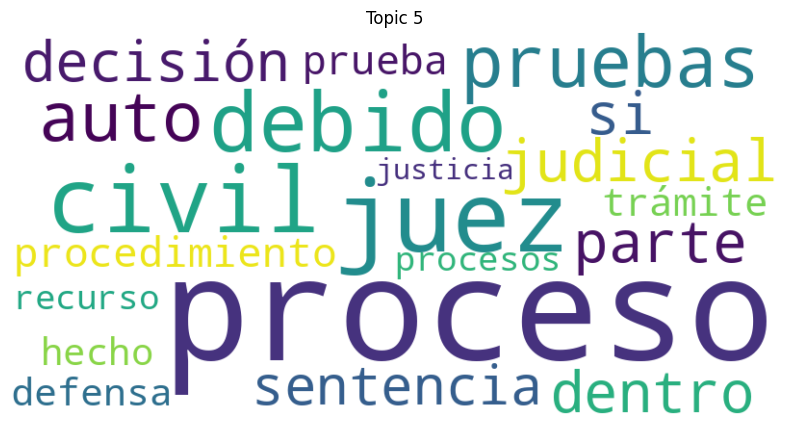

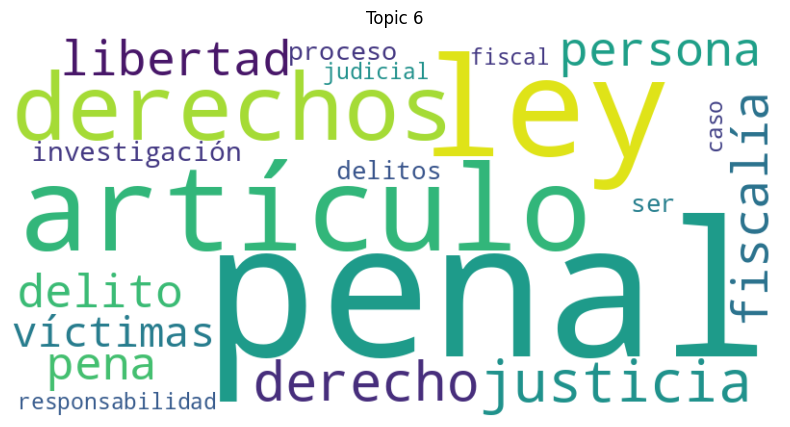

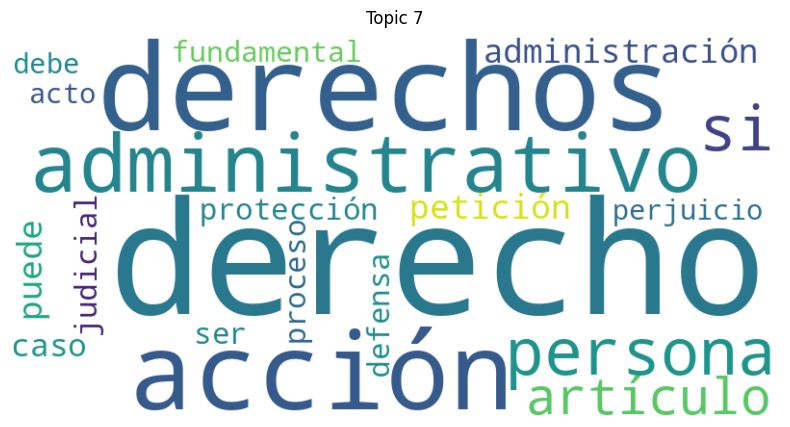

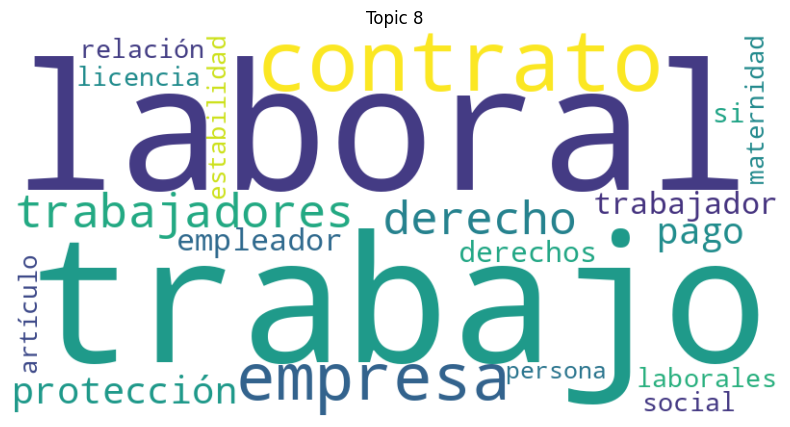

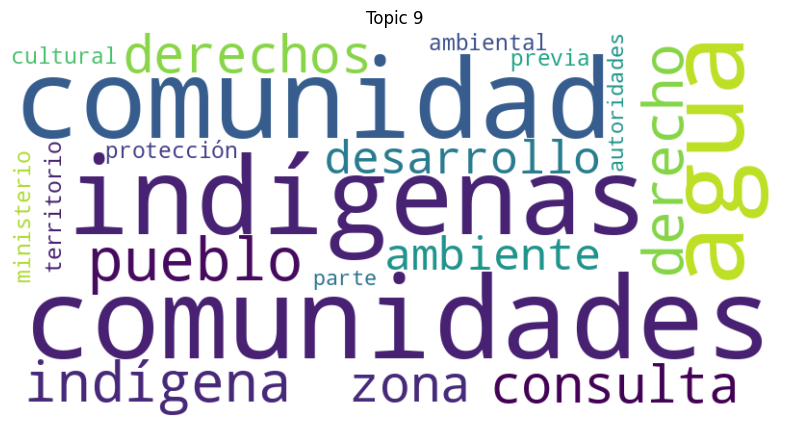

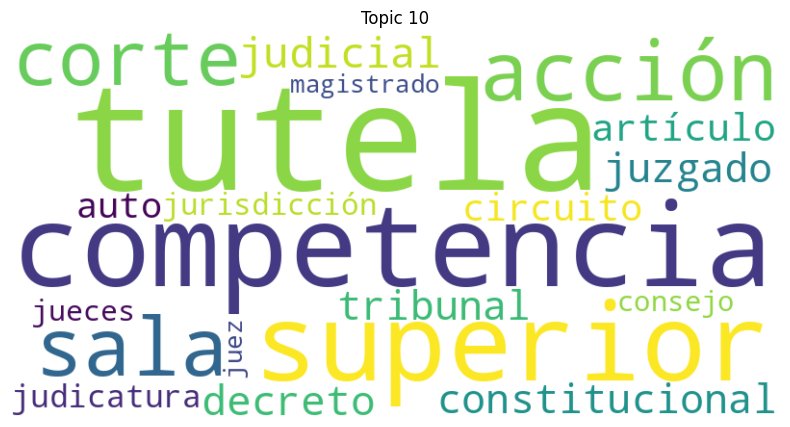

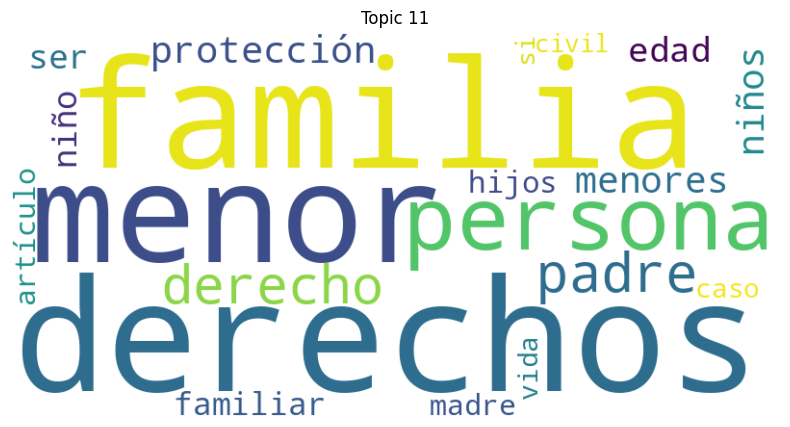

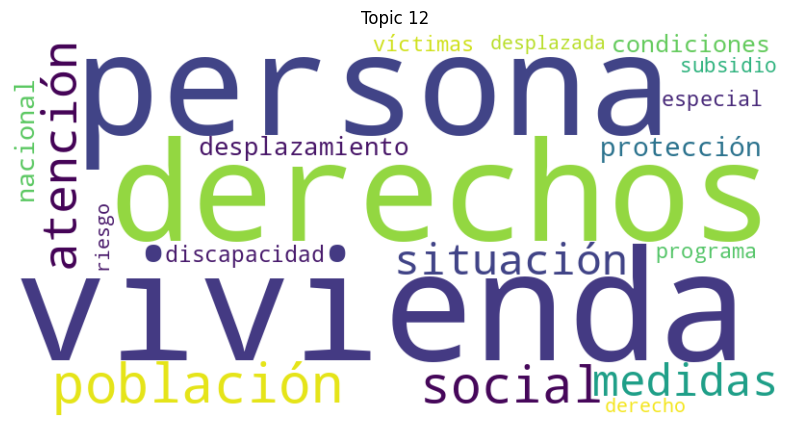

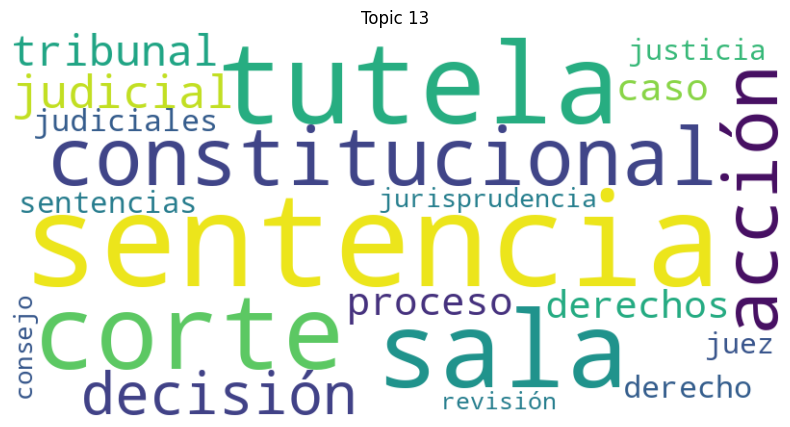

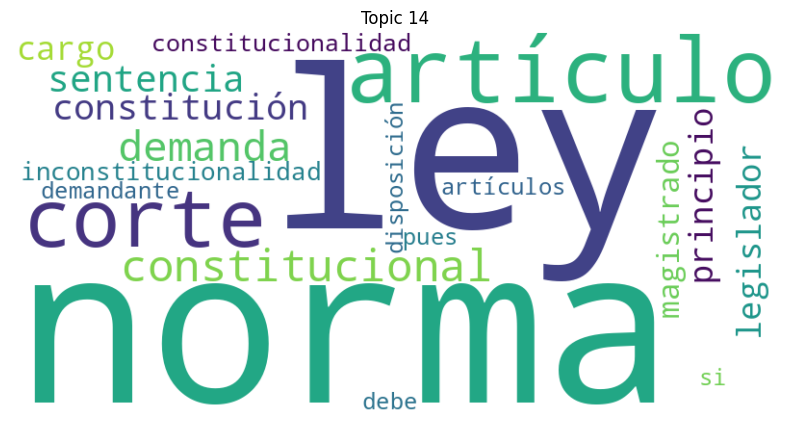

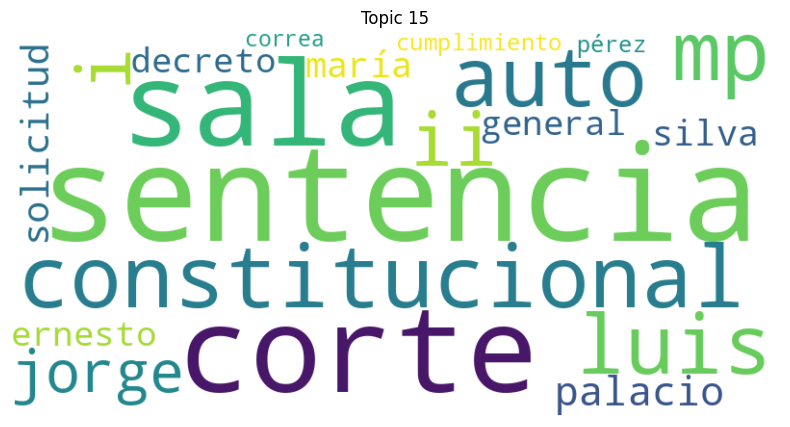

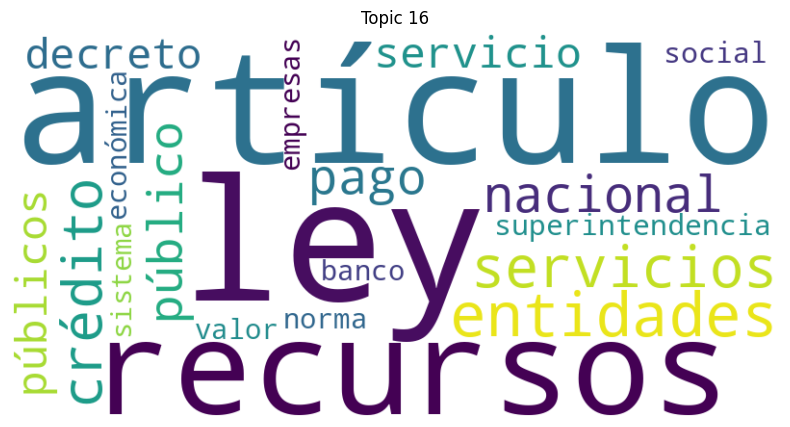

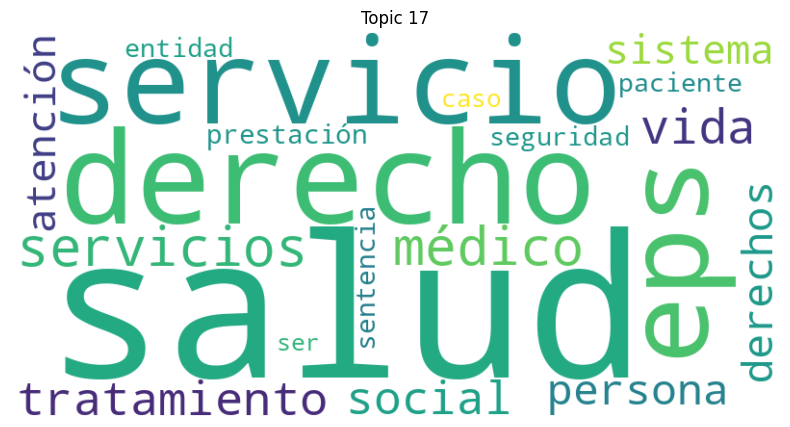

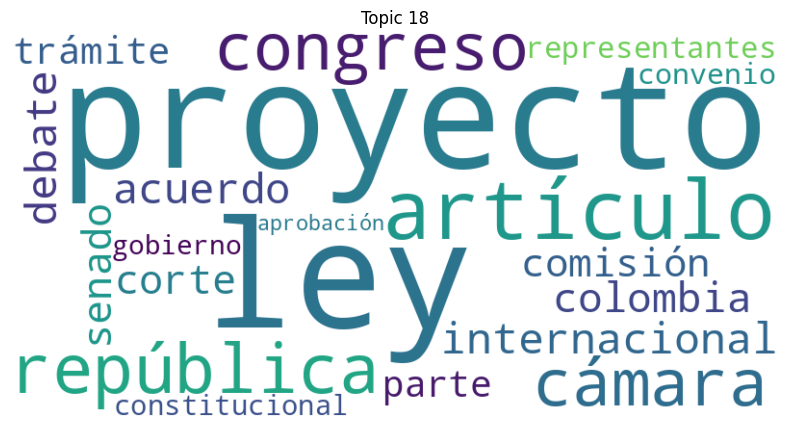

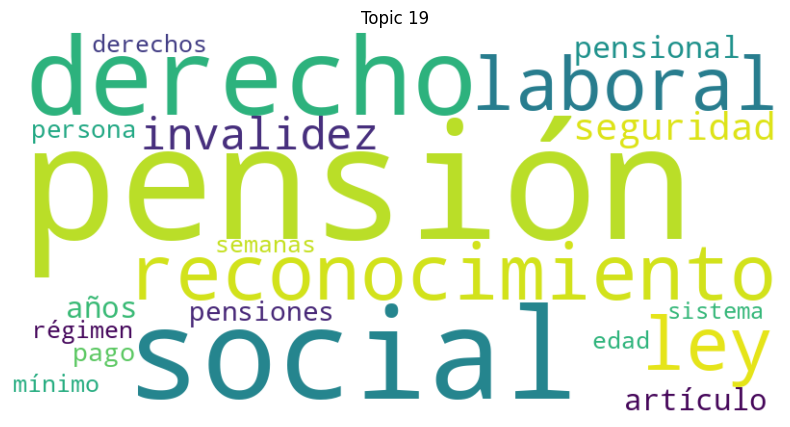

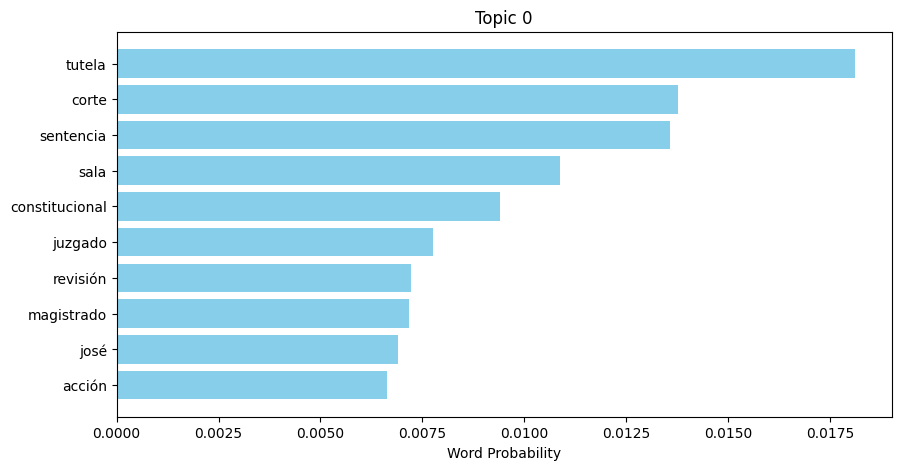

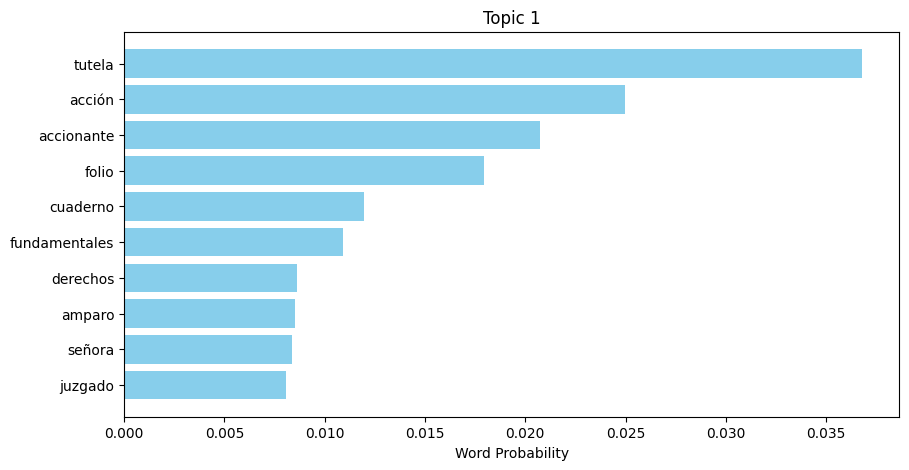

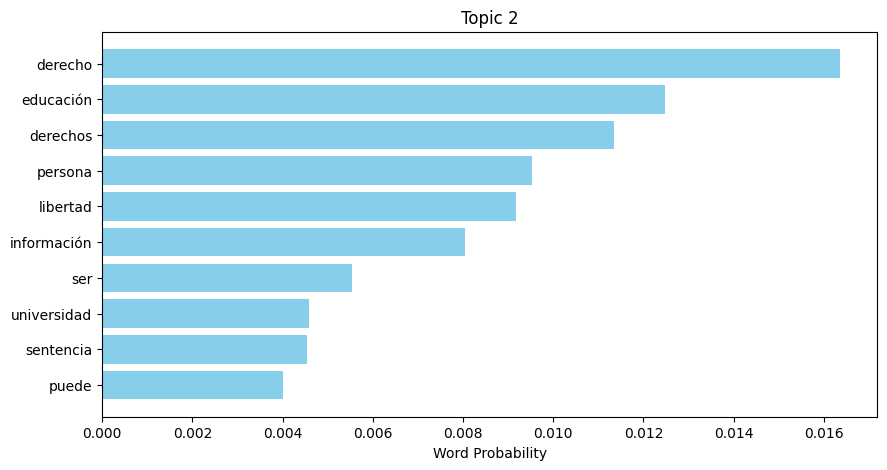

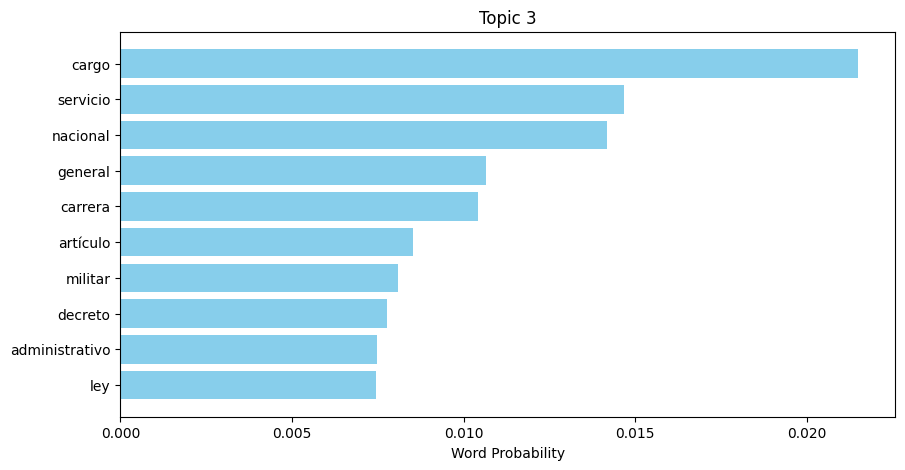

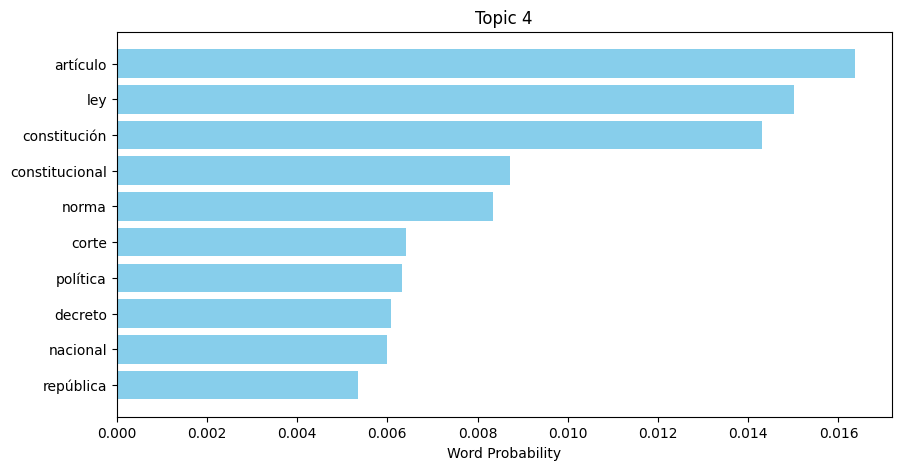

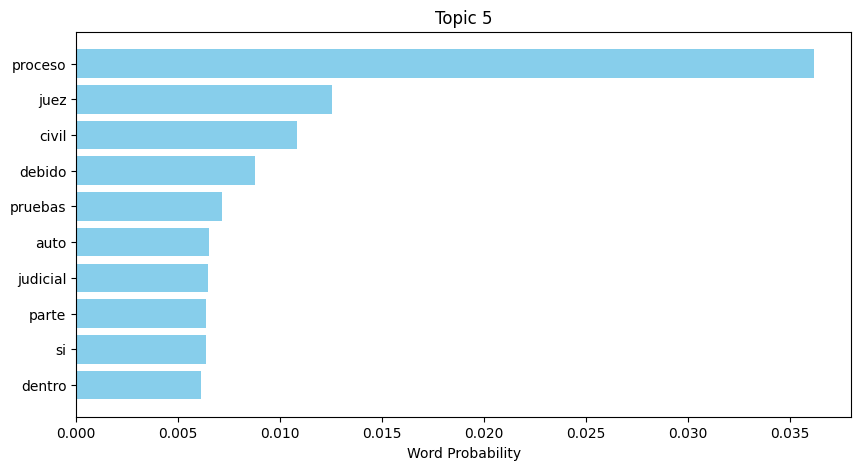

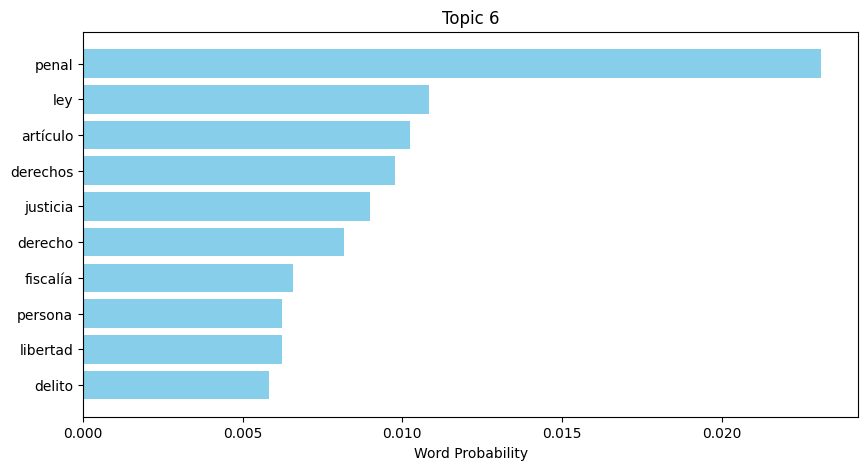

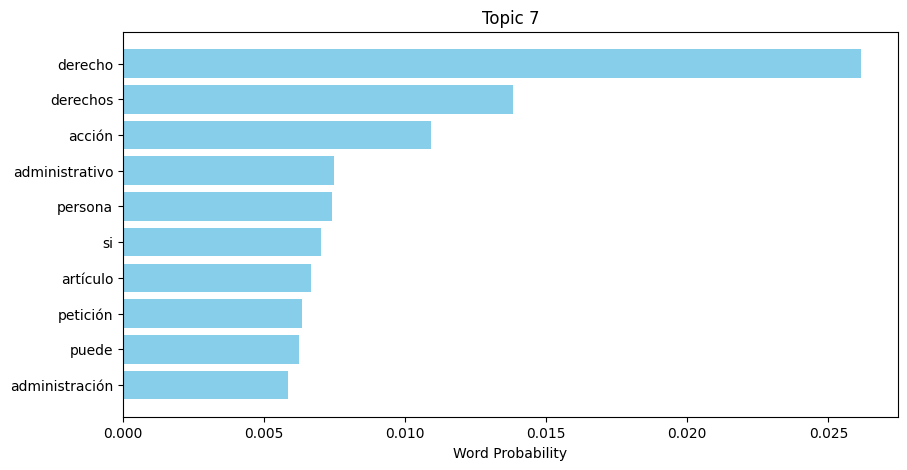

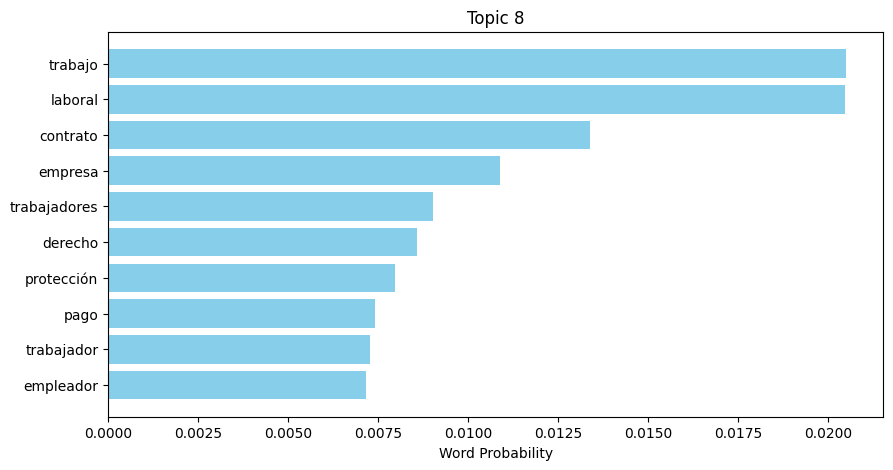

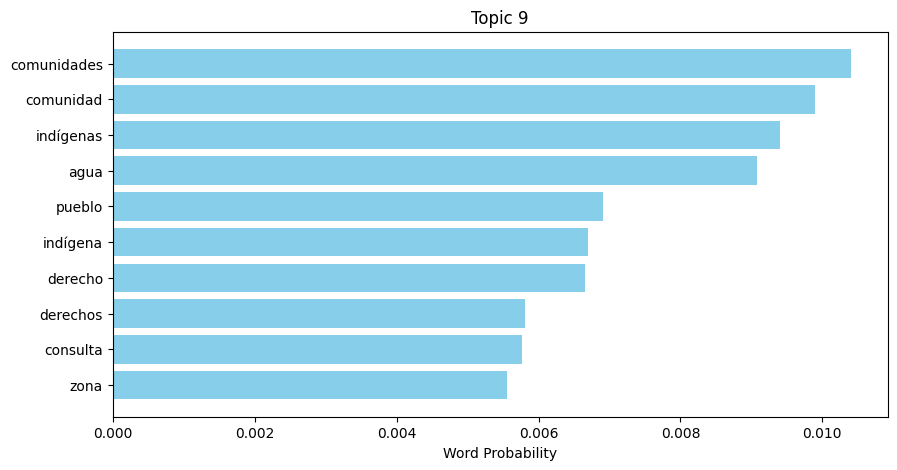

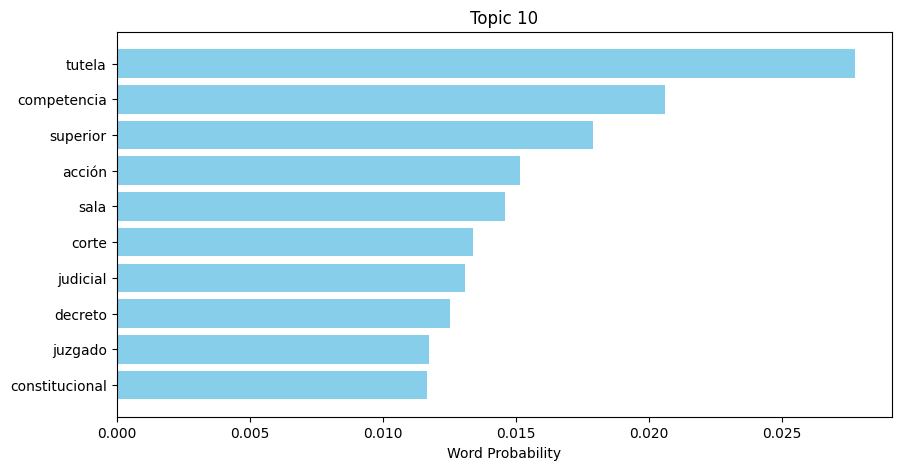

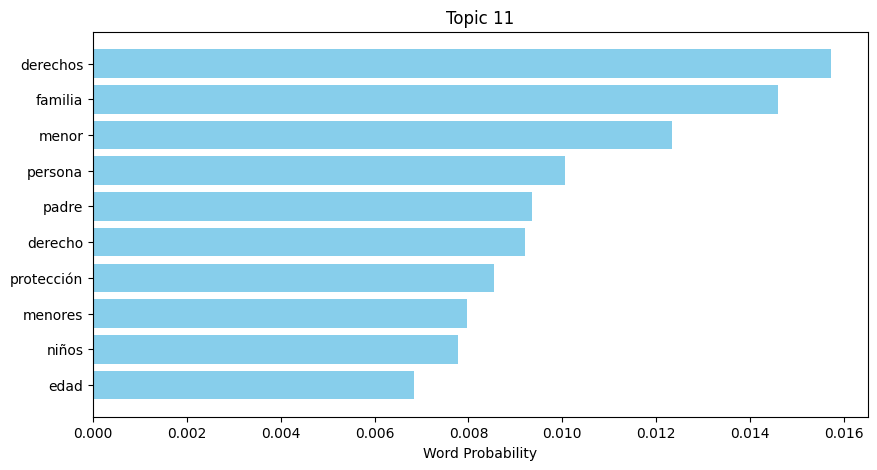

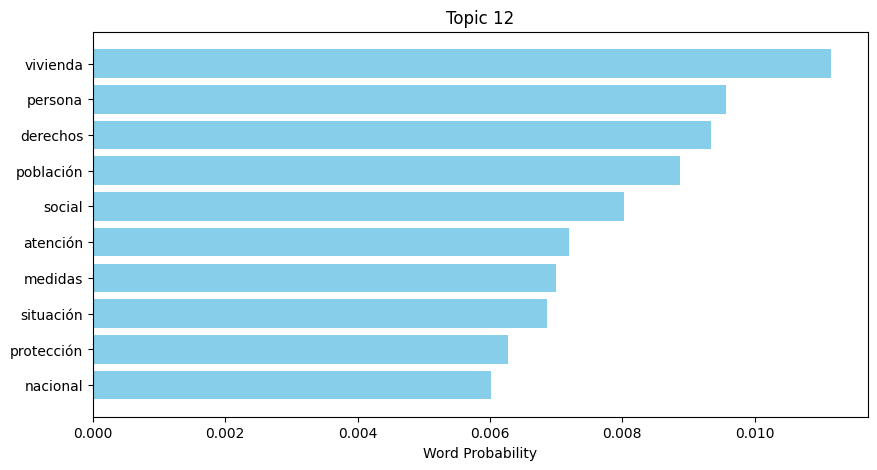

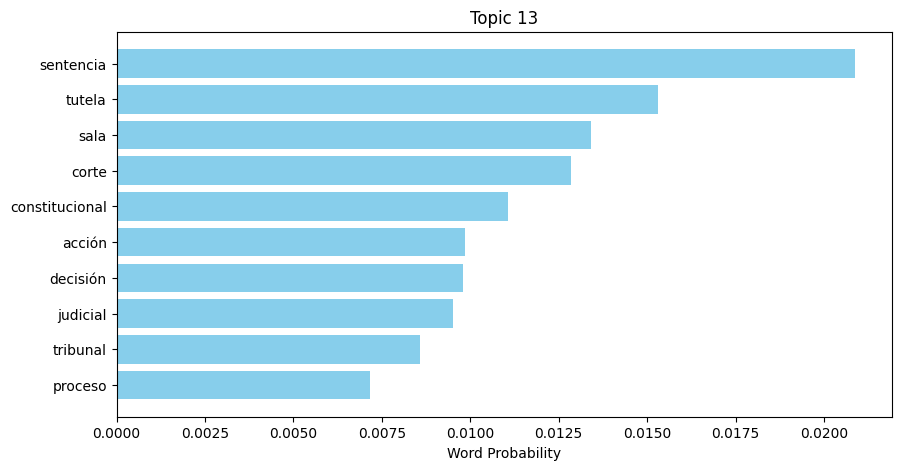

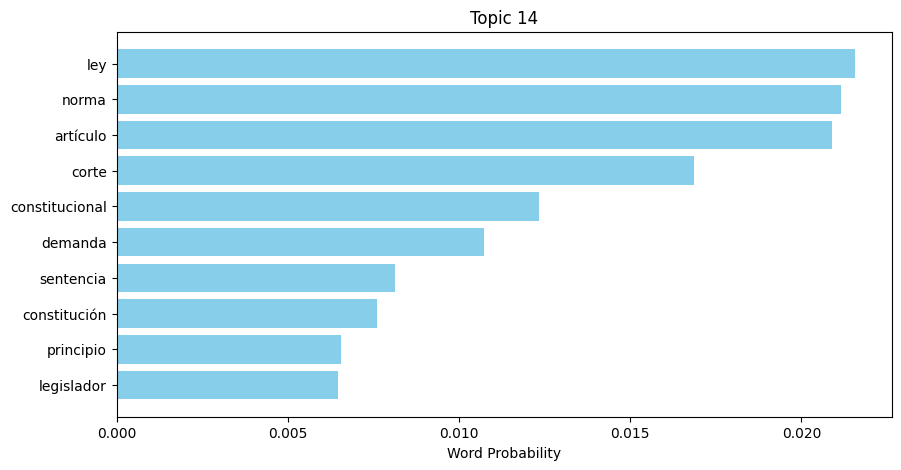

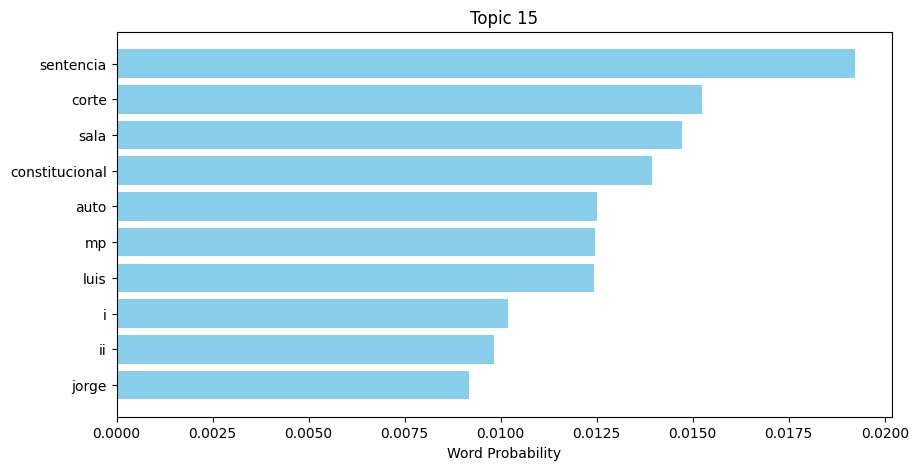

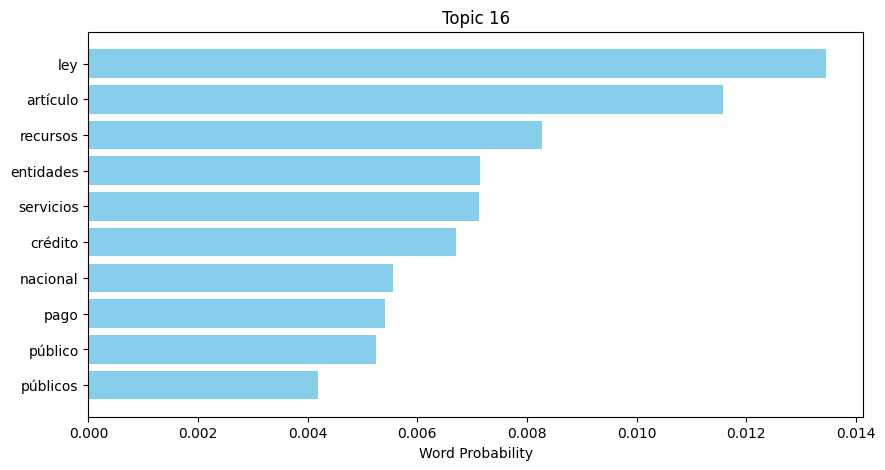

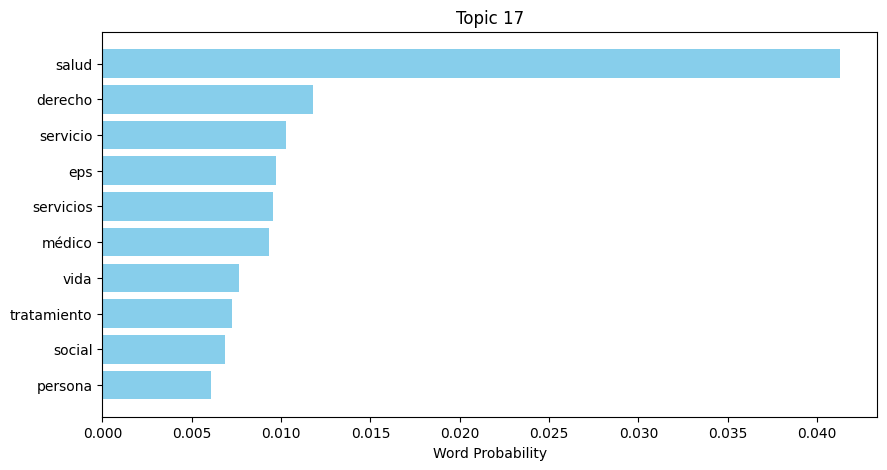

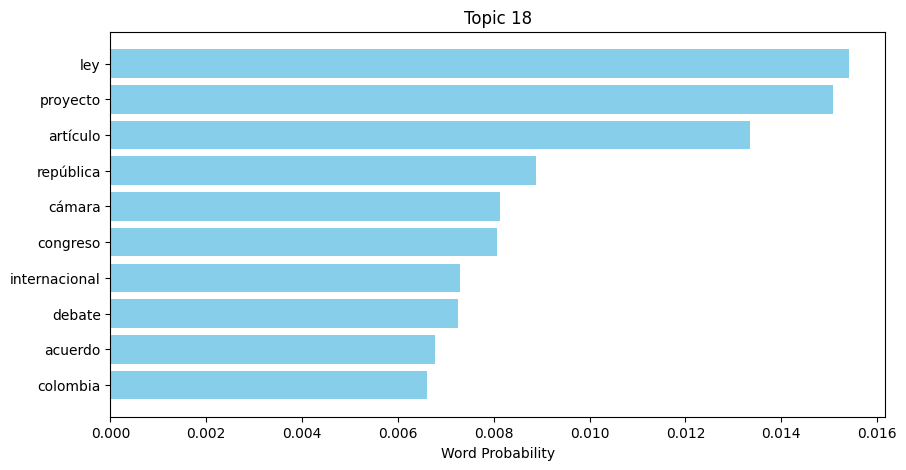

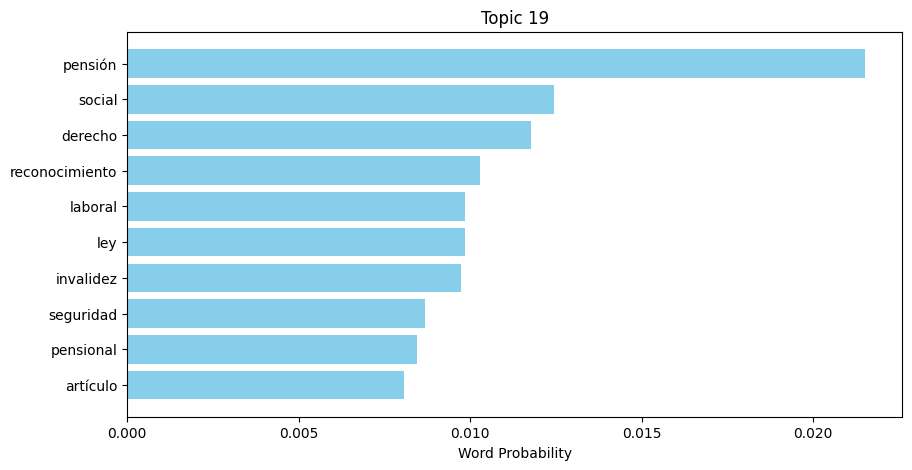

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to display word clouds for each topic
def display_wordclouds(lda_model):
    for topic_id in range(lda_model.num_topics):
        # Get the top words for the topic
        topic_words = lda_model.show_topic(topic_id, topn=20)
        # Create a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(topic_words))
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id}')
        plt.axis('off')
        plt.show()

# Function to display bar plots for each topic
def display_barplots(lda_model):
    for topic_id in range(lda_model.num_topics):
        # Get the top words for the topic
        topic_words = lda_model.show_topic(topic_id, topn=10)
        # Extract words and their probabilities
        words = [word for word, _ in topic_words]
        probabilities = [prob for _, prob in topic_words]
        # Plot bar plot
        plt.figure(figsize=(10, 5))
        plt.barh(words, probabilities, color='skyblue')
        plt.xlabel('Word Probability')
        plt.title(f'Topic {topic_id}')
        plt.gca().invert_yaxis()
        plt.show()

# Display word clouds for each topic
display_wordclouds(lda_model)

# Display bar plots for each topic
display_barplots(lda_model)

Usa LDA para agrupar documentos similares: Entrena un modelo LDA en tu corpus de documentos. Luego, asigna cada documento a su tópico más probable.

Agrupa documentos por tópico: Agrupa los documentos según los tópicos asignados.

Extrae las palabras más frecuentes: Para cada grupo de documentos, extrae las palabras más frecuentes.

Encuentra el grupo de palabras más frecuentes: Busca el grupo más frecuente de palabras consecutivas (n-gramas) dentro de cada grupo de documentos.

- Paso 1: Entrena el modelo LDA en tu corpus de documentos.
- Paso 2: Agrupa los documentos por sus tópicos asignados según el modelo LDA.
- Paso 3: Para cada grupo de documentos, extrae las palabras más frecuentes.
- Paso 4: Para cada grupo de documentos, encuentra los pares de palabras consecutivas más frecuentes (bigramas).


Puedes ajustar parámetros como el número de tópicos (num_topics), el número de palabras más frecuentes a mostrar y el número de n-gramas más frecuentes a mostrar según tus necesidades específicas.

In [7]:
from gensim import corpora, models
from collections import Counter
import matplotlib.pyplot as plt

# Paso 1: Entrenar el modelo LDA

# Paso 2: Agrupar documentos por tópico
document_topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
grouped_documents = {topic: [] for topic in range(lda_model.num_topics)}
for doc_id, topic in enumerate(document_topics):
    grouped_documents[topic].append(doc_id)

# Paso 3: Extraer las palabras más frecuentes para cada grupo
for topic, documents in grouped_documents.items():
    print(f"Grupo {topic}:")
    group_texts = [preprocessed_texts[doc_id] for doc_id in documents]
    all_words = [word for text in group_texts for word in text]
    word_freq = Counter(all_words)
    most_common_words = word_freq.most_common(10)  # Obtener las 10 palabras más frecuentes
    print("Palabras más frecuentes:", most_common_words)
    
    # Graficar la frecuencia de las palabras más comunes
    words, frequencies = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.title(f"Frecuencia de Palabras Más Comunes en el Grupo {topic}")
    plt.xticks(rotation=45)
    plt.show()

# Paso 4: Encontrar el grupo de palabras más frecuentes (n-gramas) para cada grupo
for topic, documents in grouped_documents.items():
    print(f"Grupo {topic}:")
    group_texts = [preprocessed_texts[doc_id] for doc_id in documents]
    all_ngrams = [word for text in group_texts for word in text]  # Aplanar lista de listas
    ngram_freq = Counter(zip(all_ngrams[:-1], all_ngrams[1:]))  # Contar pares de palabras consecutivas
    most_common_ngrams = ngram_freq.most_common(5)  # Obtener los 5 pares de palabras más frecuentes
    print("N-gramas más frecuentes:", most_common_ngrams)

Group 0:
Most frequent words: [('tutela', 40704), ('sentencia', 27903), ('corte', 26687), ('pago', 24609), ('derecho', 24529), ('constitucional', 22657), ('sala', 22557), ('acción', 21734), ('derechos', 17971), ('juzgado', 16782)]
Group 1:
Most frequent words: [('tutela', 35770), ('acción', 28233), ('derechos', 22262), ('derecho', 18265), ('sentencia', 17578), ('accionante', 16681), ('constitucional', 16507), ('corte', 14841), ('sala', 14191), ('folio', 13695)]
Group 2:
Most frequent words: [('derecho', 91211), ('derechos', 75185), ('artículo', 52974), ('persona', 51645), ('corte', 50710), ('sentencia', 50441), ('constitucional', 45997), ('ley', 42175), ('ser', 40763), ('educación', 39650)]
Group 3:
Most frequent words: [('cargo', 37417), ('artículo', 34651), ('carrera', 31448), ('ley', 27468), ('corte', 25221), ('general', 22067), ('constitucional', 21375), ('derecho', 20469), ('sentencia', 20195), ('nacional', 18899)]
Group 4:
Most frequent words: [('artículo', 118204), ('ley', 11288

Most frequent n-grams: [(('acción', 'tutela'), 41503), (('seguridad', 'social'), 36644), (('derechos', 'fundamentales'), 34549), (('corte', 'constitucional'), 32256), (('derecho', 'salud'), 30643)]
Group 18:
Most frequent n-grams: [(('proyecto', 'ley'), 27877), (('corte', 'constitucional'), 14249), (('gaceta', 'congreso'), 11944), (('cámara', 'representantes'), 11796), (('senado', 'república'), 9668)]
Group 19:
Most frequent n-grams: [(('acción', 'tutela'), 56803), (('seguridad', 'social'), 52443), (('derechos', 'fundamentales'), 36818), (('corte', 'constitucional'), 29306), (('pensión', 'invalidez'), 28707)]


Una vez que hayas entrenado un modelo LDA con tu corpus de datos de texto, hay varias tareas útiles y análisis que puedes realizar utilizando el modelo entrenado. Aquí tienes algunas tareas comunes:

- Visualización de Tópicos: Visualiza los tópicos y sus palabras asociadas usando nubes de palabras, gráficos de barras u otras representaciones gráficas. Esto puede ayudarte a entender los temas principales presentes en tus documentos.

- Distribución Documento-Tópico: Analiza la distribución de tópicos a través de tus documentos. Puedes identificar qué tópicos son más prevalentes en tu corpus y cómo los documentos individuales se relacionan con estos tópicos.

- Interpretación de Tópicos: Interpreta los tópicos generados por el modelo LDA examinando las palabras principales asociadas con cada tópico. Esto puede ayudarte a asignar etiquetas significativas a los tópicos y entender su significado semántico.

- Agrupación de Documentos: Usa las distribuciones documento-tópico para agrupar documentos similares juntos. Esto puede ayudarte a identificar grupos de documentos que comparten temas o tópicos similares.

- Extracción de Palabras Clave: Extrae palabras clave o frases clave de los documentos basándote en sus distribuciones de tópicos. Esto puede ayudarte a identificar términos o conceptos importantes dentro de cada documento.

- Generación de Texto: Genera nuevas muestras de texto basadas en las distribuciones de tópicos aprendidas. Esto puede ser útil para tareas como la resumen de texto o la generación de contenido.

- Comparación de Documentos: Compara documentos basados en sus distribuciones de tópicos para identificar similitudes o diferencias entre ellos.

- Análisis de Sentimientos: Combina la modelización de tópicos LDA con análisis de sentimientos para analizar el sentimiento de los documentos dentro de cada tópico.

Estos son solo algunos ejemplos de los tipos de análisis que puedes realizar con un modelo LDA entrenado. Dependiendo de tu caso de uso específico y objetivos, puedes elegir enfocarte en una o más de estas tareas para obtener insights de tus datos de texto. Además, puedes explorar técnicas y metodologías avanzadas para mejorar aún más tus capacidades de análisis de texto.

In [8]:
# Save the model to disk
lda_model.save("lda_model")

# Load the model from disk
loaded_lda_model = models.LdaModel.load("lda_model")

principales de cada tema y combinarlas en una sola lista. Luego, puedes generar una visualización de nube de palabras a partir de esta lista combinada de palabras. Aquí te muestro cómo puedes hacerlo:

En este código:

Iteramos sobre cada tema para extraer las palabras principales usando el método show_topics().
Luego combinamos todas las palabras principales en una sola lista.
Después de eso, generamos una nube de palabras usando el módulo WordCloud de la biblioteca wordcloud.
Finalmente, mostramos la nube de palabras usando matplotlib.
Esta nube de palabras te proporcionará una representación visual general de las palabras más frecuentes en todos los temas, ayudándote a interpretar los temas o conceptos generales presentes en tu colección de documentos. Ajusta los parámetros de la nube de palabras (como el ancho, la altura y el color de fondo) según sea necesario para personalizar la visualización de acuerdo a tus preferencias.

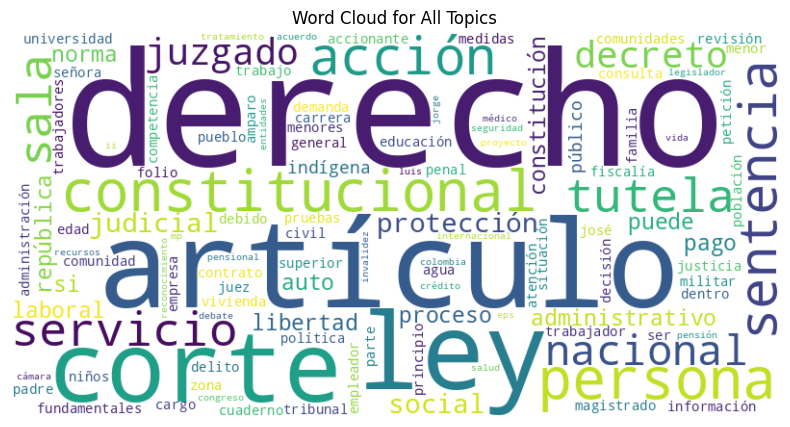

In [9]:
from gensim import models

# Assuming 'lda_model' is your trained LDA model

# Get the topics and their top words
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)

# Extract top words from all topics
all_words = [word for topic_words in [topic[1] for topic in topics] for word, _ in topic_words]

# Combine top words into a single string (optional)
all_words_str = ' '.join(all_words)

# Generate word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Topics')
plt.axis('off')
plt.show()


La generación de resúmenes de texto basada en un modelo LDA entrenado no es un enfoque común, ya que LDA se utiliza principalmente para el modelado de temas y no tanto para resúmenes. Sin embargo, si deseas generar un resumen basado en los temas extraídos por el modelo LDA, puedes seguir estos pasos:

Utiliza el modelo LDA para asignar temas a cada frase en el documento.
Extrae frases representativas de cada tema.
Combina las frases representativas para generar el resumen.
Aquí tienes un ejemplo básico de cómo puedes implementar esto:

In [ ]:
from gensim import corpora, models
from summarizer import Summarizer
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
model = AutoModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

# Ensure you have already loaded the tokenizer and model as shown above
custom_summarizer = Summarizer(
    custom_model=model,
    custom_tokenizer=tokenizer
)

document_sentences = preprocessed_texts.iloc[0:10].tolist()

# Step 1: Use LDA model to assign topics to each sentence
# Assuming 'lda_model' is your trained LDA model
topic_assignments = []
for sentence in document_sentences:
    bow_vector = dictionary.doc2bow(sentence)
    topic_assignment = max(lda_model.get_document_topics(bow_vector), key=lambda x: x[1])[0]
    topic_assignments.append(topic_assignment)

# Step 2: Extract representative sentences for each topic
representative_sentences = {}
for topic_id in range(lda_model.num_topics):
    topic_sentences = [sentence for sentence, assigned_topic in zip(document_sentences, topic_assignments) if assigned_topic == topic_id]
    # You can use different strategies to select representative sentences, such as choosing sentences with highest probability for the topic
    representative_sentences[topic_id] = topic_sentences[:3]  # Select first 3 sentences for each topic

# Step 3: Combine representative sentences to generate the summary
summary_sentences = []
for topic_id, sentences in representative_sentences.items():
    summary_sentences.extend(sentences)

# Generate the summary using gensim's summarize function
summary = [custom_summarizer(' '.join(s)) for s in summary_sentences]   # You can adjust the ratio as needed

print(summary)
